In [88]:
import pandas as pd, numpy as np, math, glob, os, cv2, matplotlib.pyplot as plt
import csv, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt, string, PIL, keras, pymysql
from sklearn.feature_extraction.image import extract_patches_2d
import collections, time, pickle, glob, os, cv2, os.path, math
from keras.models import load_model,model_from_json
from collections import OrderedDict, Counter
from skimage.transform import resize
from sklearn.externals import joblib
from sklearn import preprocessing
from skimage.feature import hog
from fuzzywuzzy import process
from scipy.stats import boxcox
from PIL import ImageEnhance
from fuzzywuzzy import fuzz
from pandasql import sqldf
from scipy import ndimage
from PIL import Image
from os import walk
#import MySQLdb
import fuzzywuzzy
import warnings
warnings.filterwarnings('ignore')

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [89]:
df = pd.read_csv('/root/Arjun/GridLines_Dict_Religar1.csv')
df.head(3)

FieldName  GridHeight  GridWidth  Noofgridlines
0        Title        63.0       54.0            5.0
1   First name        63.0       54.0           14.0
2  Middle Name        63.0       54.0           14.0

Cropped


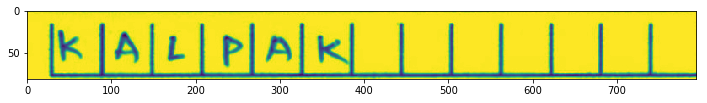

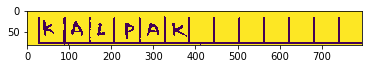

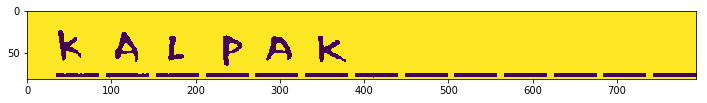

In [588]:
for image_path in glob.glob(os.path.join('/home/Arjun/files/form/Cropped/Sample/Character','First name.jpg')):
    img = cv2.imread(image_path,0)

    if img is not None:
        fname=image_path.split('/')[5].split('.')[0]
        print(fname)
        plt.figure(figsize=(12,12));plt.imshow(img);plt.show()
        kernel = np.ones((3,1), np.uint8)
        #kernel = np.ones((4,3), np.uint8)
        overlay = cv2.dilate(img, kernel, iterations = 1)
        kernel1 = np.ones((3,1),np.uint8)
        #kernel1 = np.ones((4,3),np.uint8)
        overlay = cv2.erode(overlay,kernel1,iterations = 1)
        #cv2.imwrite("/home/Sandeep/something1.jpg", overlay)
        #overlay = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
        overlay = cv2.threshold(overlay,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
        #overlay = overlay[int(overlay.shape[0]*0.1):int(overlay.shape[0]*0.9),:]
        #cv2.imwrite('/home/Arjun/files/'+fname+'.jpg', overlay)
        #print(overlay.shape)
        plt.imshow(overlay);plt.show()
        cv2.imwrite('/home/Sandeep/something1.jpg', overlay)
        a = []
        for i in range(overlay.shape[1]):
            try:
                if overlay[int(overlay.shape[0]*0.5),i]==0 and overlay[int(overlay.shape[0]*0.5),i+1]==0: #and overlay[int(overlay.shape[0]*0.5),i+2]==0:
                    a.append(i)
            except IndexError:
                pass



        if fname in list(df['FieldName']):
            grid_width=int(df.loc[(df.FieldName == fname) , ['GridWidth']]['GridWidth'])
            grid_height=int(df.loc[(df.FieldName == fname) , ['GridHeight']]['GridHeight'])
            no_gridlines=int(df.loc[(df.FieldName == fname) , ['Noofgridlines']]['Noofgridlines'])

        which = image_path.split('/')[4].split('.')[0]

        if len(a)!=0:
            if which == "Alpha Numeric":
                for each in np.arange(start=a[0], stop=overlay.shape[1],step=59):
                    try:
                        overlay[:,each:each+10] = np.ones((overlay.shape[0],10), dtype=int)*255
                    except :
                        pass
            else:
                for each in np.arange(start=a[0], stop=overlay.shape[1],step=59):
                    try:
                        overlay[:,each:each+8] = np.ones((overlay.shape[0],8), dtype=int)*255
                    except ValueError:
                        pass

        plt.figure(figsize=(12,12));plt.imshow(overlay);plt.show()

    #kernel = np.ones((3,1), np.uint8)
#         kernel = np.ones((2,5), np.uint8)
#         overlay = cv2.erode(overlay, kernel, iterations = 1)
    #kernel1 = np.ones((3,1),np.uint8)
    #kernel1 = np.ones((4,3),np.uint8)
    #overlay = cv2.erode(overlay,kernel1,iterations = 1)
    #cv2.imwrite('/home/Sandeep/88055134_WithoutGrid/Character/'+fname+'.jpg', overlay)

    #print(a)

Numeric


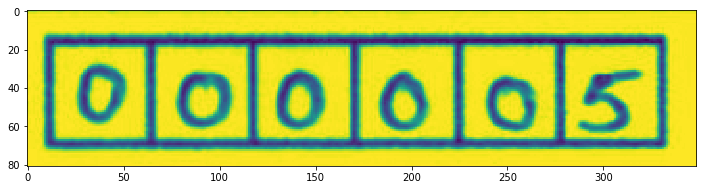

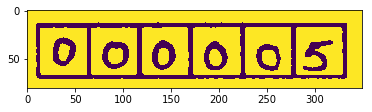

Alpha nUmberic Numeric


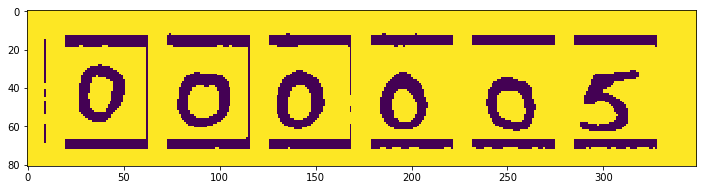

In [587]:
Base_Form('Cheque Number\
',53,10)

In [638]:
# Numeric Extraction
def numeric_extraction(numeric_file, dico, model_numm):
    im = cv2.imread(numeric_file,0)
    if im is not None:
        im1=im.copy()
        plt.imshow(im1)
        plt.show()
        ref = cv2.threshold(im1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        mask = np.zeros_like(ref)
#         plt.imshow(mask)
#         plt.show()
        w = ref.shape[1]
        shp = round(w * 0.15)
        if shp % 2 == 0:
            shp = shp + 1
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        er = cv2.erode(ref, kr, 1)
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        dl = cv2.dilate(er, kr, 1)
        OriImg2 = im.copy()
        img = dl
        OrimgCopy = dl
        added= cv2.add(cv2.bitwise_not(ref), dl)
#         plt.imshow(added)
#         plt.show()
        (_, cnts, _) = cv2.findContours(cv2.bitwise_not(added).copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts1 = [c for c in cnts if cv2.contourArea(c) < round(w*0.05)]    
        for c in cnts1:
            cv2.drawContours(mask, [c], -1, 255, 2)
        plt.imshow(mask)
        plt.show()
        img_output = cv2.bitwise_not(cv2.add(added,mask))
        plt.imshow(img_output)
        plt.show()
        img,ctrs,hier = cv2.findContours(img_output.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         areas = [cv2.contourArea(ctr) for ctr in ctrs]
#         mean = np.mean(areas)
#         x = 0
#         i = []
#         cv2.imwrite('/home/New folder/image.jpg',img)
#         for area in areas:
#             if area < (0.50 * mean):
#                 i.extend([x])
#                 x=x+1
#             else:
#                 x=x+1
        rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    #         print("rects", rects)
        rect2 = np.array(rects, 'int')
    #         print("rect2", rect2.shape)
        col = 0
        try:
            rect2 = rect2[np.argsort(rect2[:,col])]
        except IndexError:
            rect2 = rects
        li = []
        s=""
        O_copy = OriImg2.copy()
        d={}
        cnt = 0
        #cv2.imwrite('/home/New folder/image1.jpg',O_copy)
        for j,rect in enumerate(rect2):
            leng = int(rect[3] * 1.05)
            pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
            pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
            #print(leng,pt1,pt2)
            roi = OriImg2[pt1:pt1+leng, pt2:pt2+leng]
#             plt.imshow(roi)
#             plt.show()
            newroi=OriImg2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
#             plt.imshow(newroi)
#             plt.show()
            a_str=''
            if roi.shape[0] >= 28 and roi.shape[1] >= 28:
                roi = cv2.resize(roi, (28, 28), cv2.INTER_AREA)
                newroi = cv2.resize(newroi, (28, 28), cv2.INTER_AREA)
#                 plt.imshow(roi)
#                 plt.show()
#                 plt.imshow(newroi)
#                 plt.show()
                ret1, im_th1 = cv2.threshold(roi, 190, 255, cv2.THRESH_BINARY)
                img = im_th1.astype('float32')
                img = resize(img, (28,28), order=1, preserve_range=True)
                img = img/255
                img = resize(ones_padding(img), (28,28), order=1, preserve_range=True)
                img = img.reshape((1,28,28,1))
                a_str = model_numm.predict_classes(img)
    #                 print('Prediction')
    #                 print(a_str)
    #                 print('\n#############\n') 
            s+=str(a_str)
        s=s.replace('[','').replace(']','')
        #print(s)
        return s

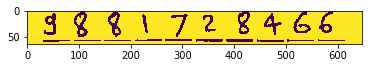

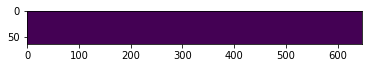

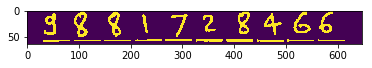

'988172846'

In [669]:
numeric_extraction('/home/Sandeep/Without_Grid/89547676_WithoutGrid/Numeric/Mobile Number.jpg', dico, model_numm)

In [668]:
for image_path in glob.glob(os.path.join('/home/Sandeep/','*/*/*/*.jpg')):
    if image_path.split('/')[5].split('.')[0]=='Numeric':
        print(image_path) 

/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Scrutiny Number.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Receipt Number.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Policy Number.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/IMD Code.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Sub IMD Code.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Mobile Number_T.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Emp Code.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Date Of Birth.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/UID.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Pincode.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Telephone_Res.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Telephone_Office.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/Mobile Number.jpg
/home/Sandeep/Without_Grid/89367116_WithoutGrid/Numeric/P

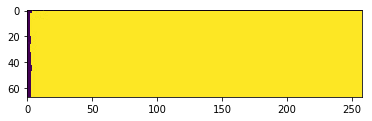

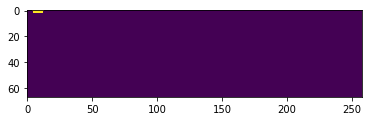

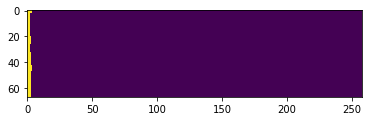

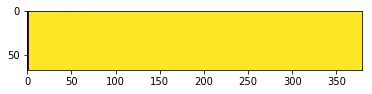

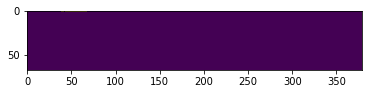

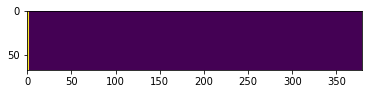

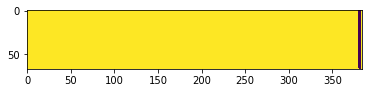

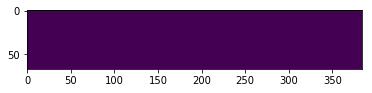

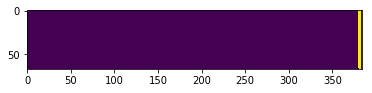

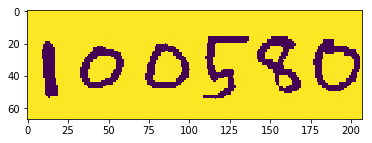

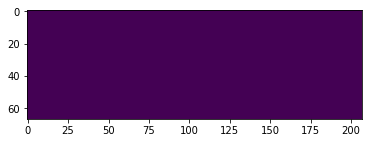

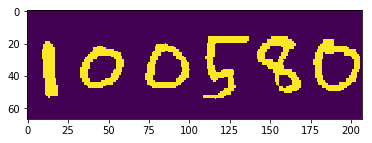

1491614


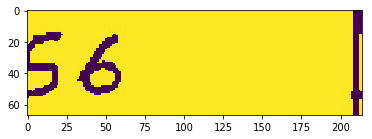

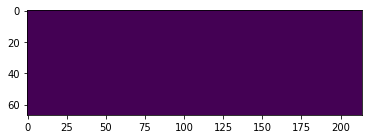

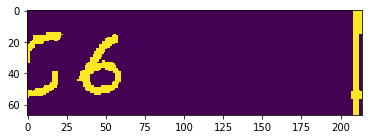

1


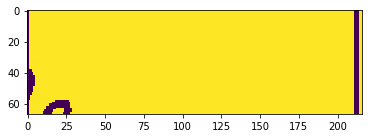

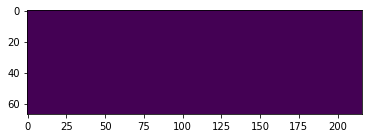

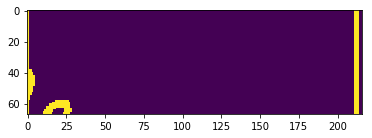

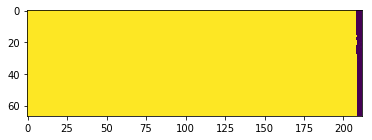

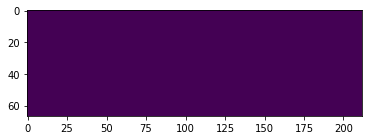

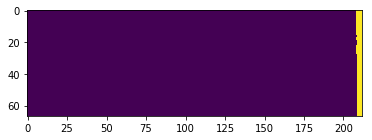

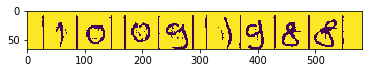

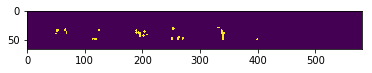

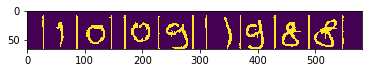

1622169101612616112410610622124


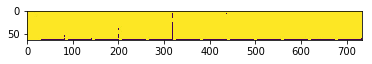

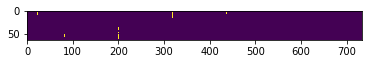

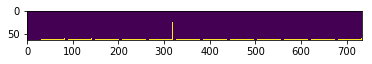

911


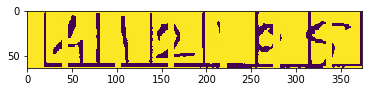

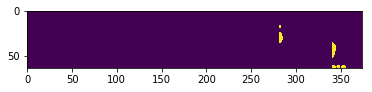

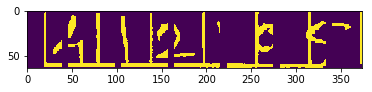

202024201825


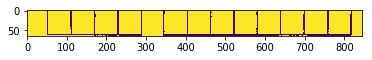

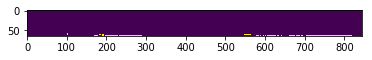

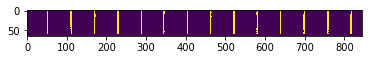

88118889898911


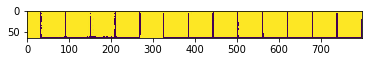

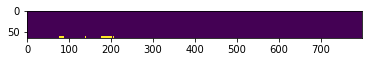

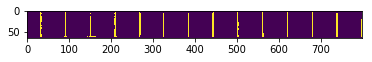

11911998911999989


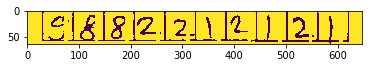

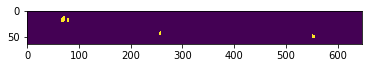

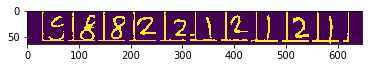

62525112525


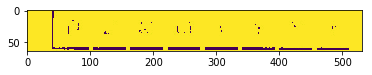

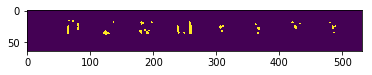

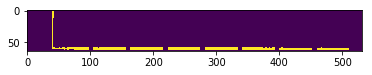

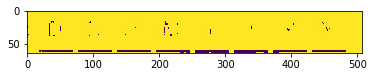

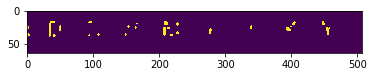

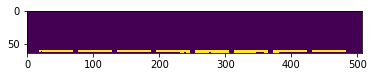

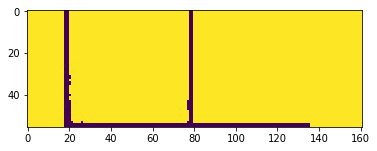

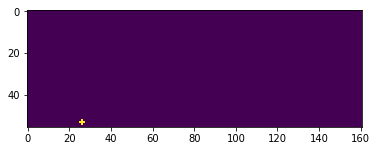

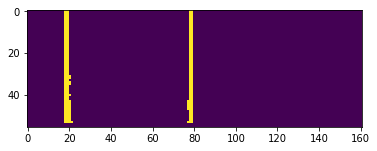

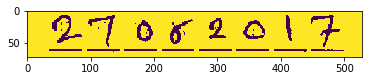

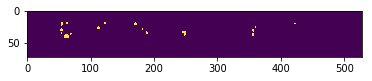

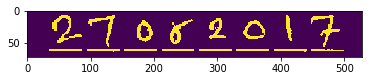

161914616141125


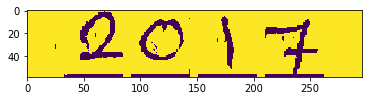

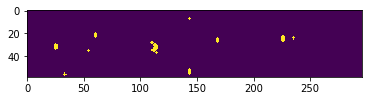

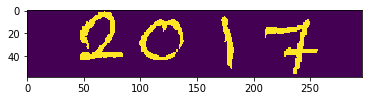

1616925


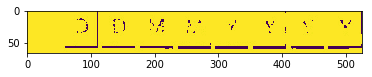

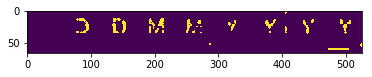

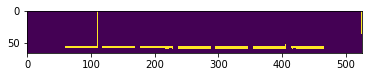

6


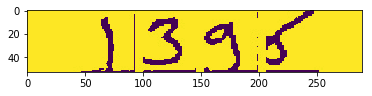

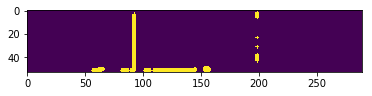

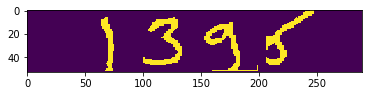

1116


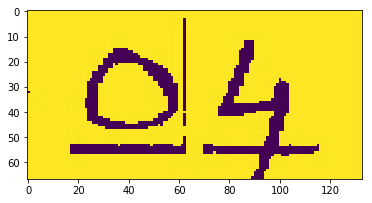

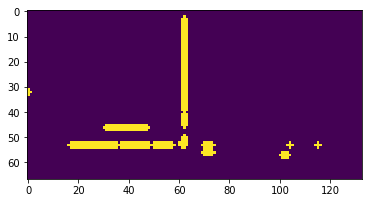

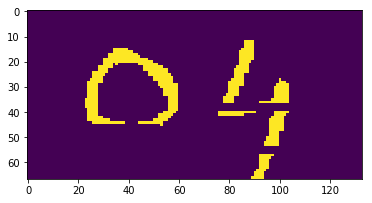

14


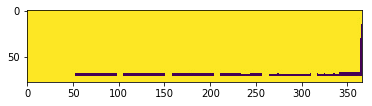

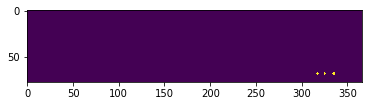

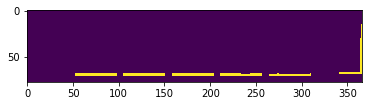

9


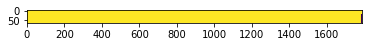

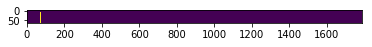

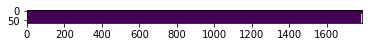

11


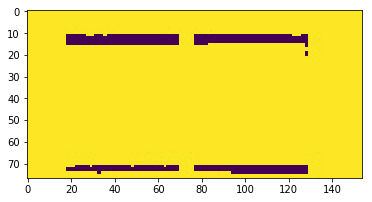

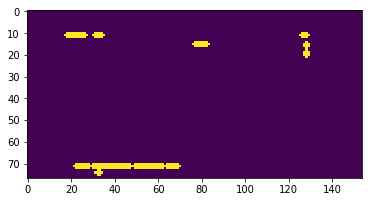

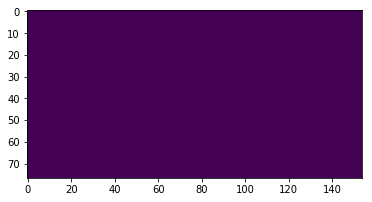

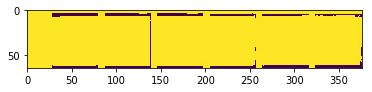

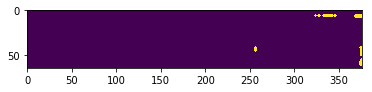

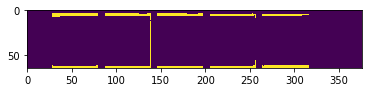

11


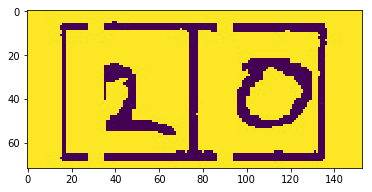

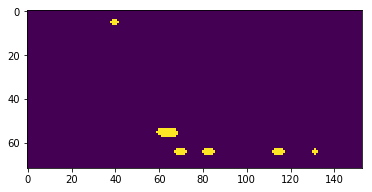

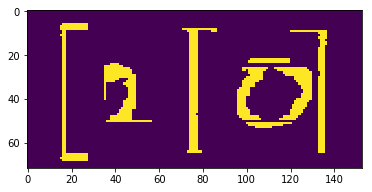

696


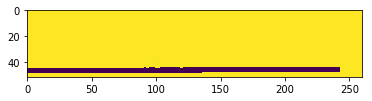

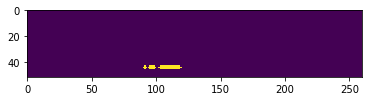

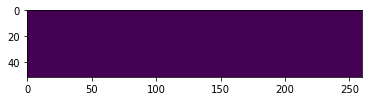

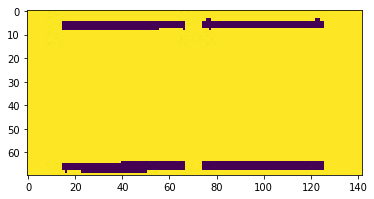

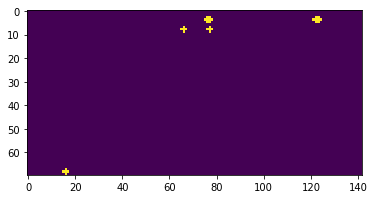

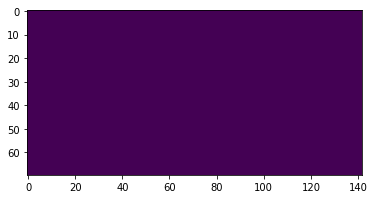

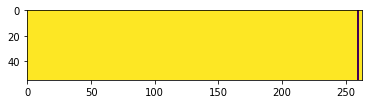

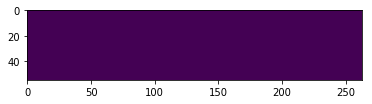

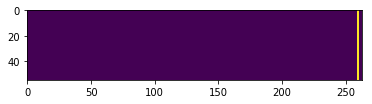

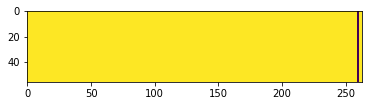

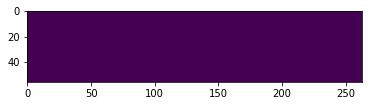

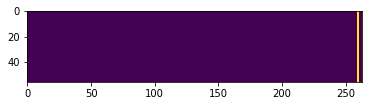

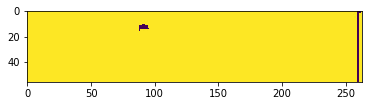

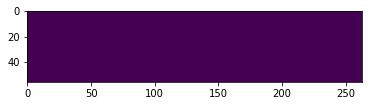

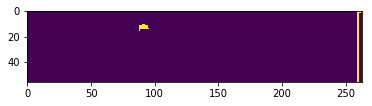

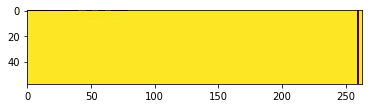

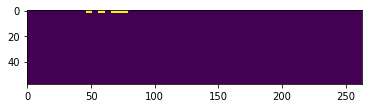

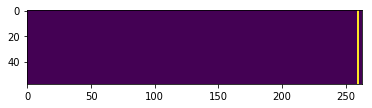

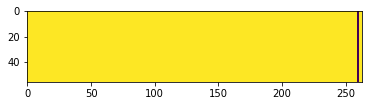

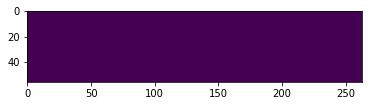

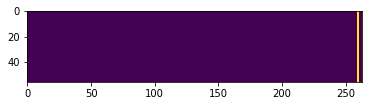

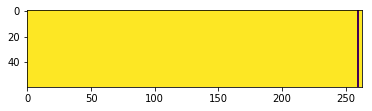

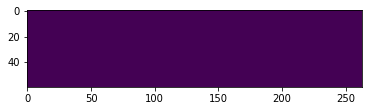

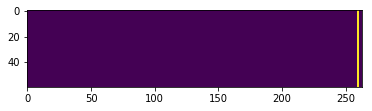

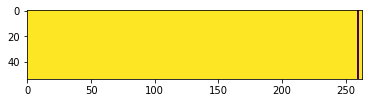

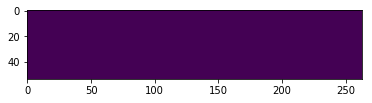

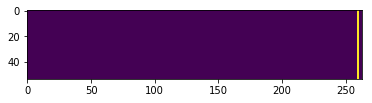

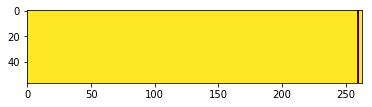

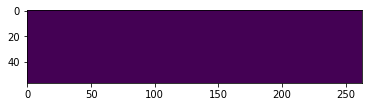

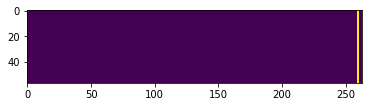

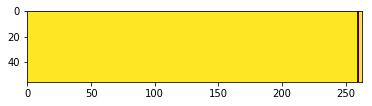

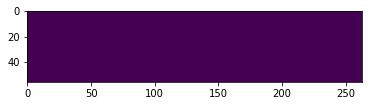

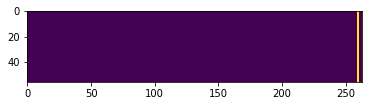

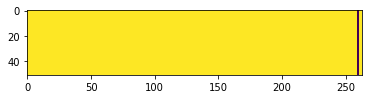

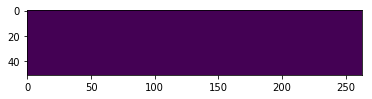

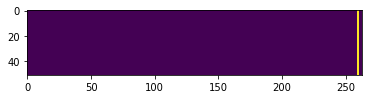

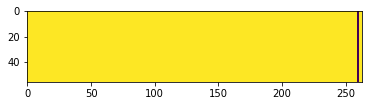

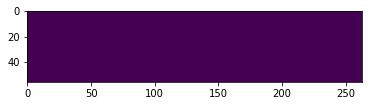

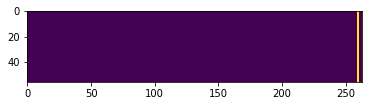

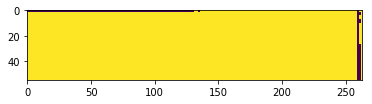

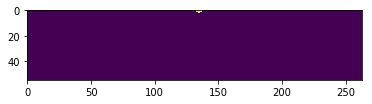

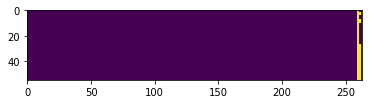

9


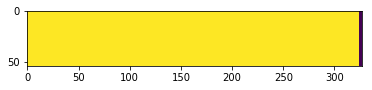

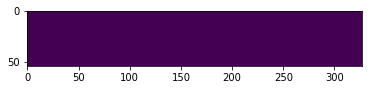

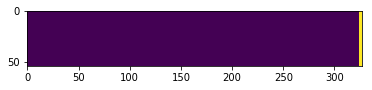

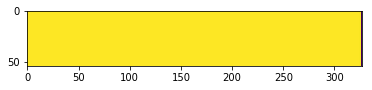

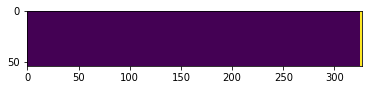

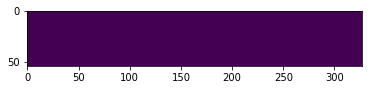

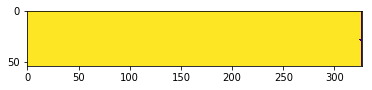

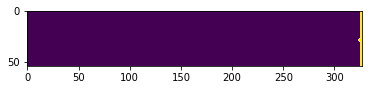

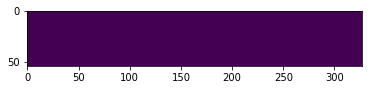

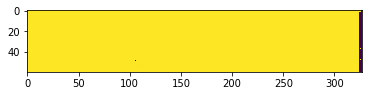

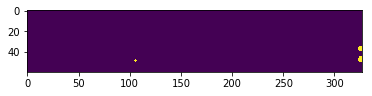

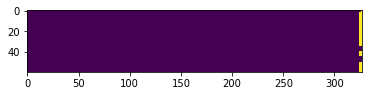

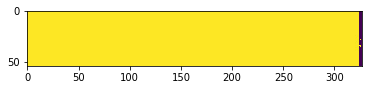

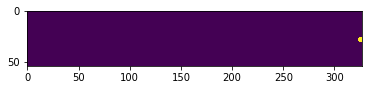

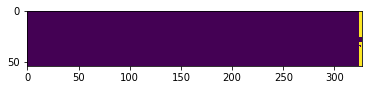

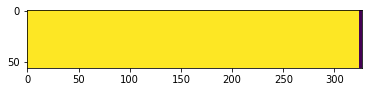

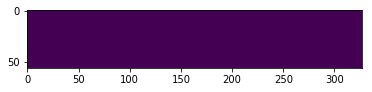

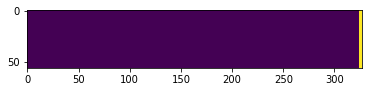

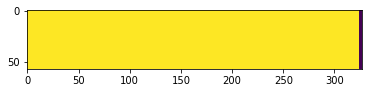

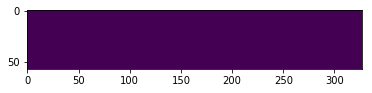

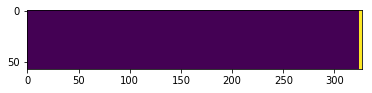

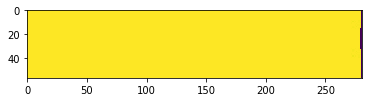

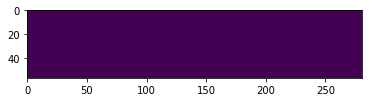

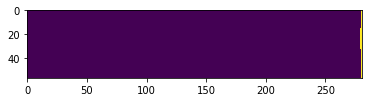

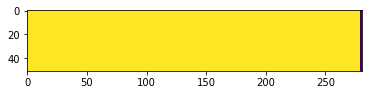

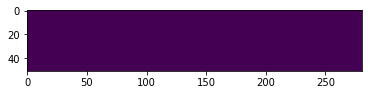

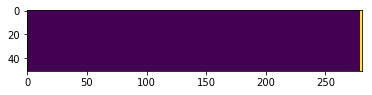

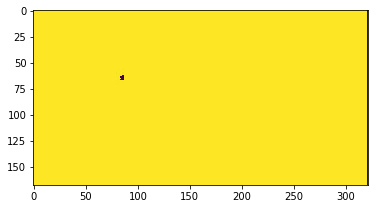

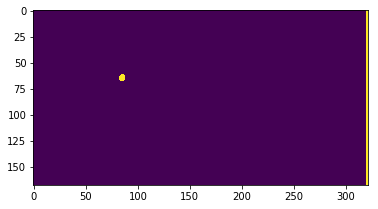

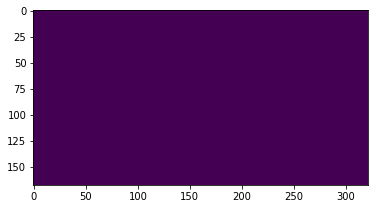

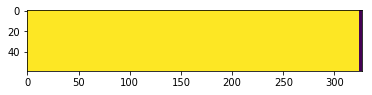

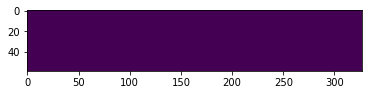

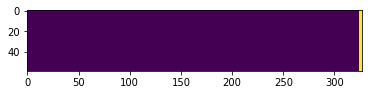

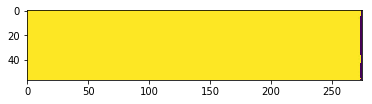

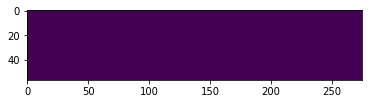

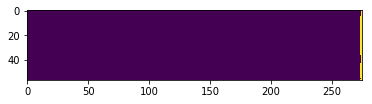

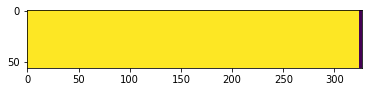

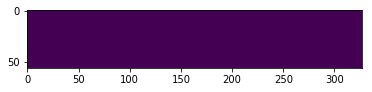

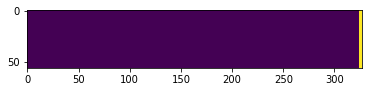

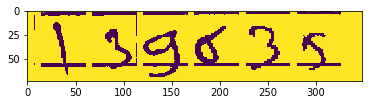

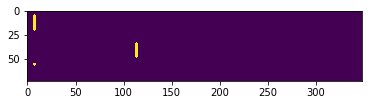

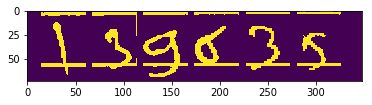

86662518


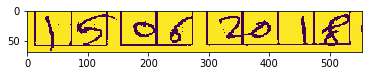

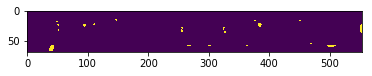

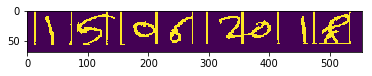

911


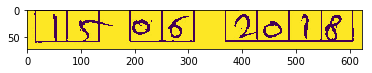

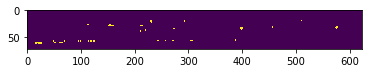

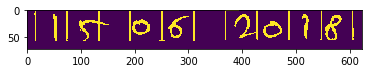

9209114169161481


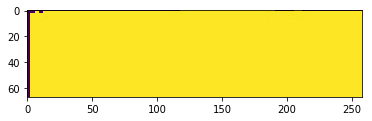

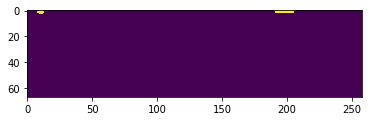

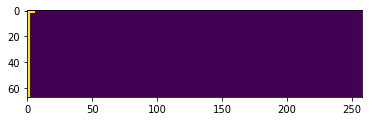

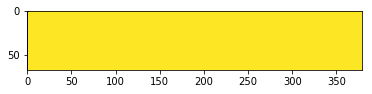

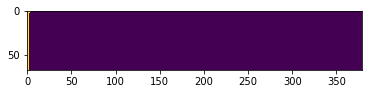

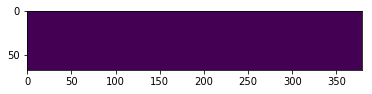

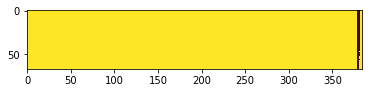

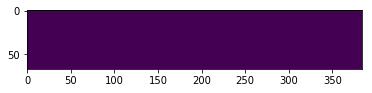

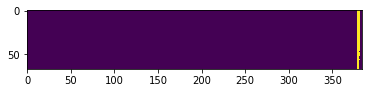

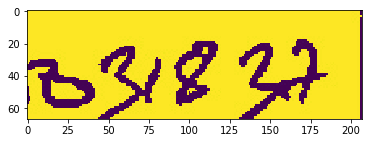

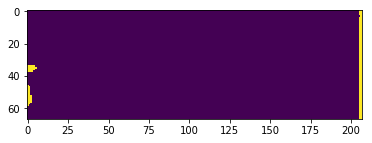

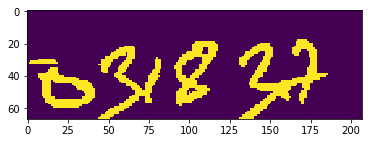

24166


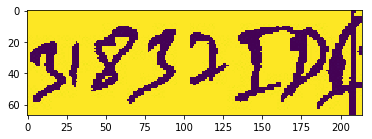

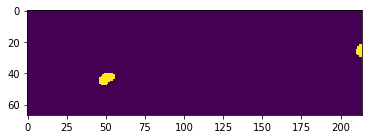

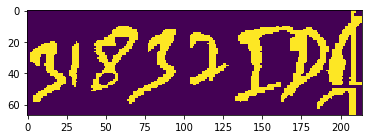

22612516


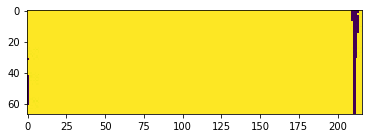

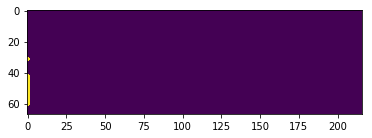

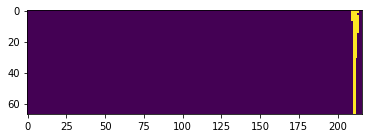

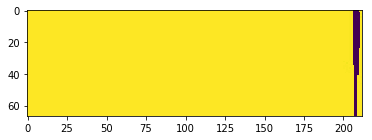

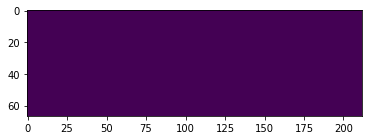

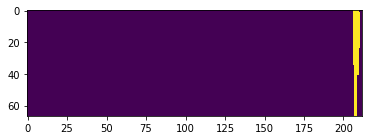

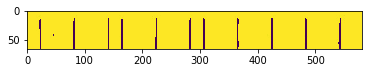

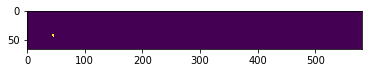

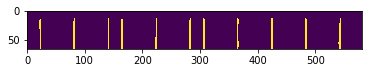

81111881188811


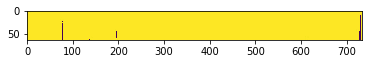

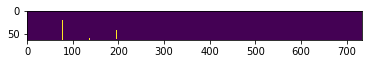

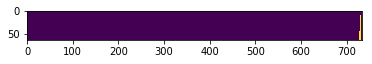

11


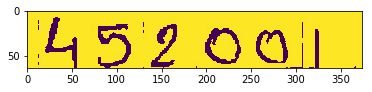

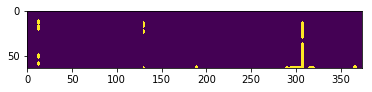

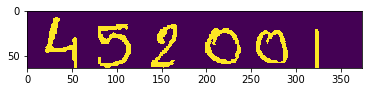

718161428


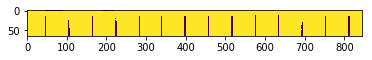

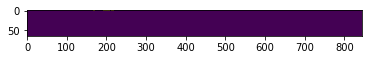

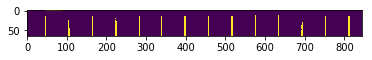

8111181181188888811


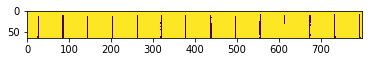

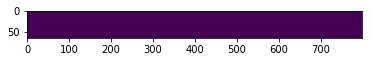

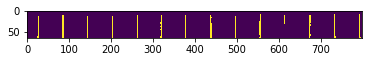

1188888988111189


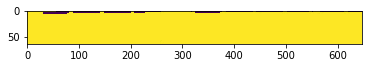

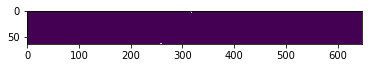

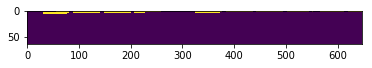

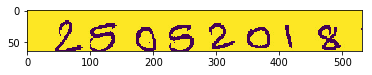

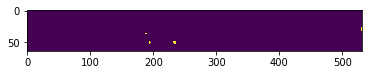

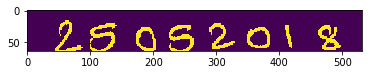

25614182514116


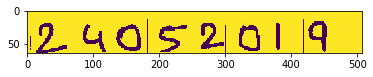

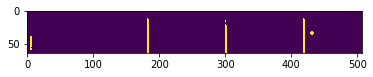

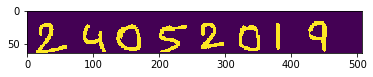

2524141825141116


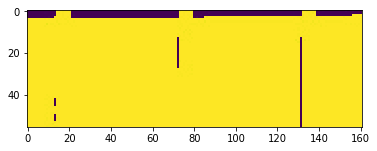

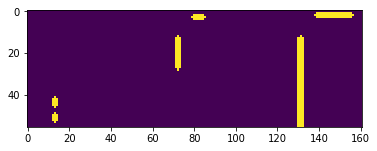

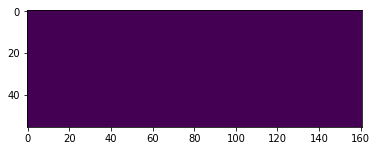

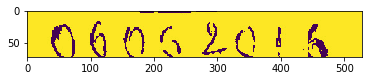

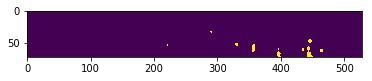

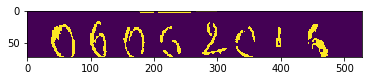

1463172570


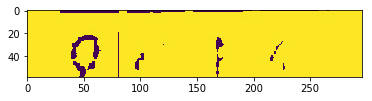

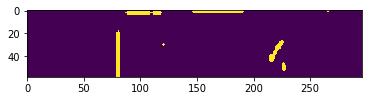

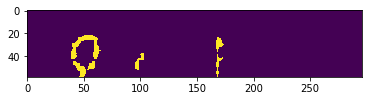

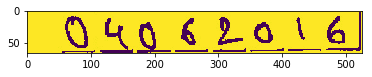

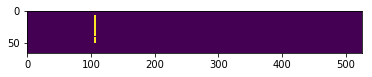

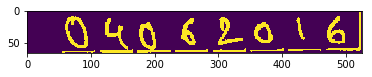

16241612514866


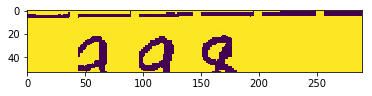

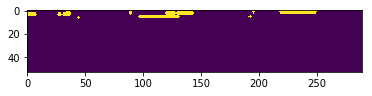

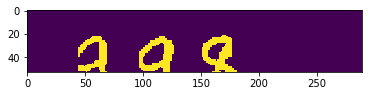

01616


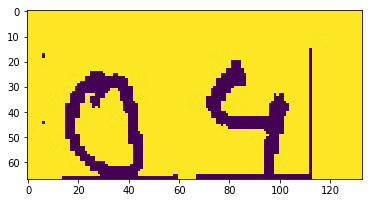

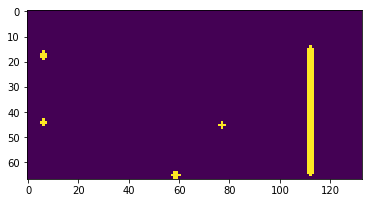

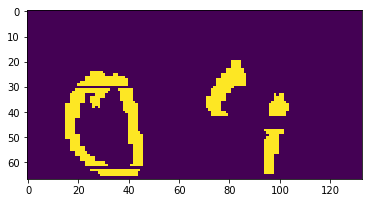

224


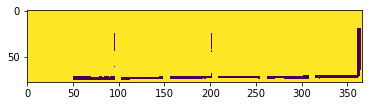

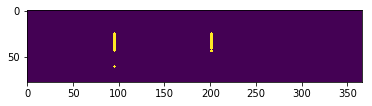

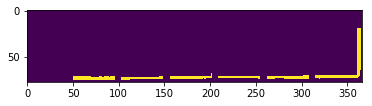

9


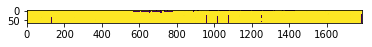

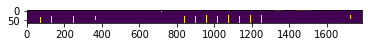

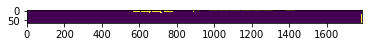

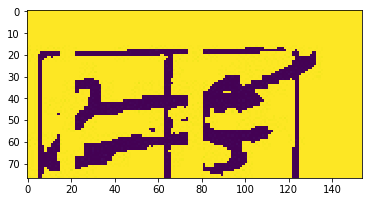

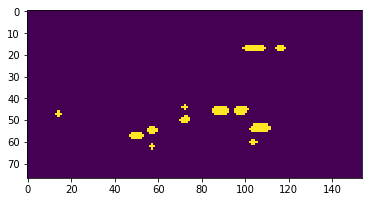

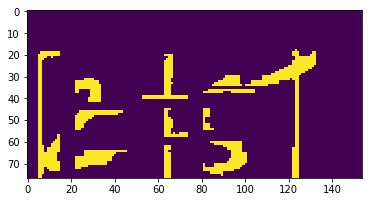

6


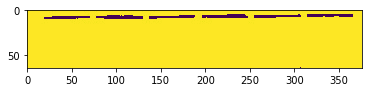

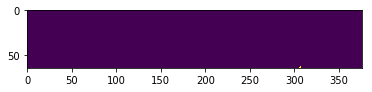

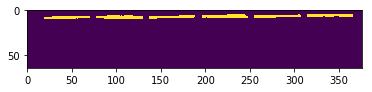

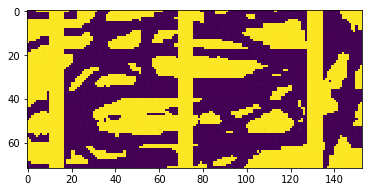

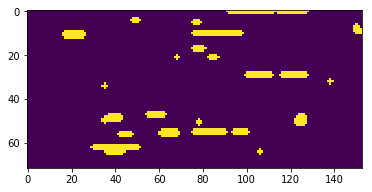

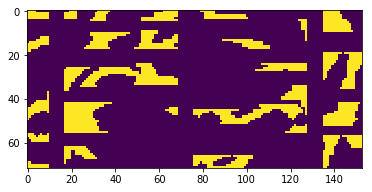

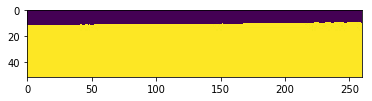

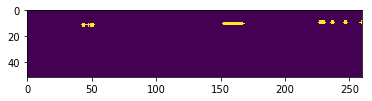

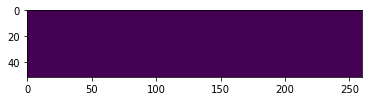

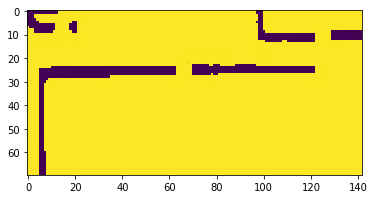

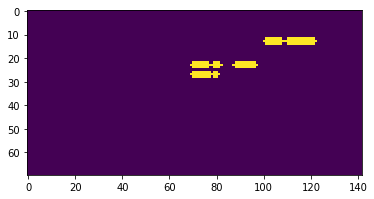

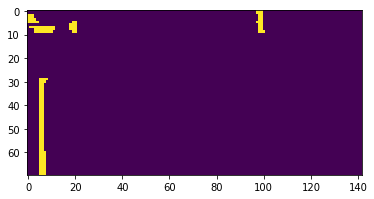

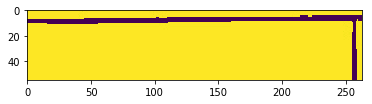

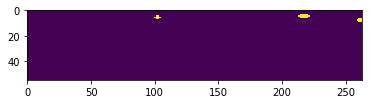

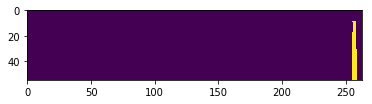

19


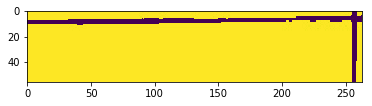

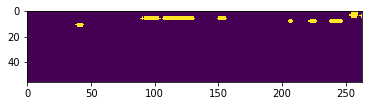

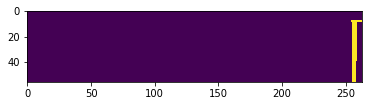

19


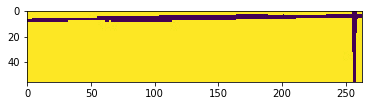

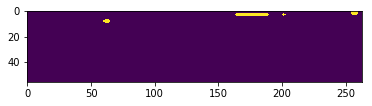

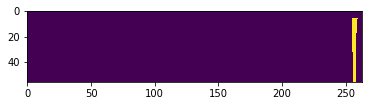

24


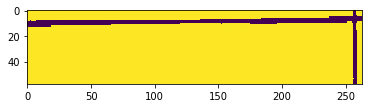

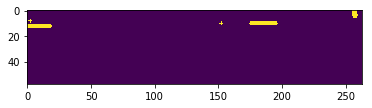

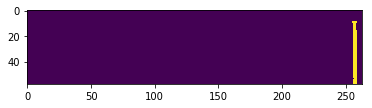

9


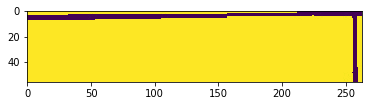

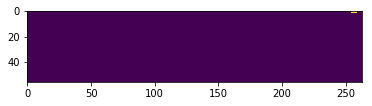

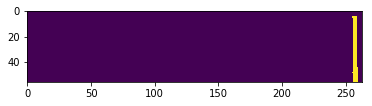

13


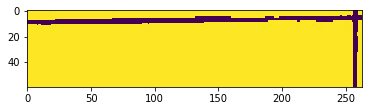

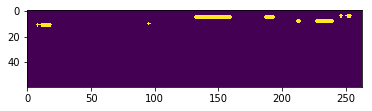

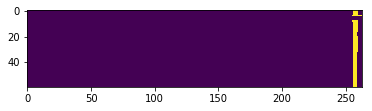

13


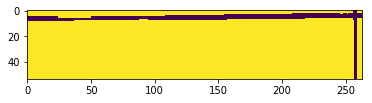

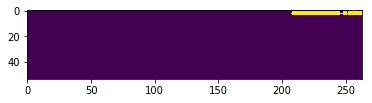

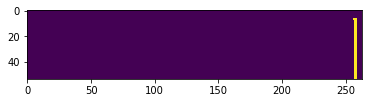

13


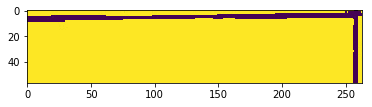

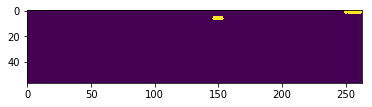

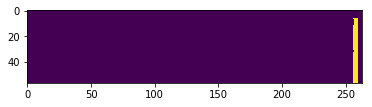

6


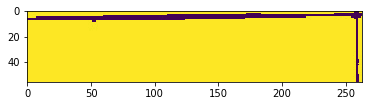

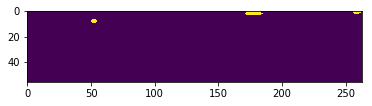

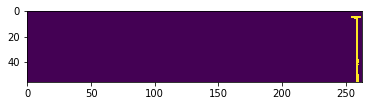

9


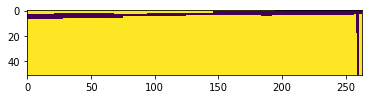

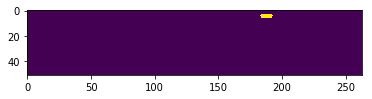

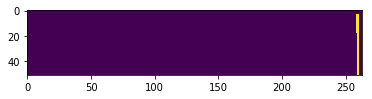

19


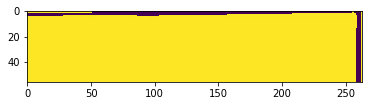

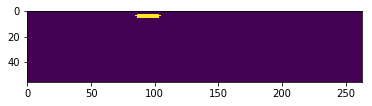

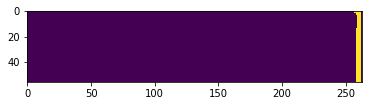

9


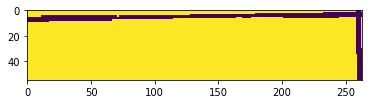

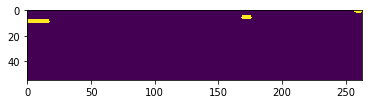

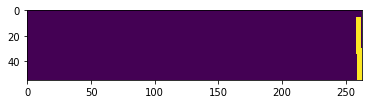

6


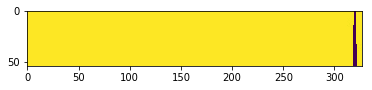

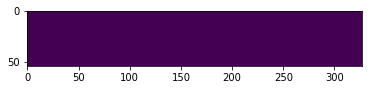

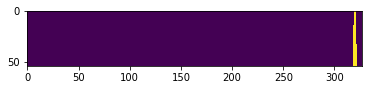

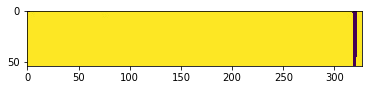

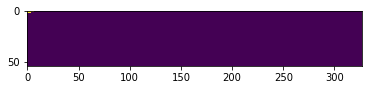

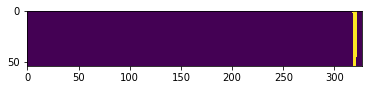

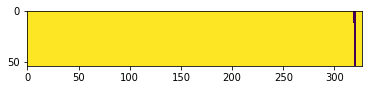

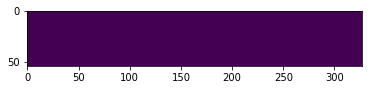

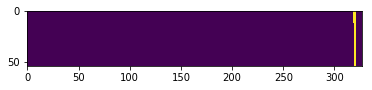

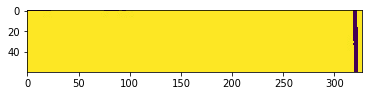

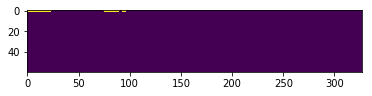

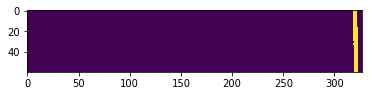

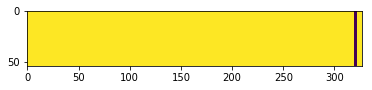

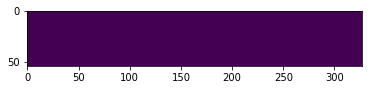

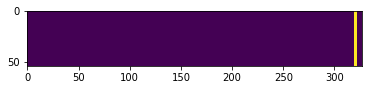

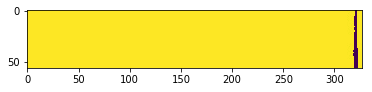

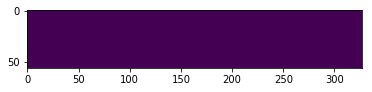

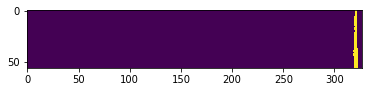

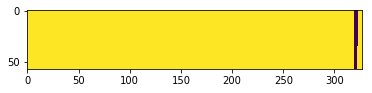

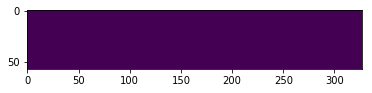

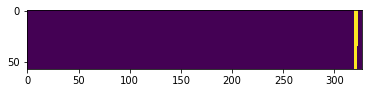

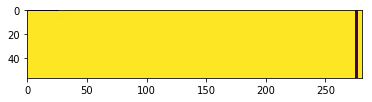

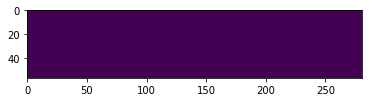

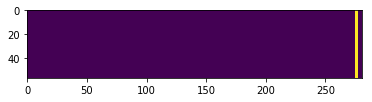

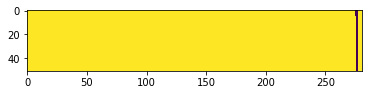

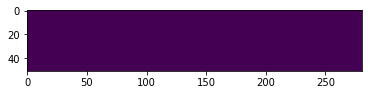

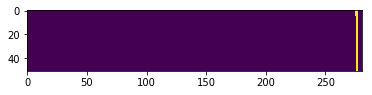

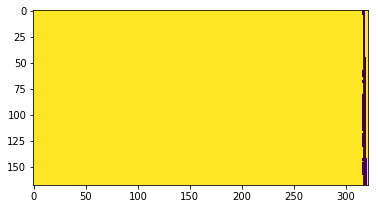

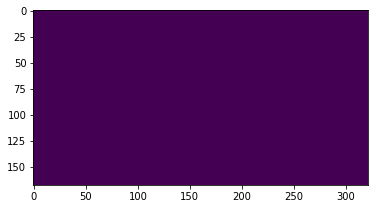

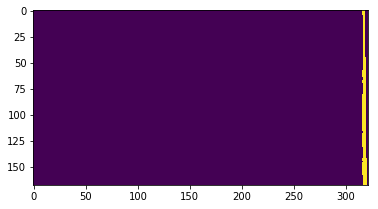

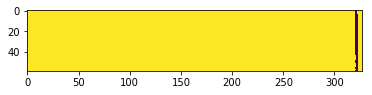

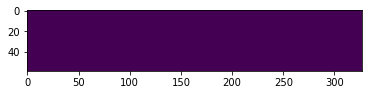

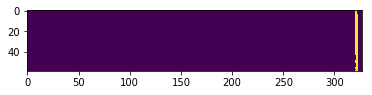

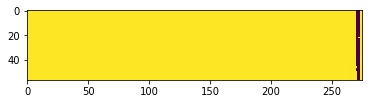

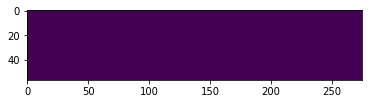

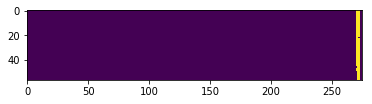

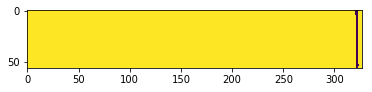

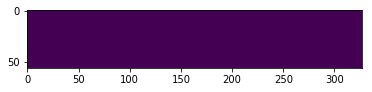

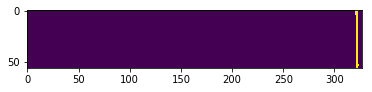

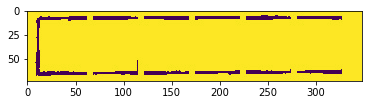

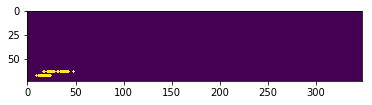

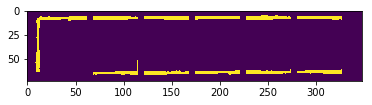

9


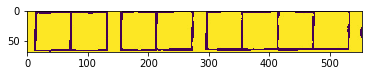

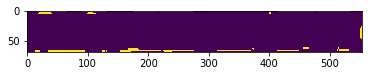

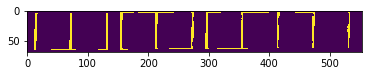

891198118889


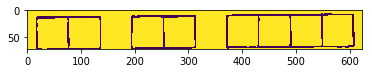

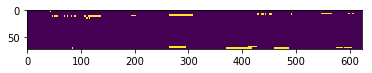

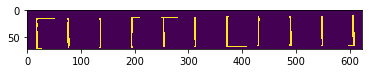

98118939888


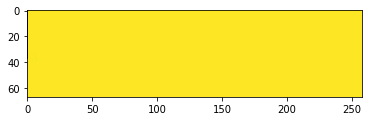

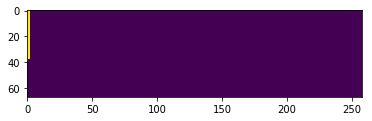

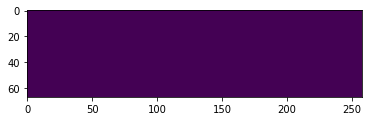

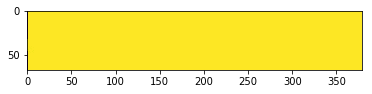

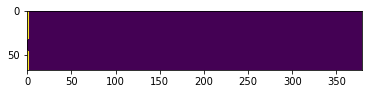

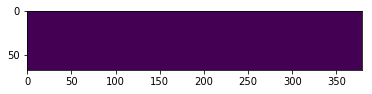

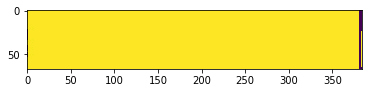

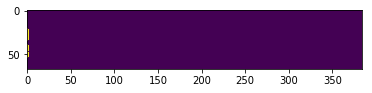

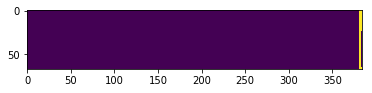

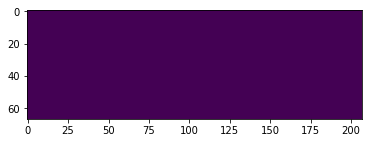

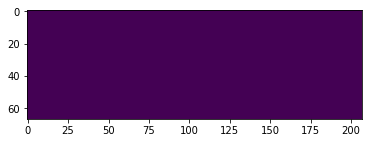

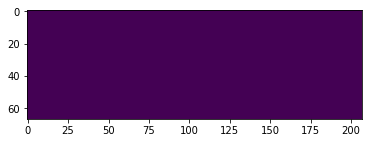

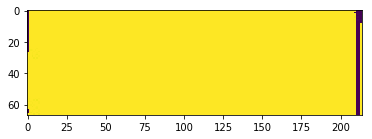

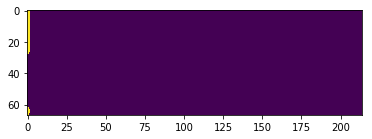

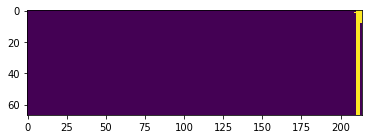

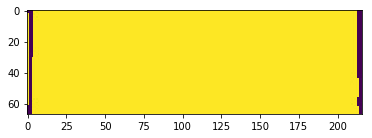

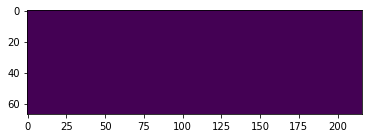

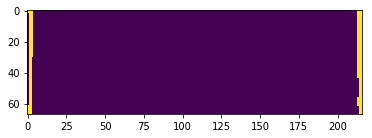

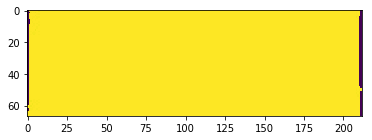

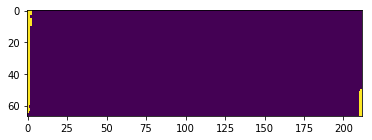

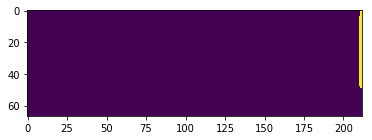

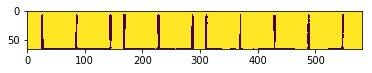

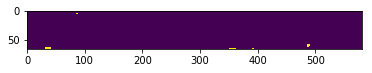

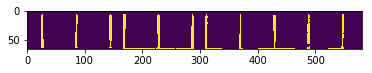

991111911911811


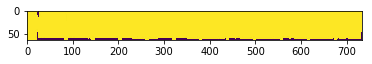

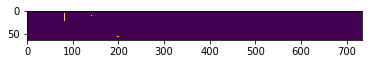

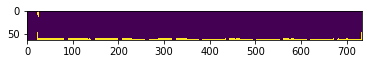

1111


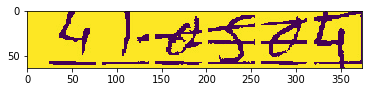

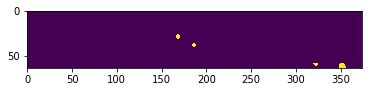

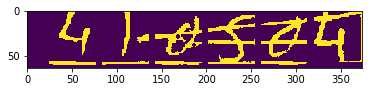

1525


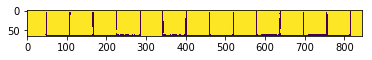

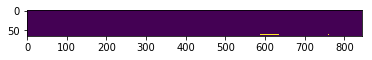

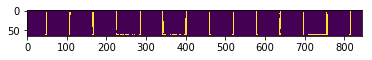

11911118988899


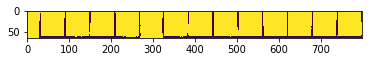

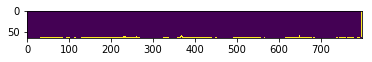

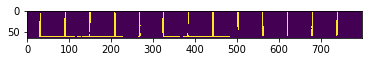

911911911911911


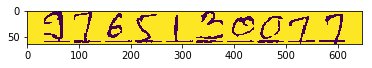

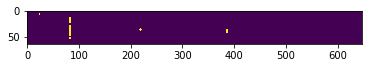

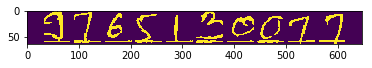

681181117414989


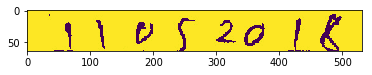

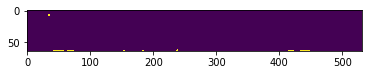

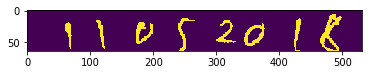

24112018251486


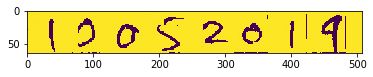

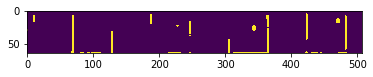

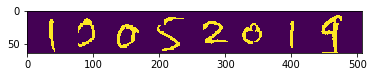

89149251486


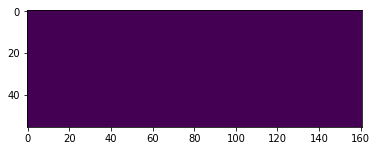

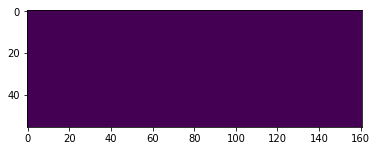

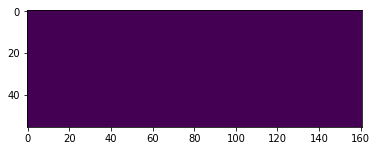

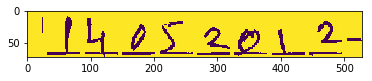

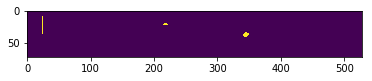

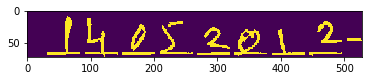

82414325141125


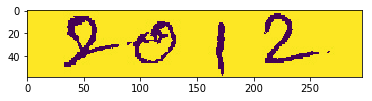

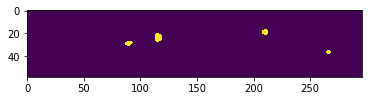

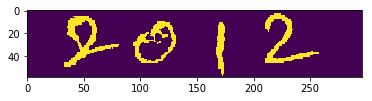

614825


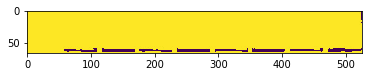

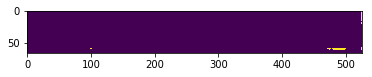

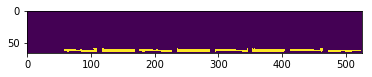

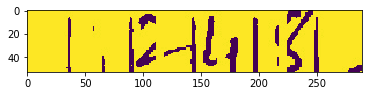

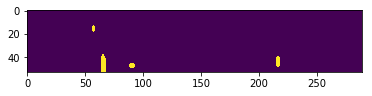

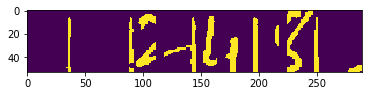

867228226


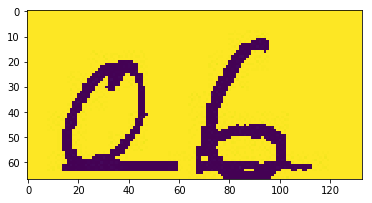

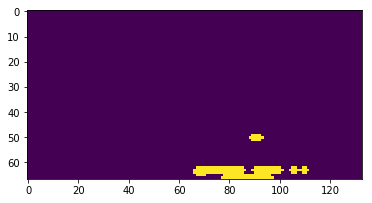

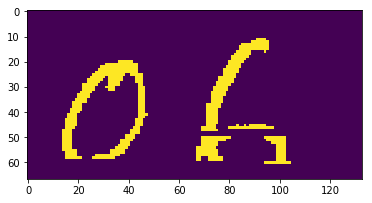

142


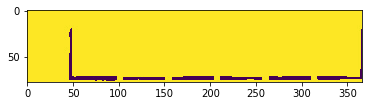

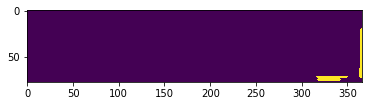

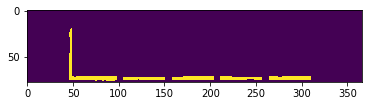

11


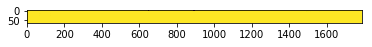

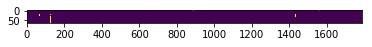

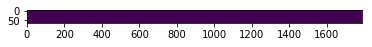

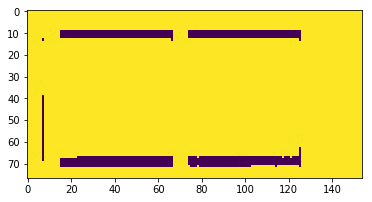

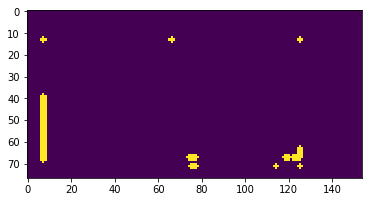

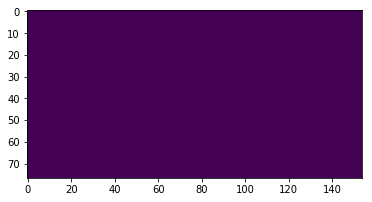

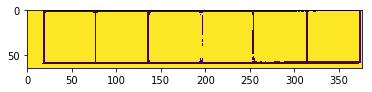

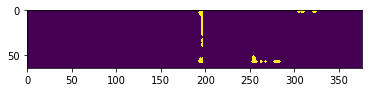

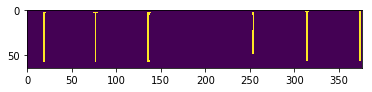

89998


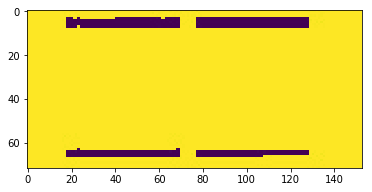

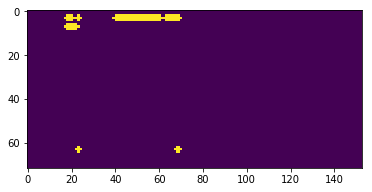

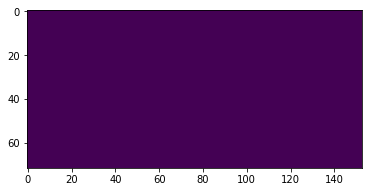

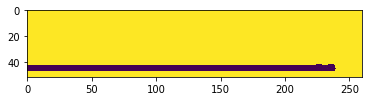

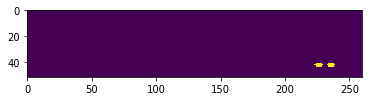

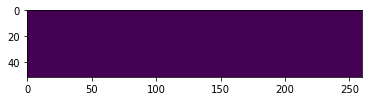

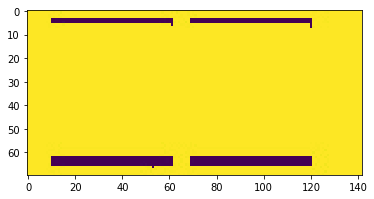

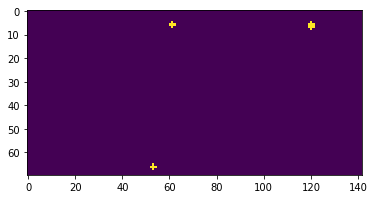

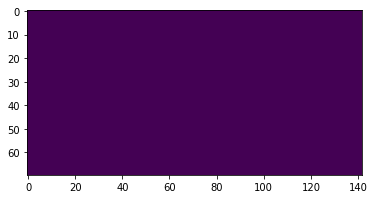

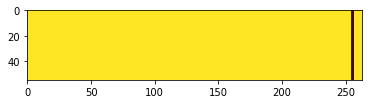

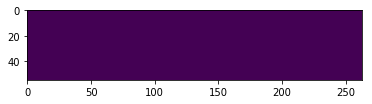

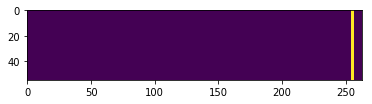

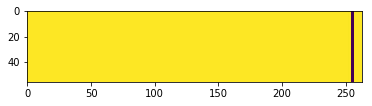

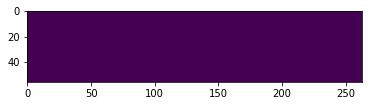

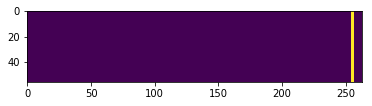

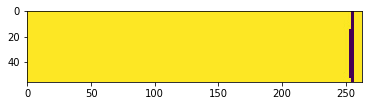

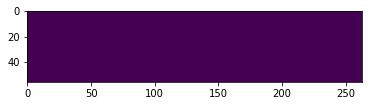

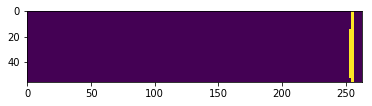

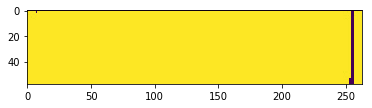

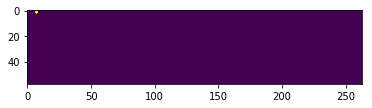

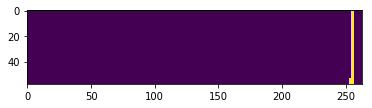

3


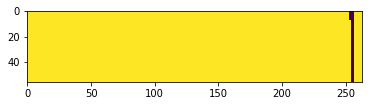

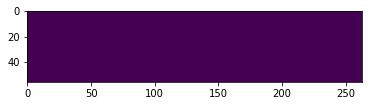

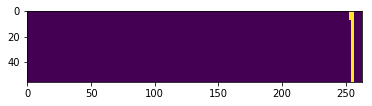

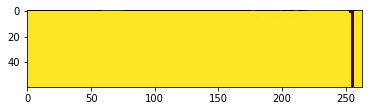

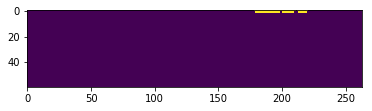

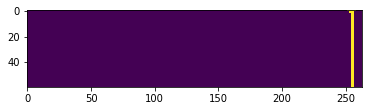

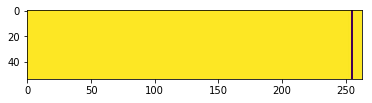

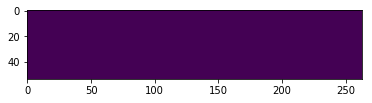

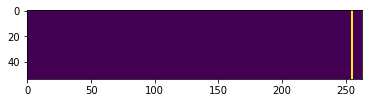

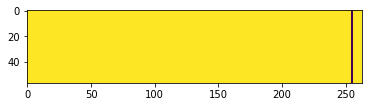

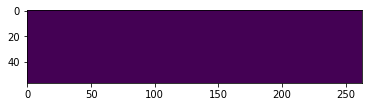

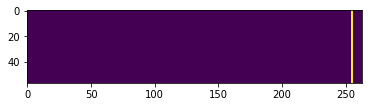

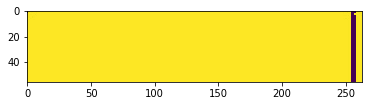

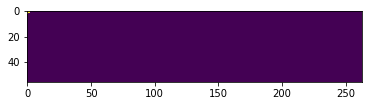

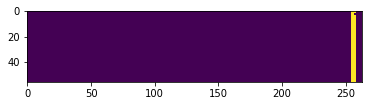

3


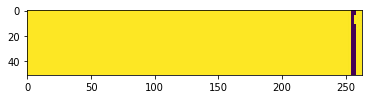

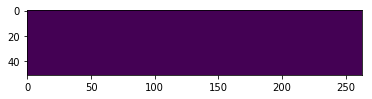

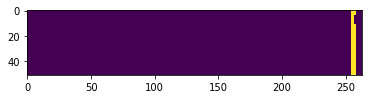

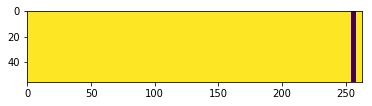

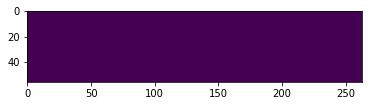

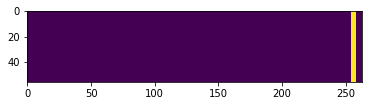

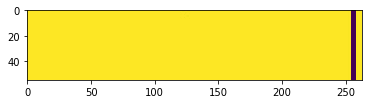

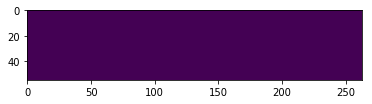

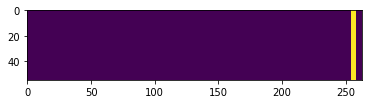

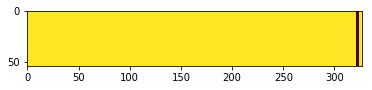

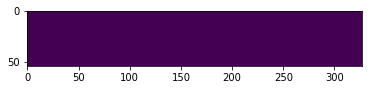

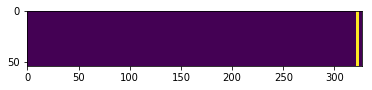

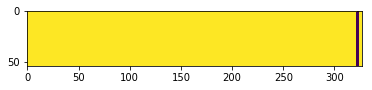

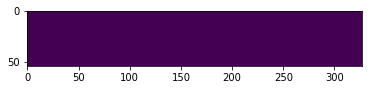

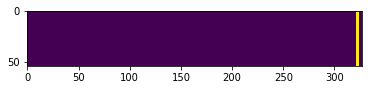

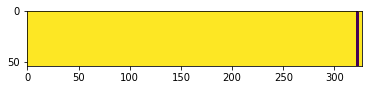

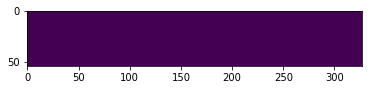

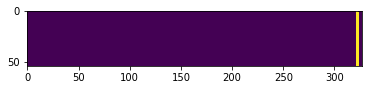

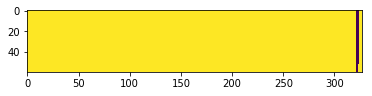

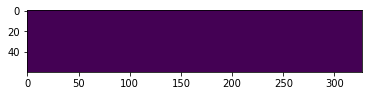

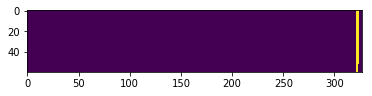

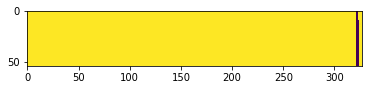

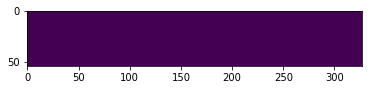

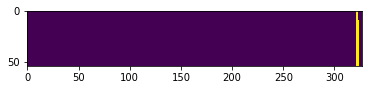

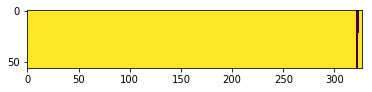

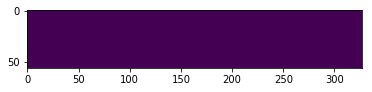

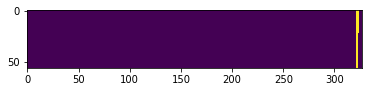

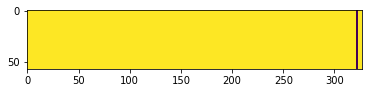

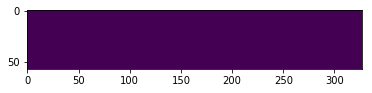

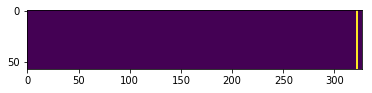

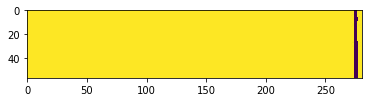

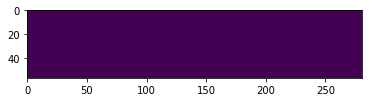

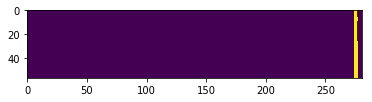

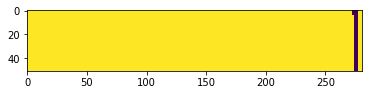

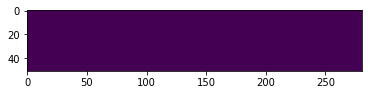

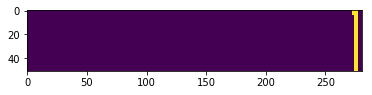

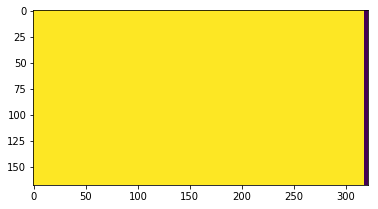

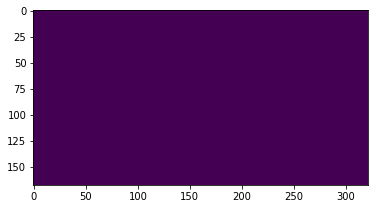

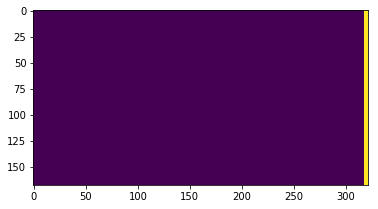

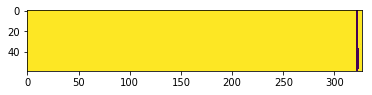

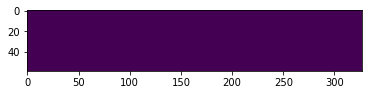

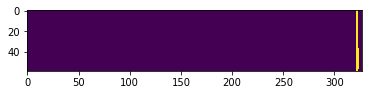

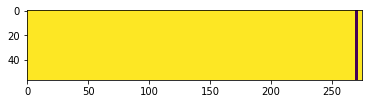

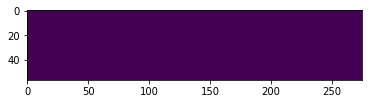

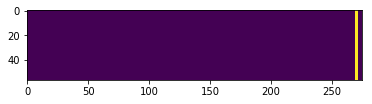

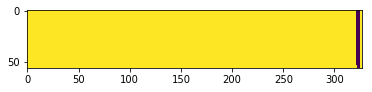

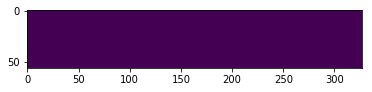

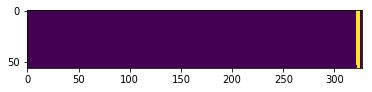

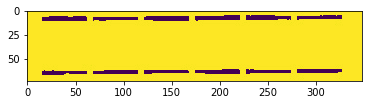

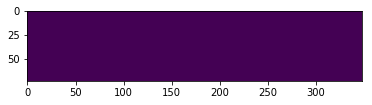

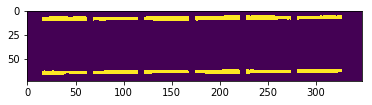

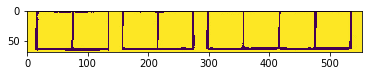

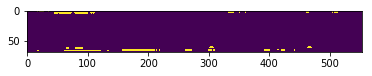

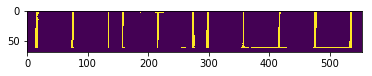

998911888


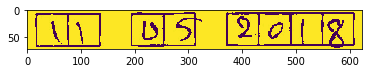

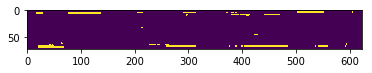

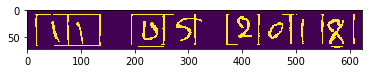

11312018662214222020162


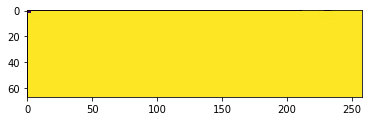

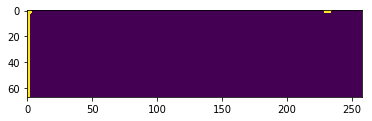

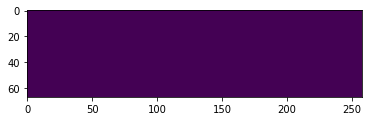

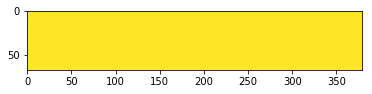

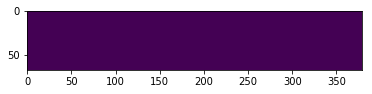

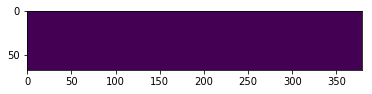

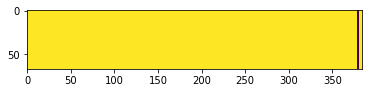

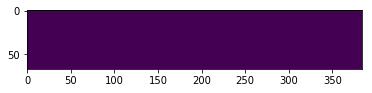

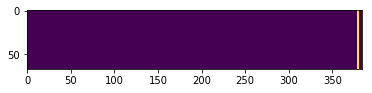

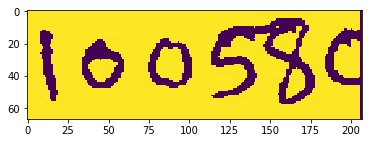

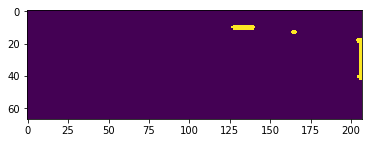

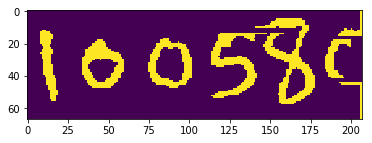

1414181


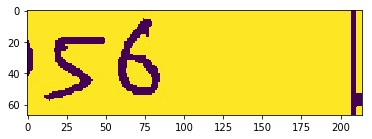

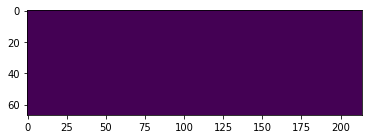

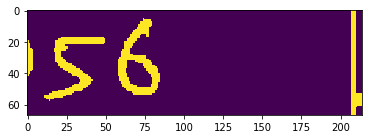

186


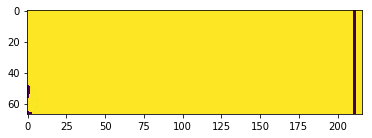

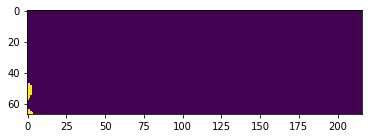

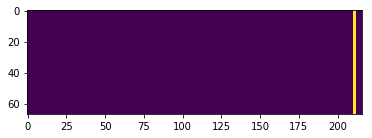

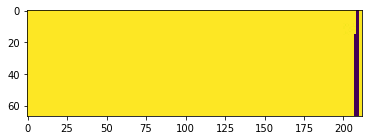

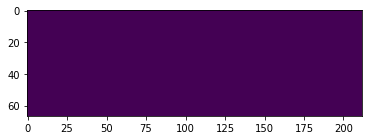

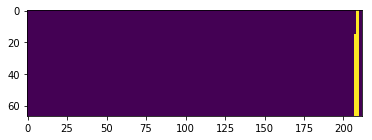

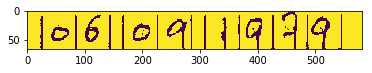

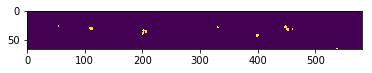

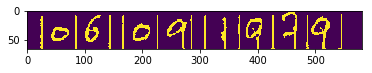

1262222142261311812161222221611


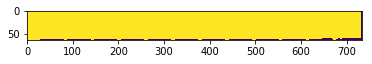

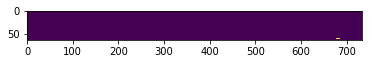

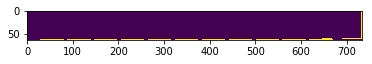

11


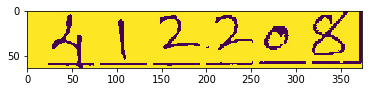

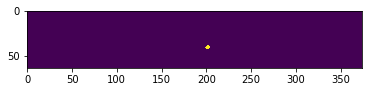

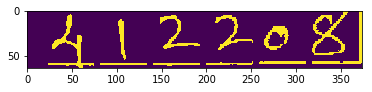

2482525


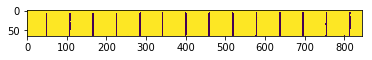

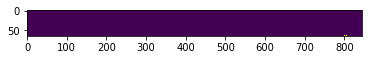

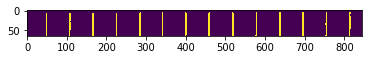

88889888898989


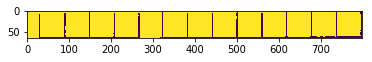

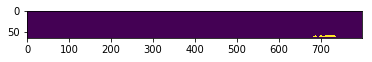

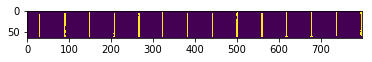

889898999998911


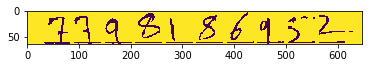

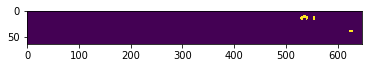

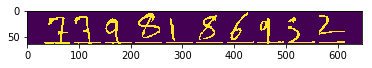

62561611161162525


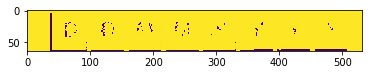

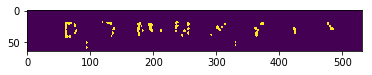

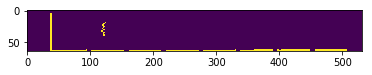

9


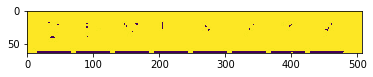

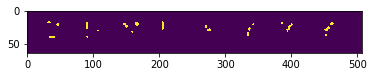

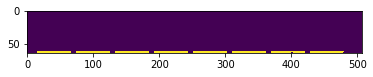

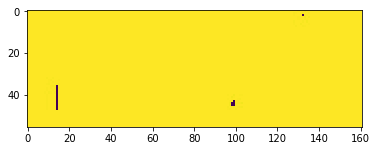

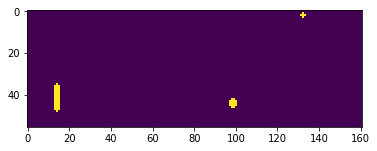

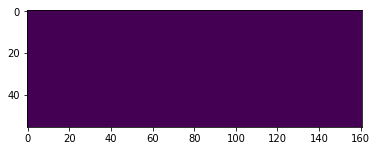

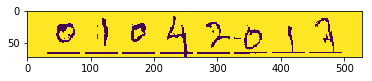

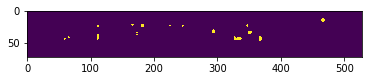

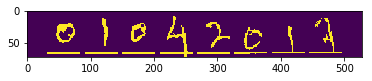

142411251486


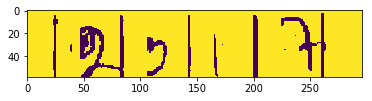

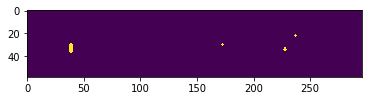

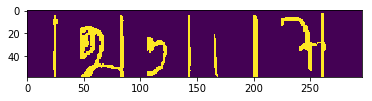

229228249


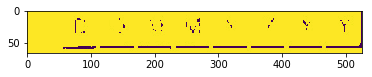

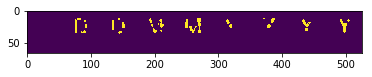

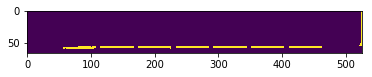

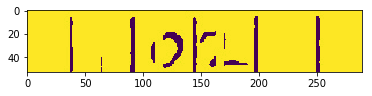

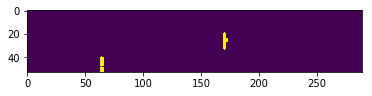

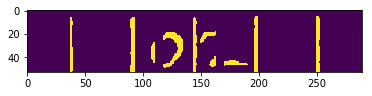

82491298


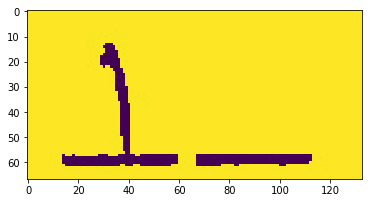

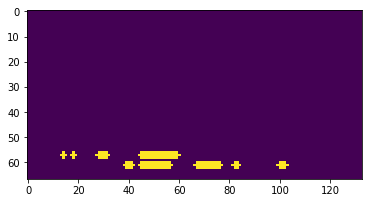

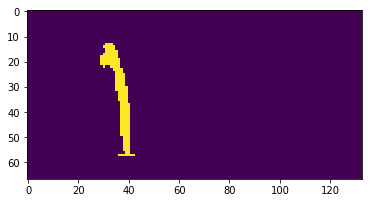

9


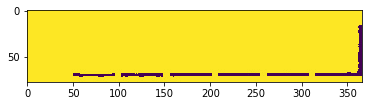

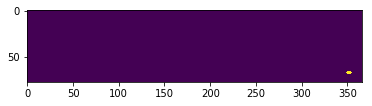

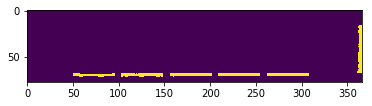

9


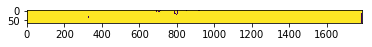

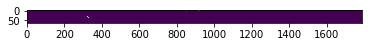

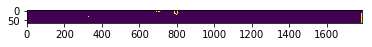

9


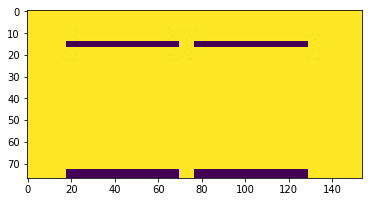

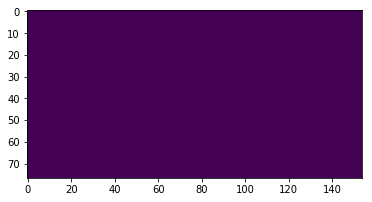

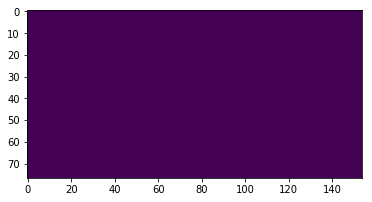

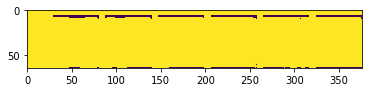

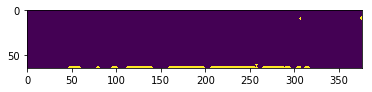

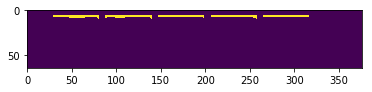

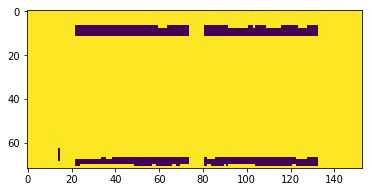

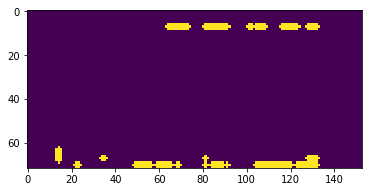

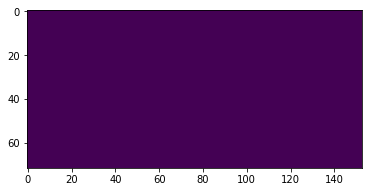

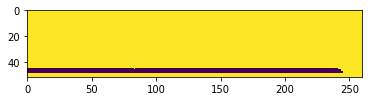

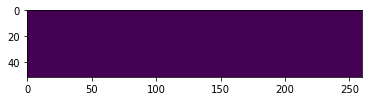

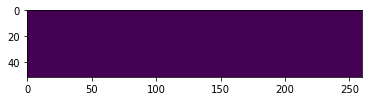

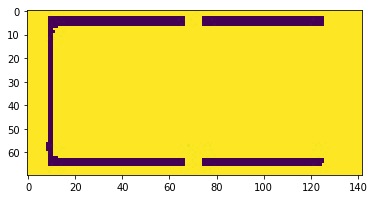

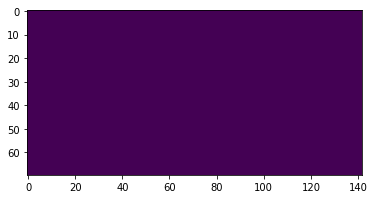

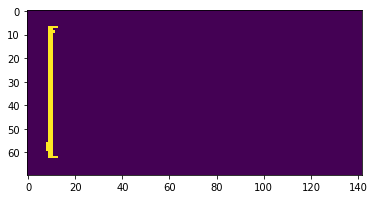

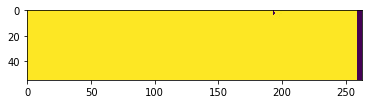

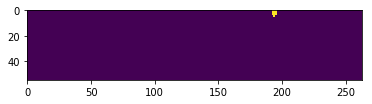

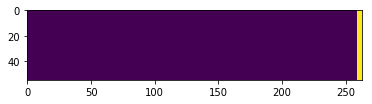

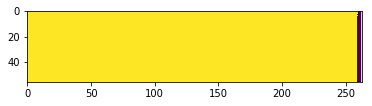

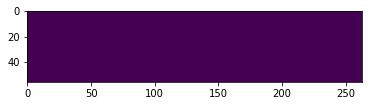

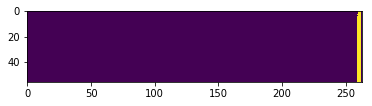

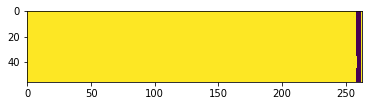

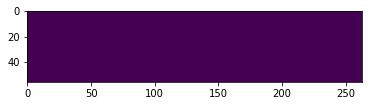

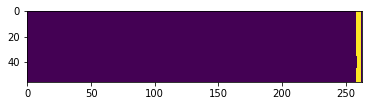

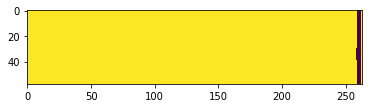

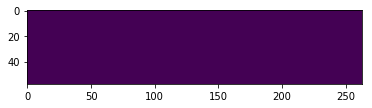

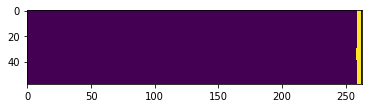

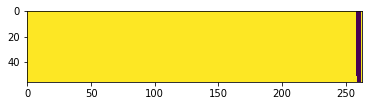

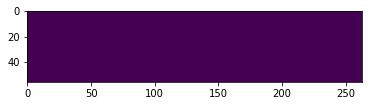

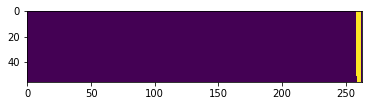

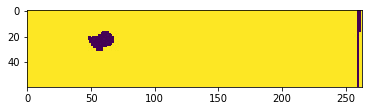

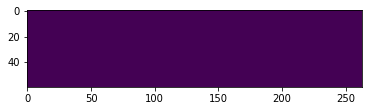

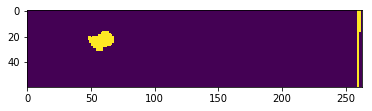

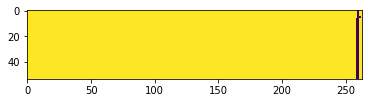

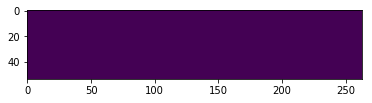

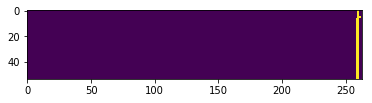

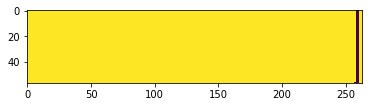

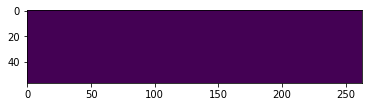

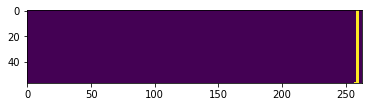

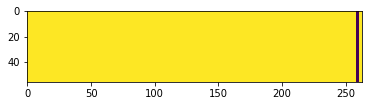

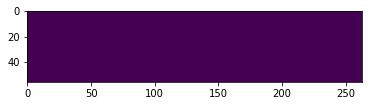

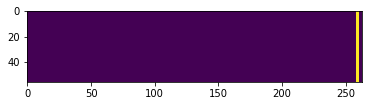

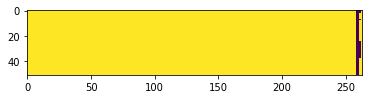

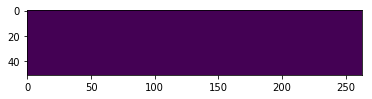

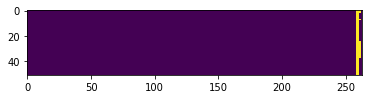

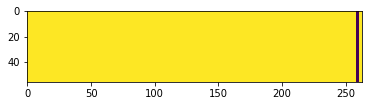

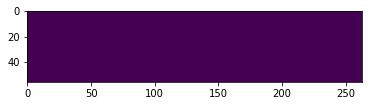

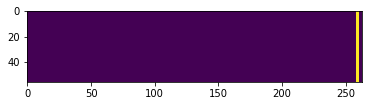

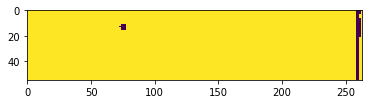

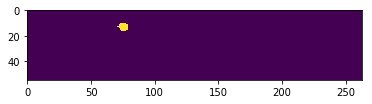

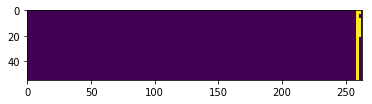

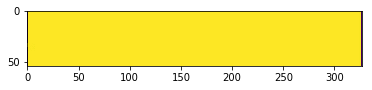

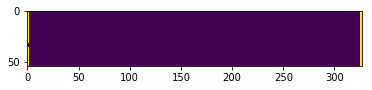

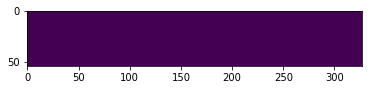

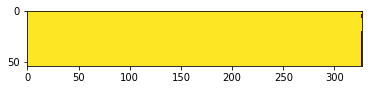

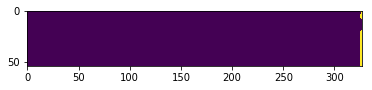

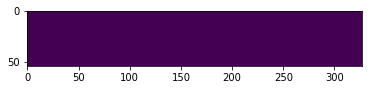

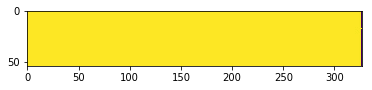

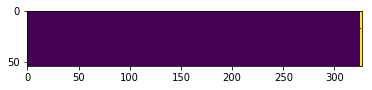

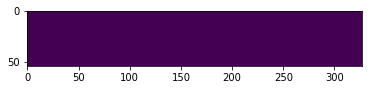

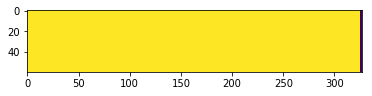

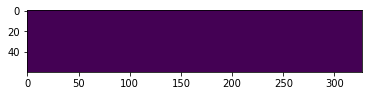

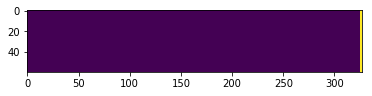

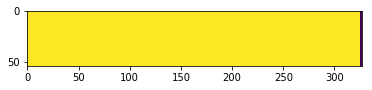

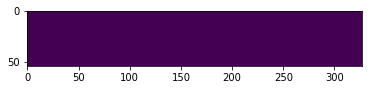

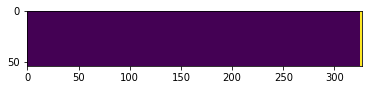

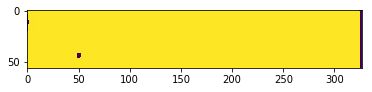

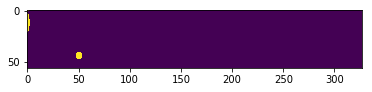

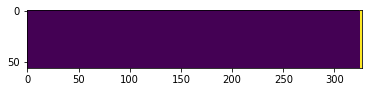

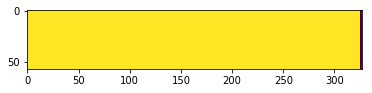

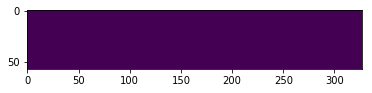

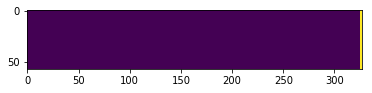

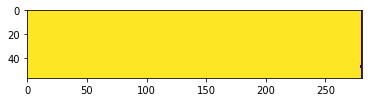

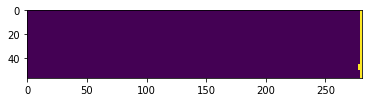

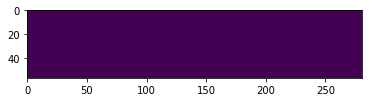

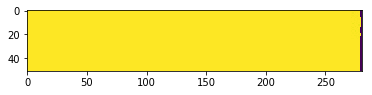

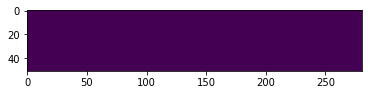

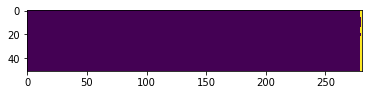

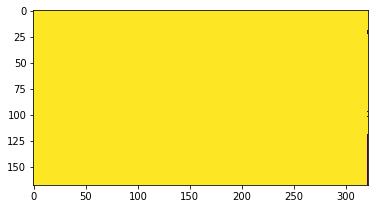

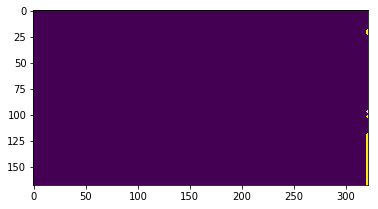

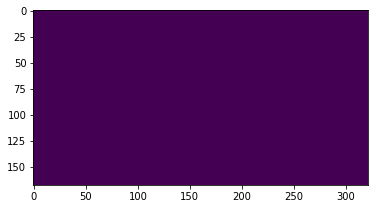

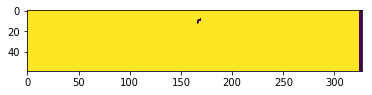

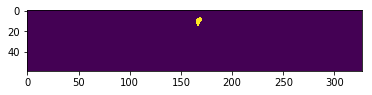

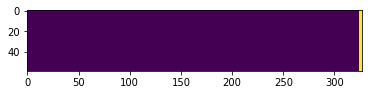

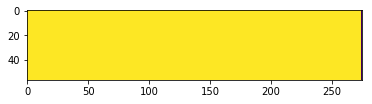

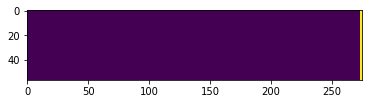

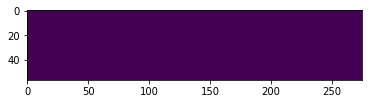

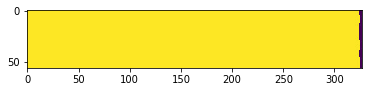

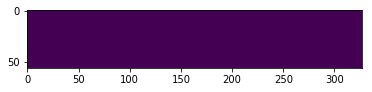

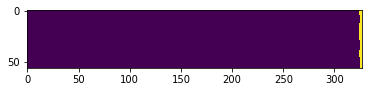

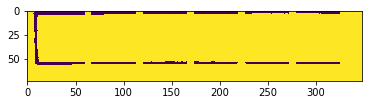

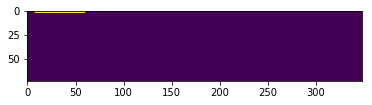

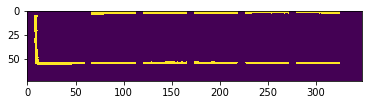

2


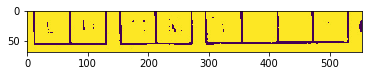

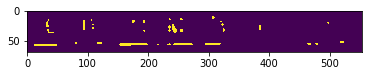

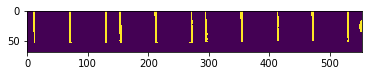

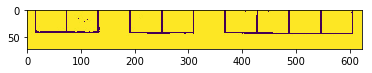

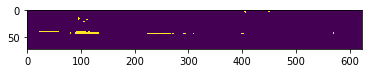

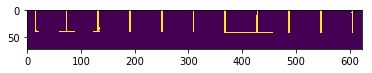

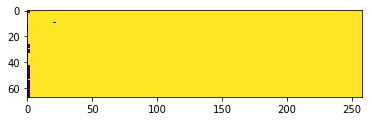

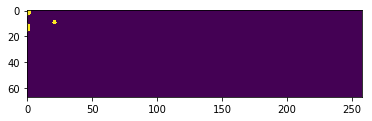

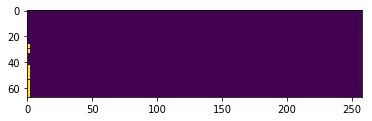

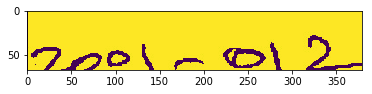

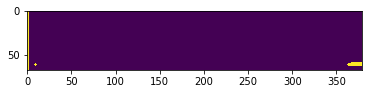

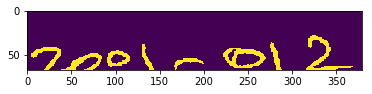

81225


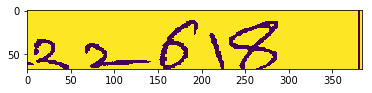

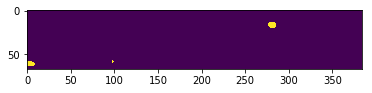

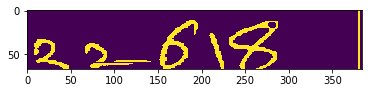

2512416


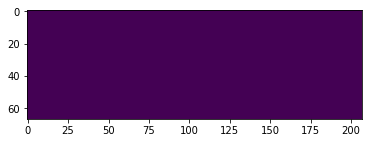

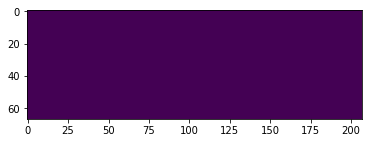

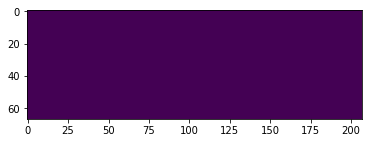

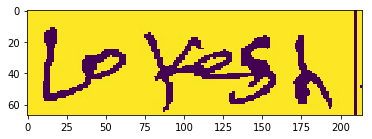

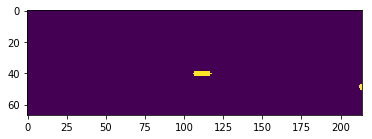

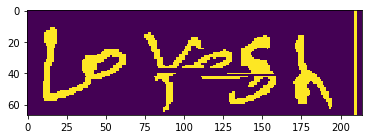

67


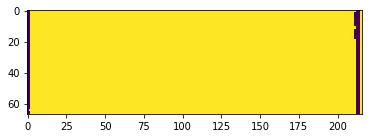

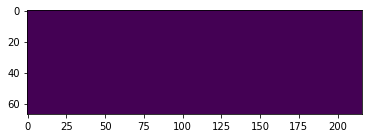

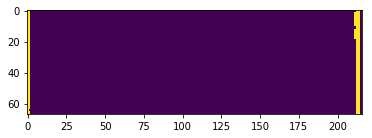

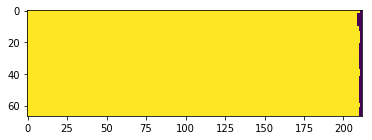

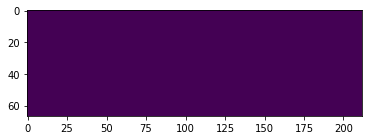

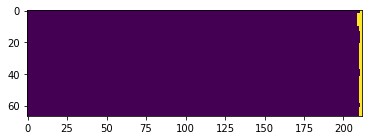

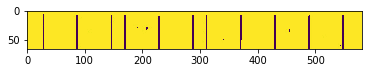

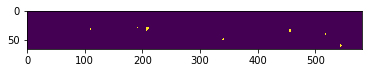

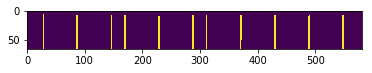

8824871181189


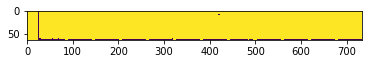

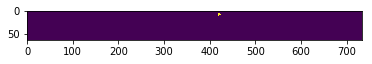

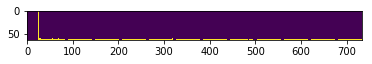

11


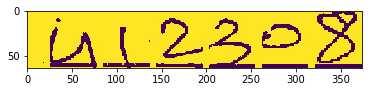

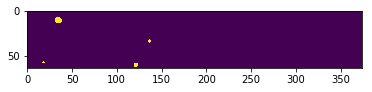

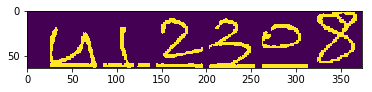

3925258


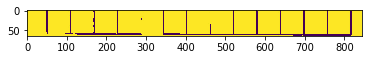

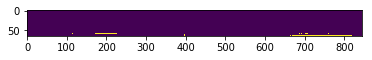

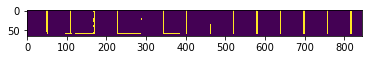

1181111


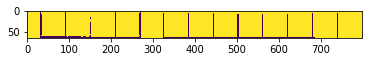

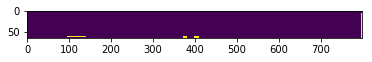

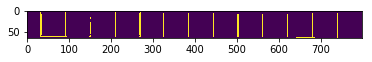

1189911111199889


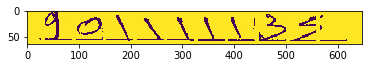

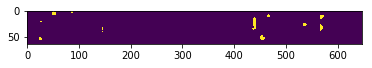

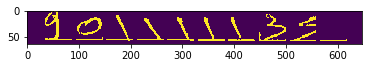

29981125


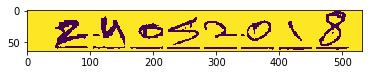

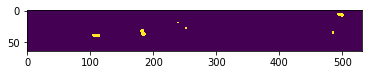

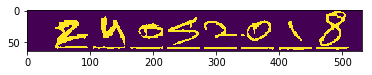

2520182816


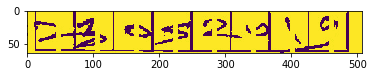

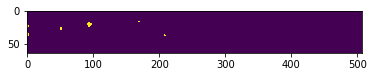

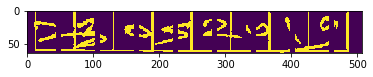

9619924


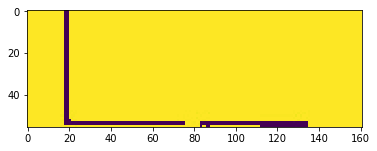

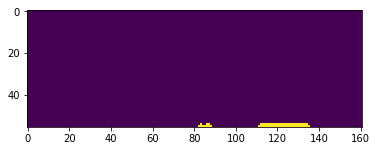

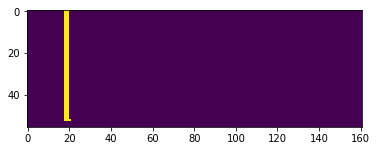

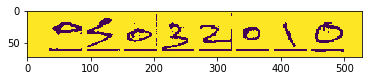

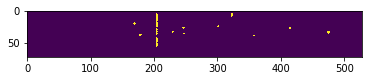

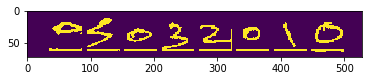

1842525114


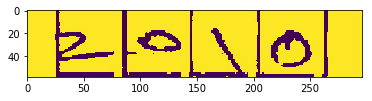

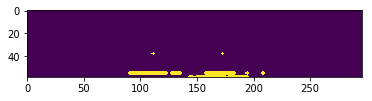

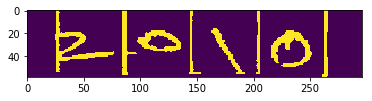

914


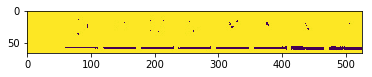

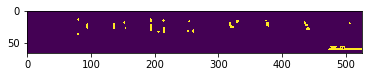

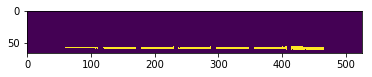

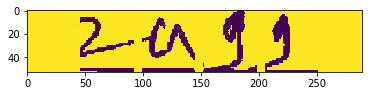

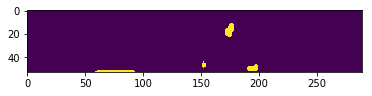

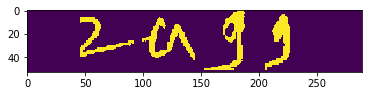

11126


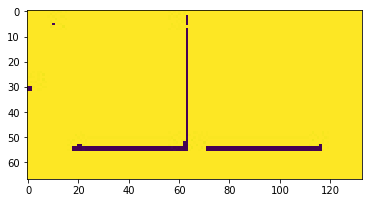

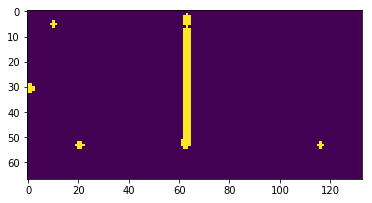

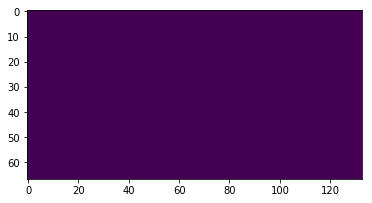

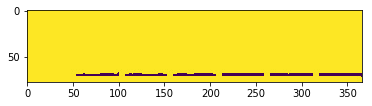

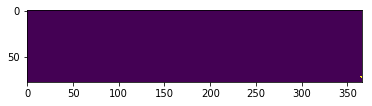

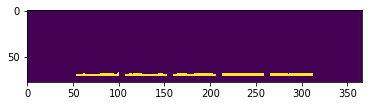

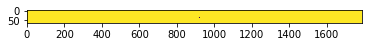

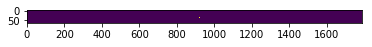

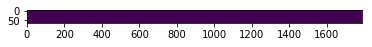

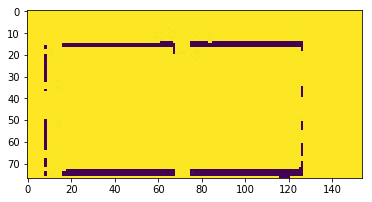

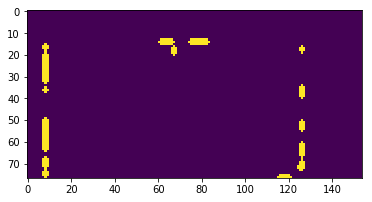

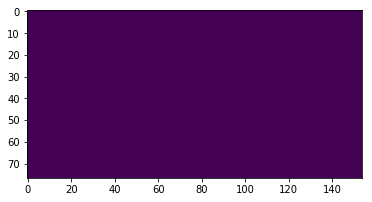

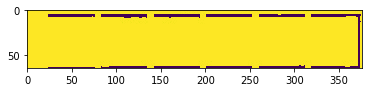

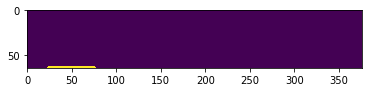

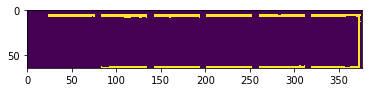

8


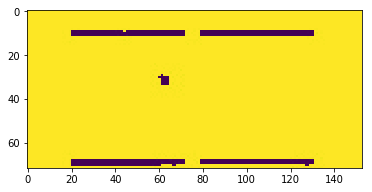

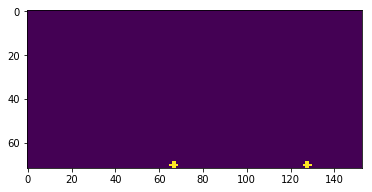

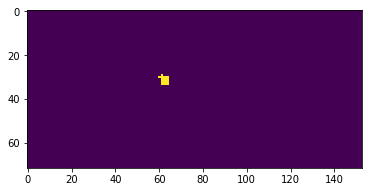

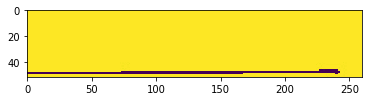

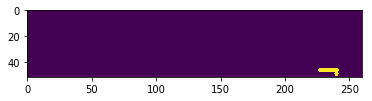

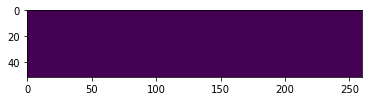

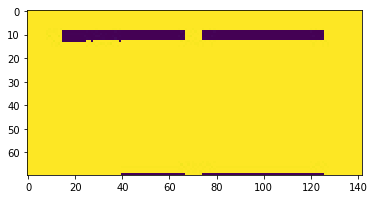

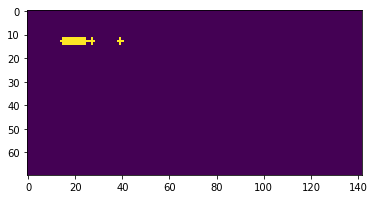

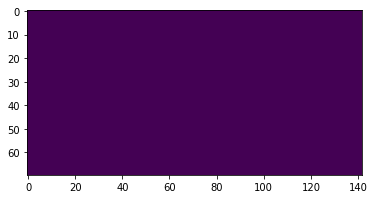

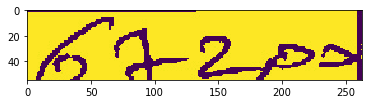

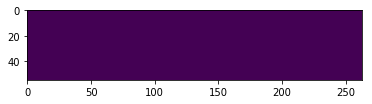

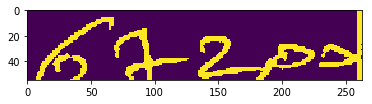

7093


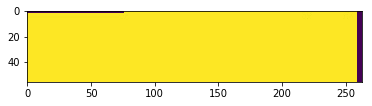

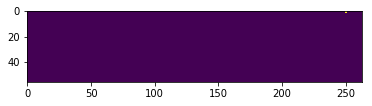

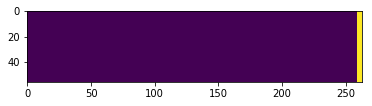

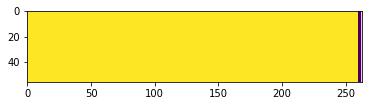

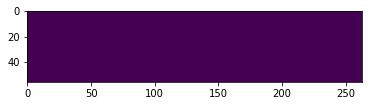

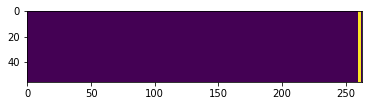

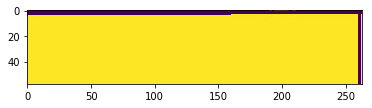

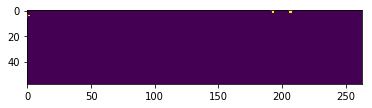

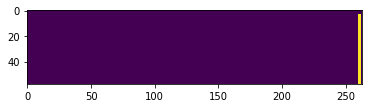

19


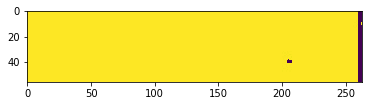

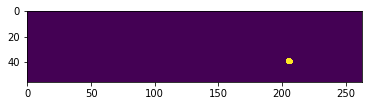

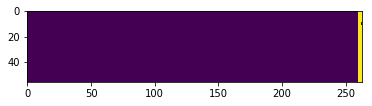

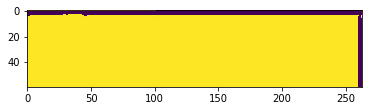

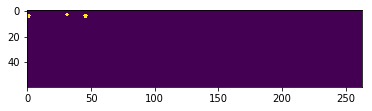

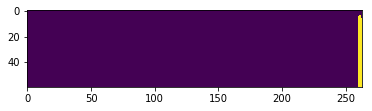

9


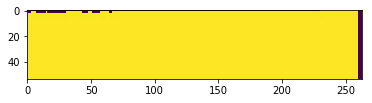

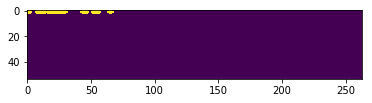

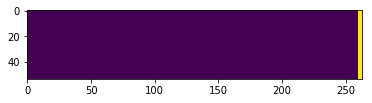

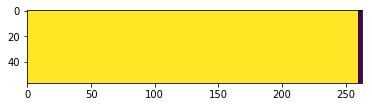

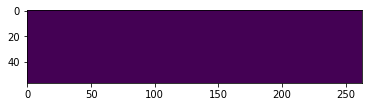

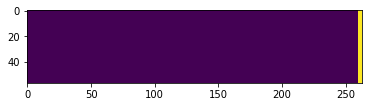

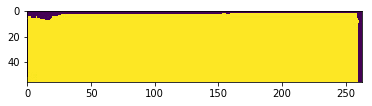

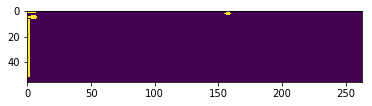

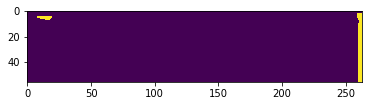

3


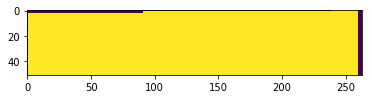

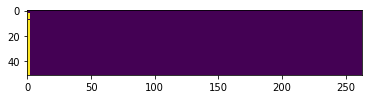

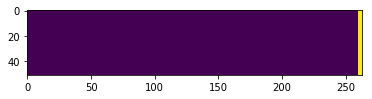

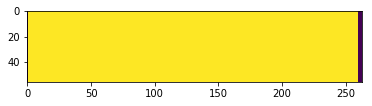

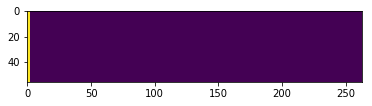

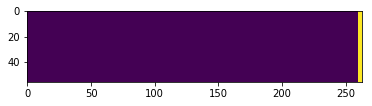

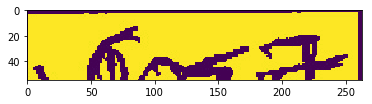

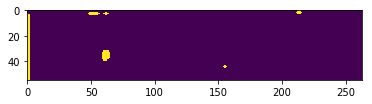

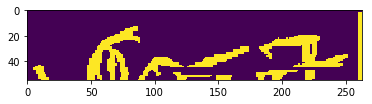

109


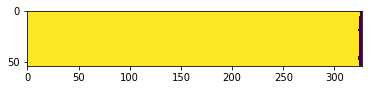

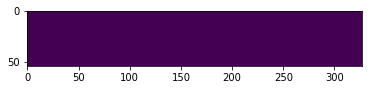

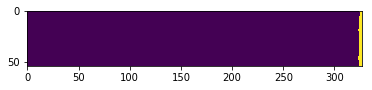

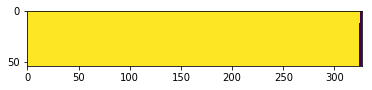

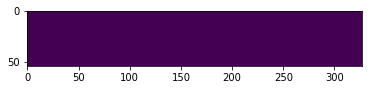

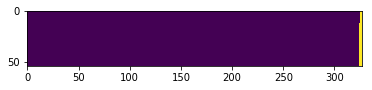

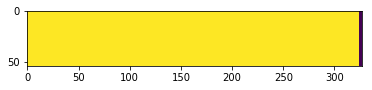

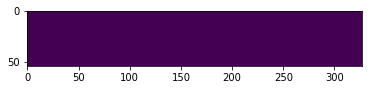

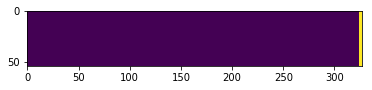

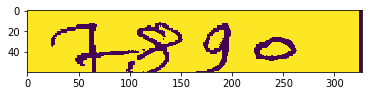

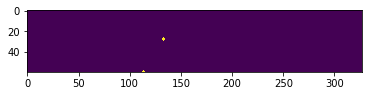

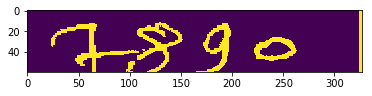

2566


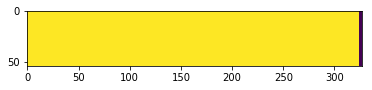

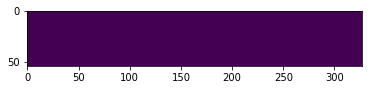

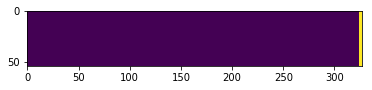

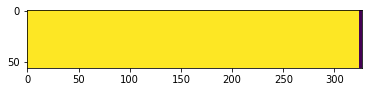

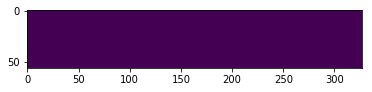

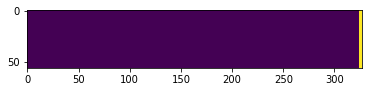

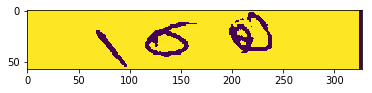

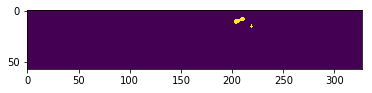

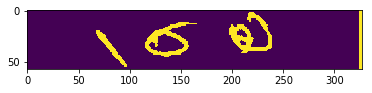

81816


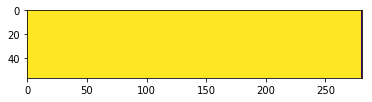

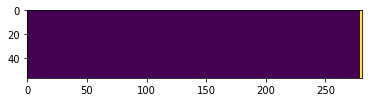

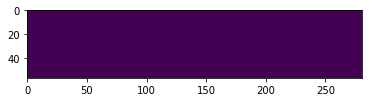

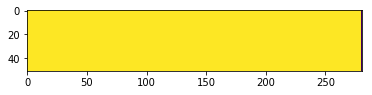

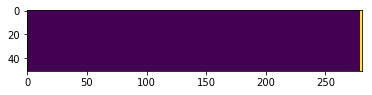

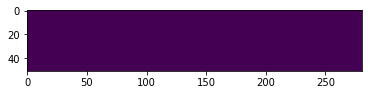

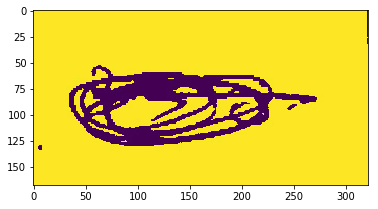

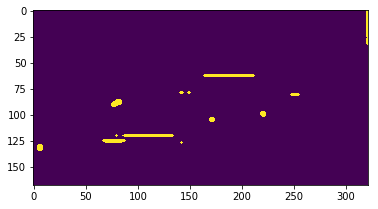

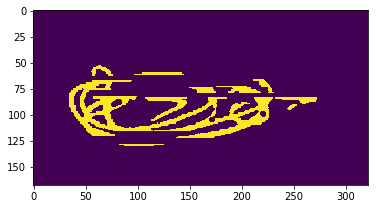

4


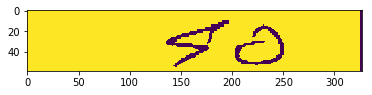

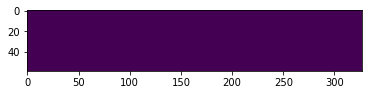

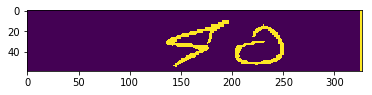

64


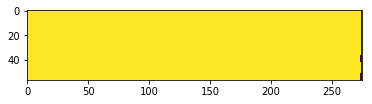

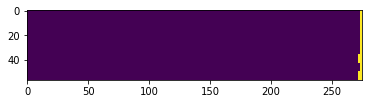

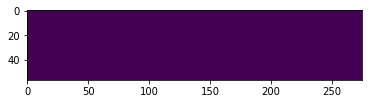

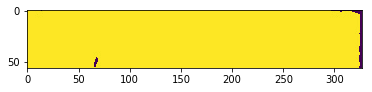

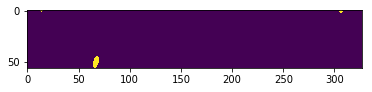

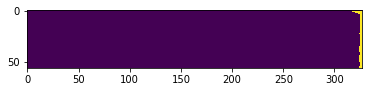

19


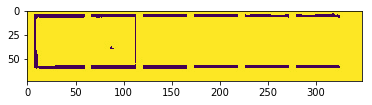

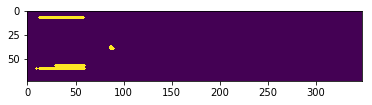

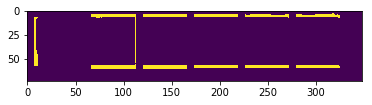

19


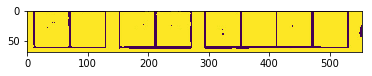

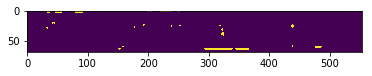

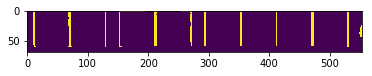

9989989989


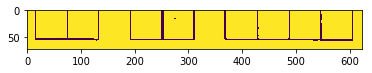

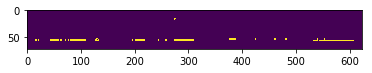

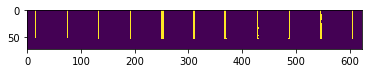

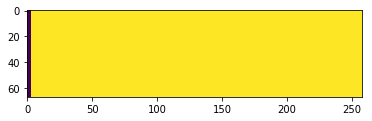

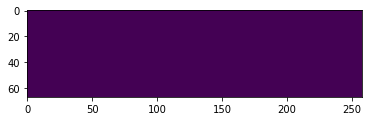

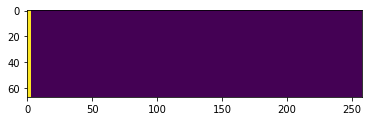

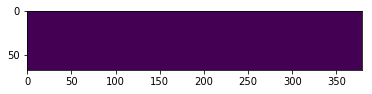

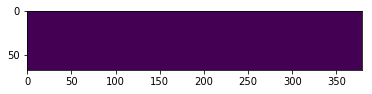

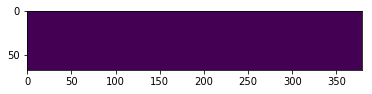

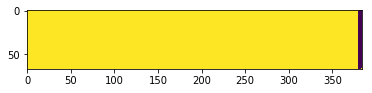

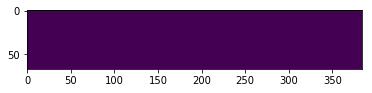

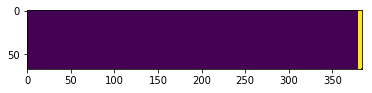

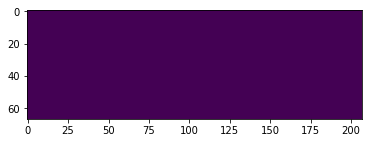

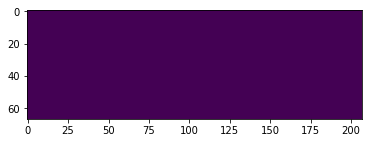

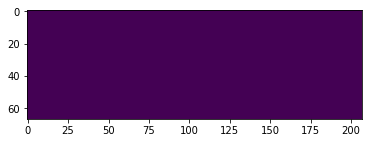

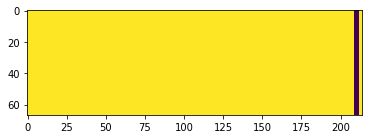

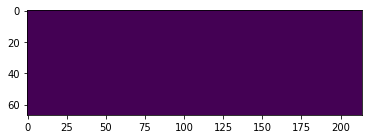

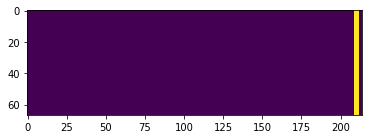

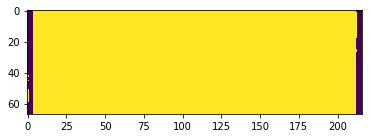

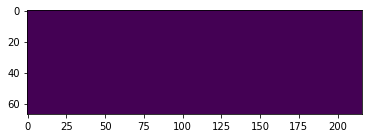

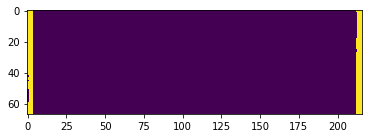

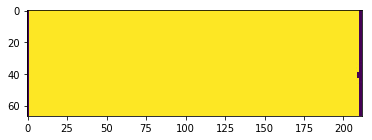

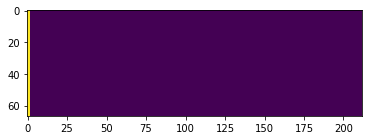

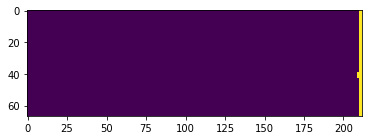

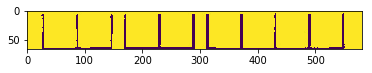

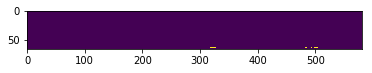

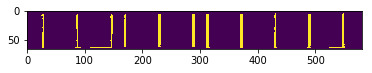

892089119889


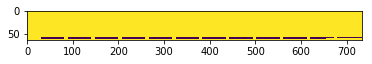

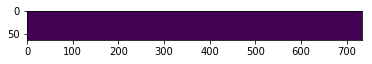

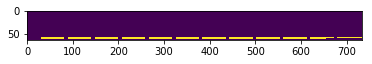

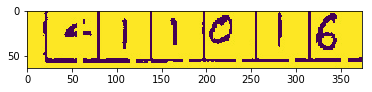

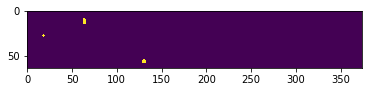

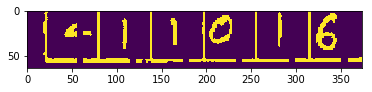

111114116


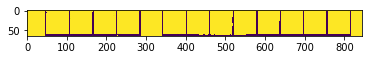

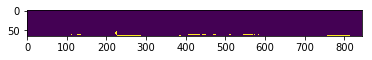

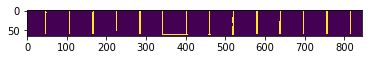

898891188891199


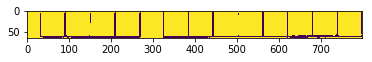

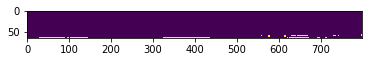

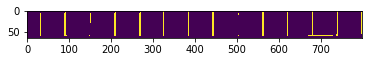

88111188889181111


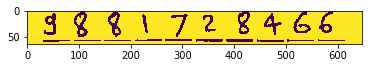

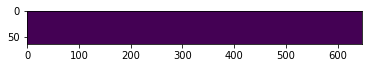

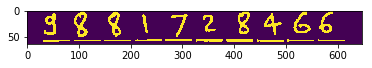

61616819256166


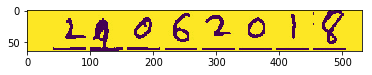

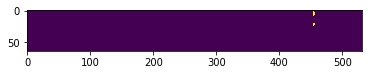

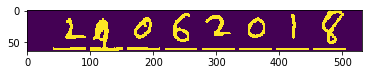

110146251411


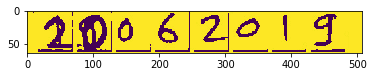

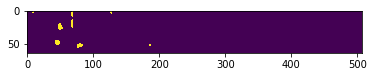

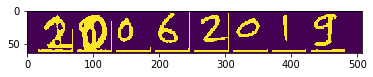

0161411251486


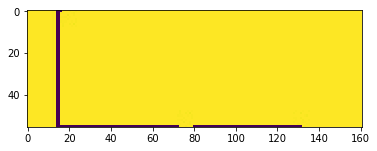

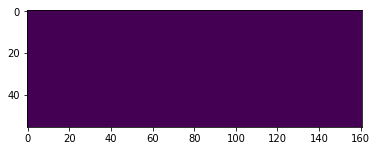

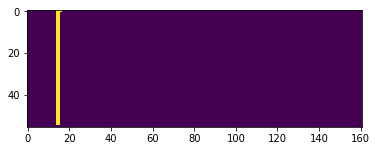

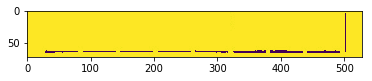

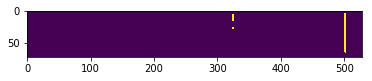

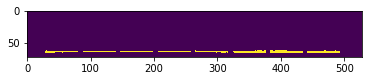

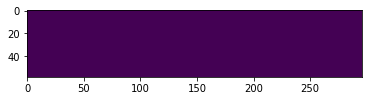

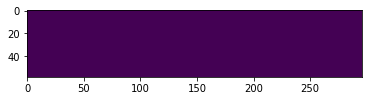

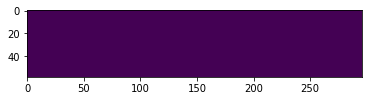

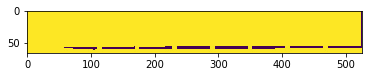

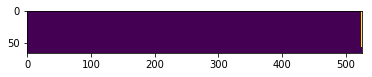

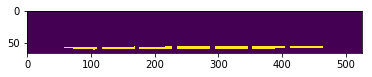

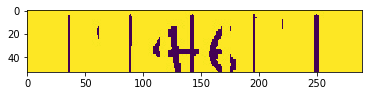

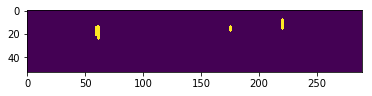

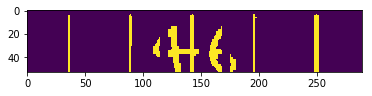

877798


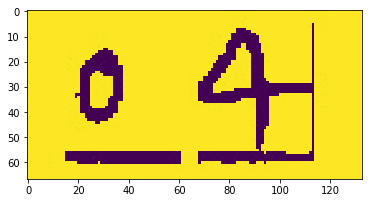

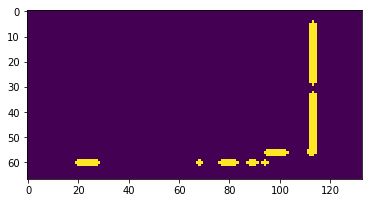

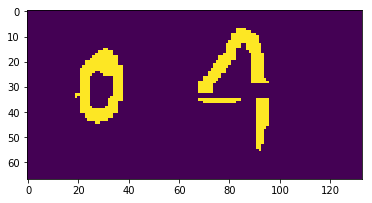

14


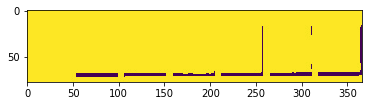

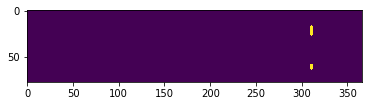

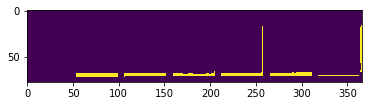

11


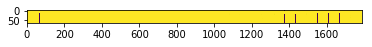

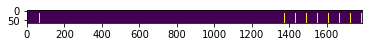

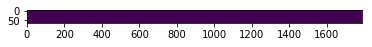

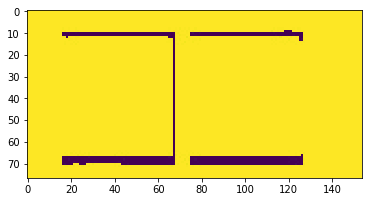

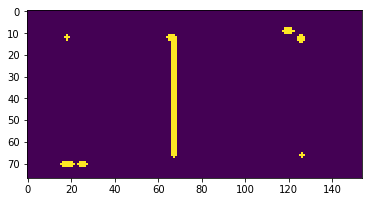

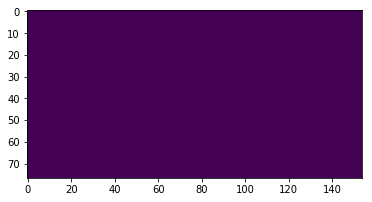

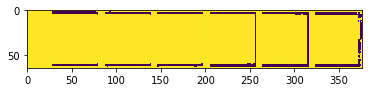

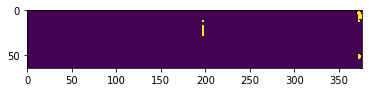

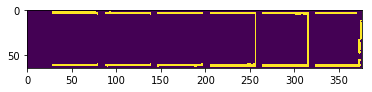

1188


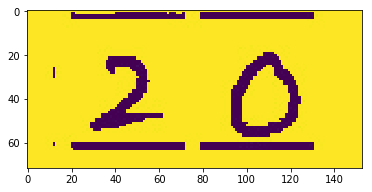

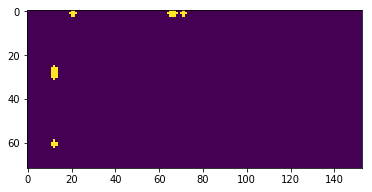

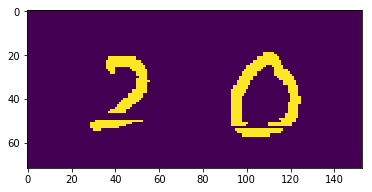

14


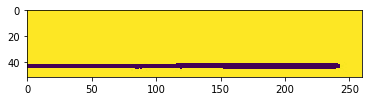

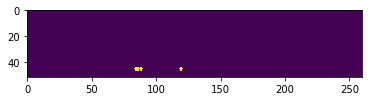

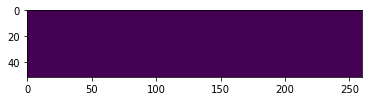

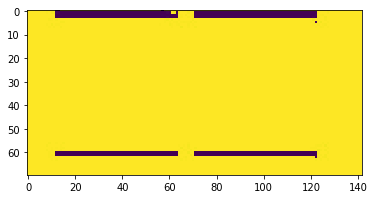

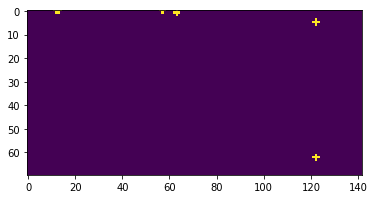

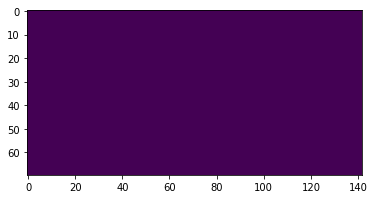

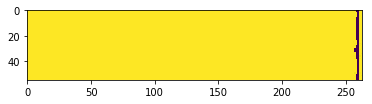

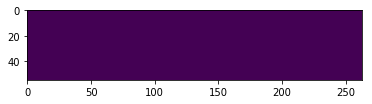

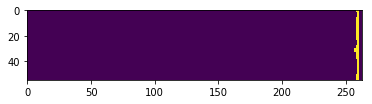

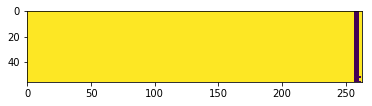

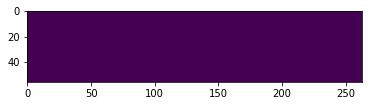

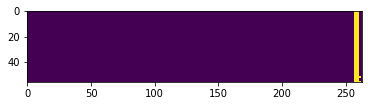

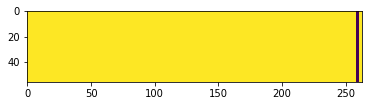

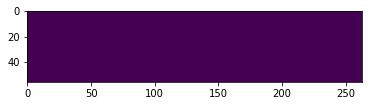

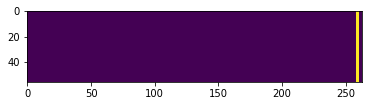

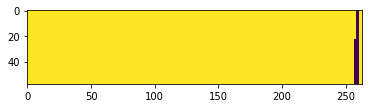

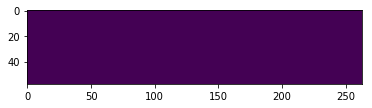

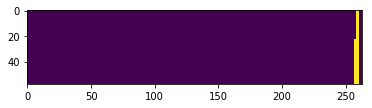

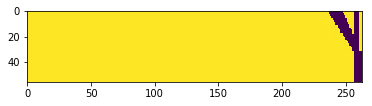

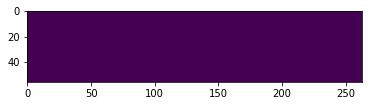

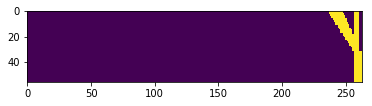

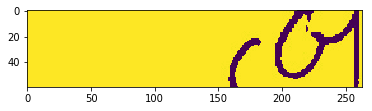

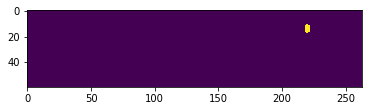

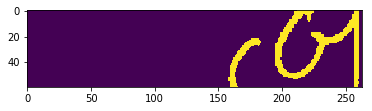

2


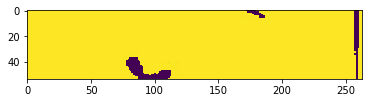

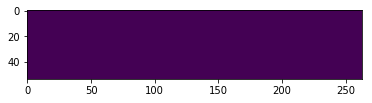

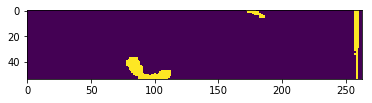

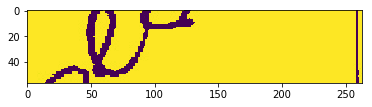

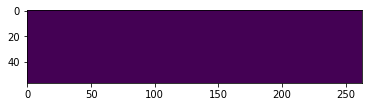

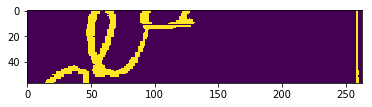

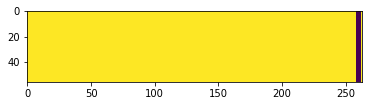

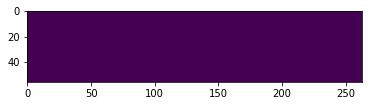

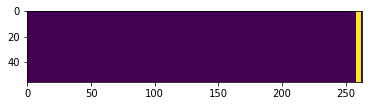

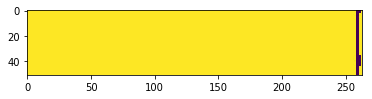

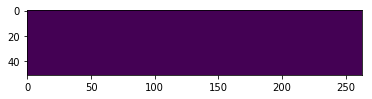

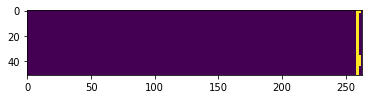

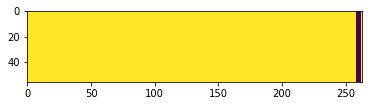

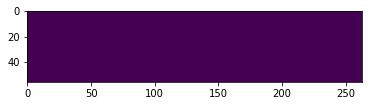

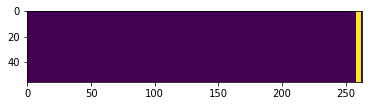

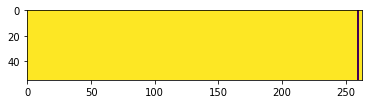

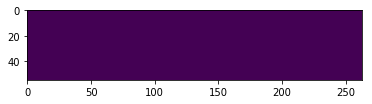

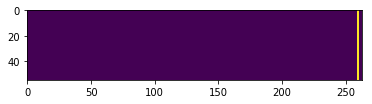

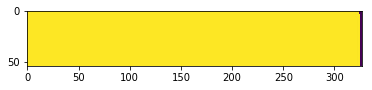

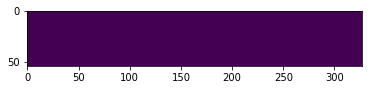

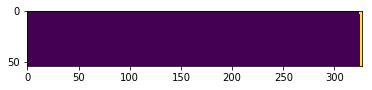

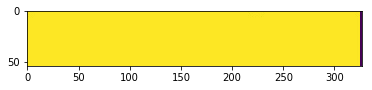

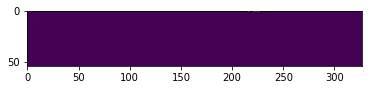

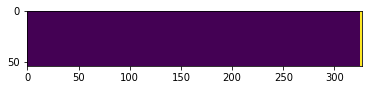

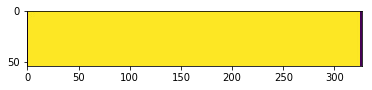

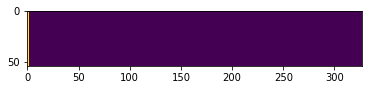

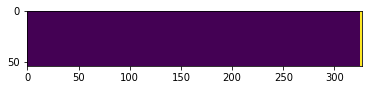

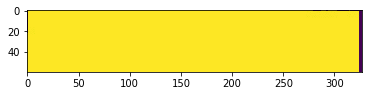

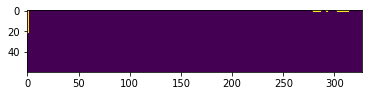

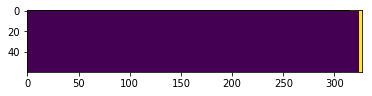

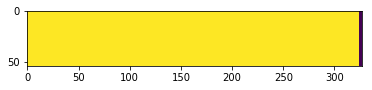

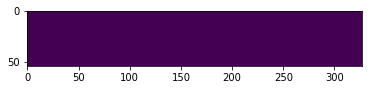

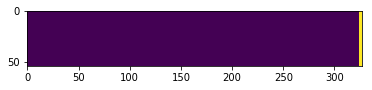

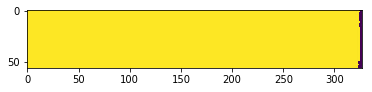

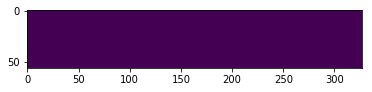

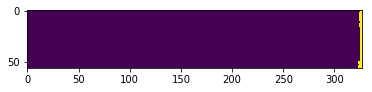

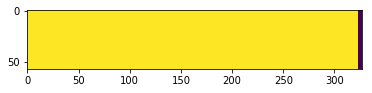

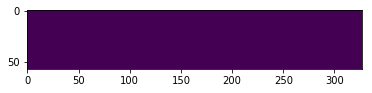

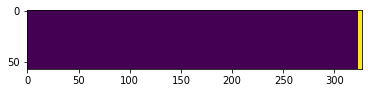

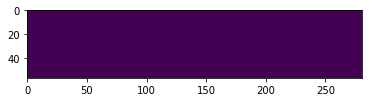

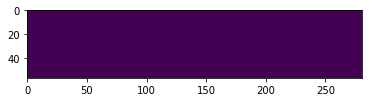

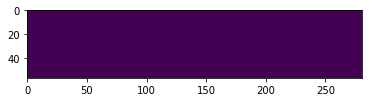

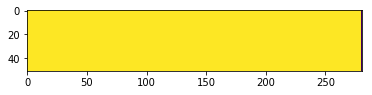

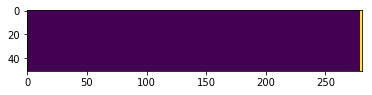

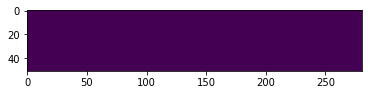

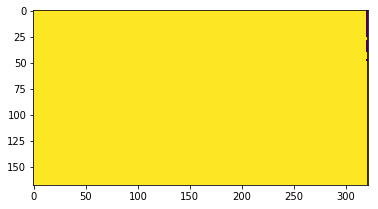

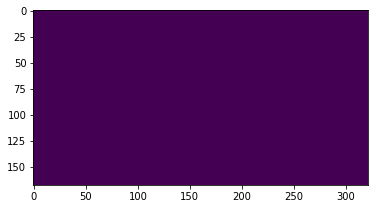

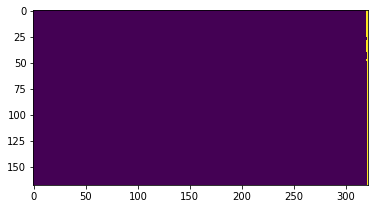

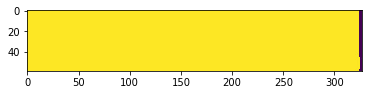

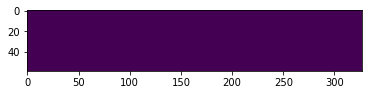

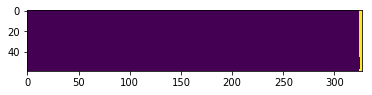

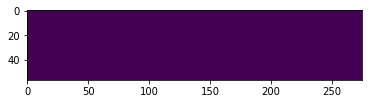

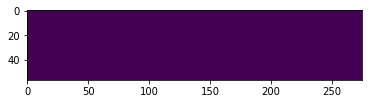

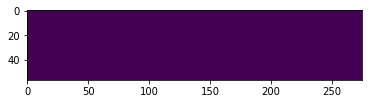

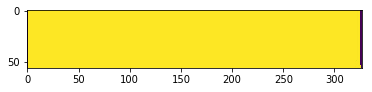

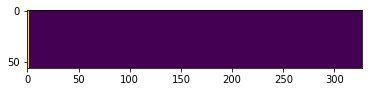

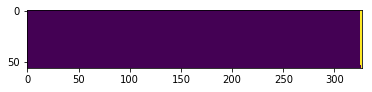

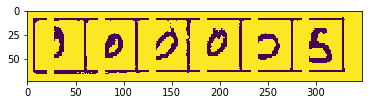

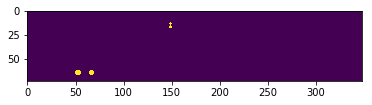

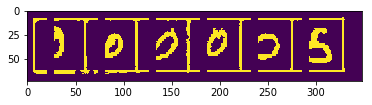

68414614499184


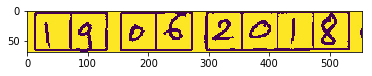

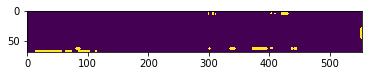

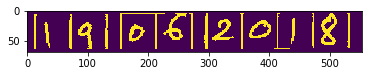

20169414691252214201111620


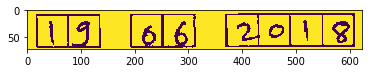

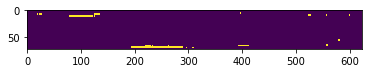

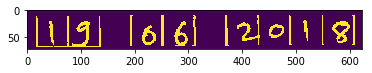

208614221205252082066


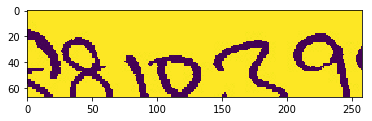

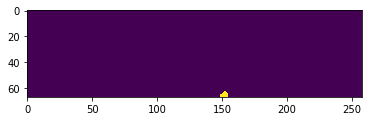

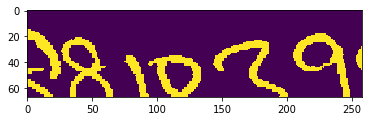

624142516


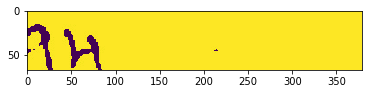

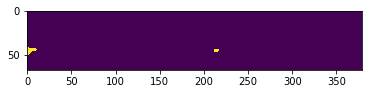

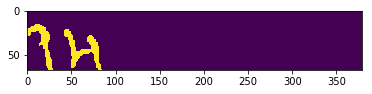

7


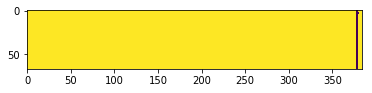

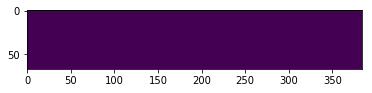

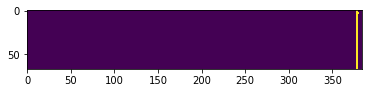

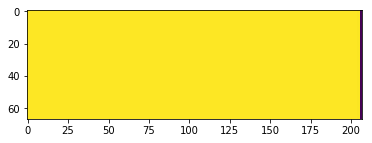

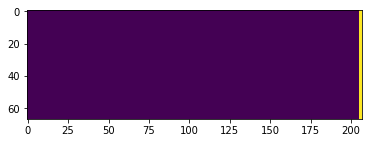

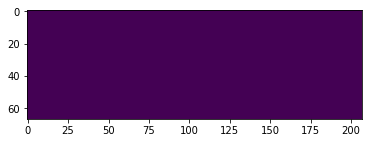

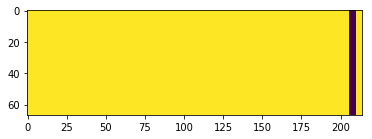

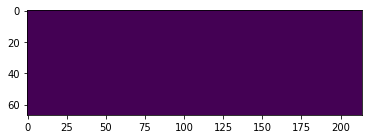

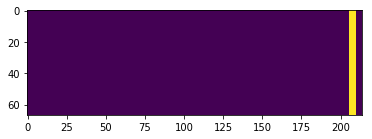

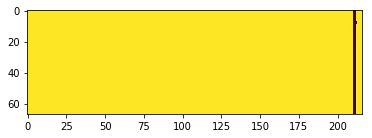

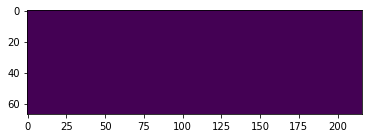

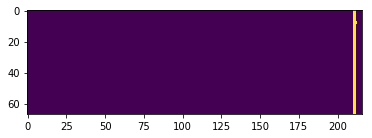

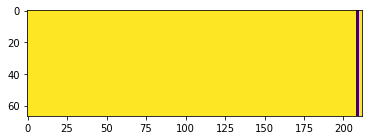

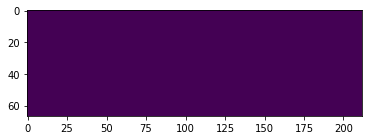

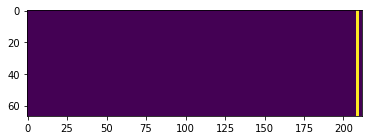

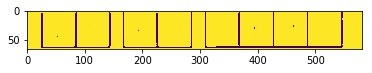

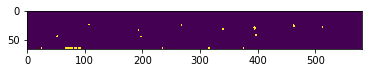

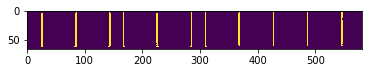

882299111999


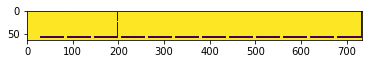

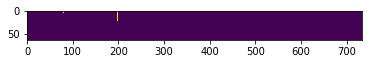

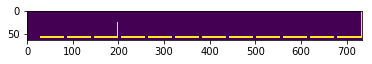

1111


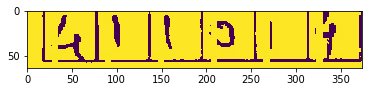

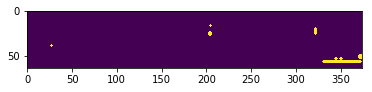

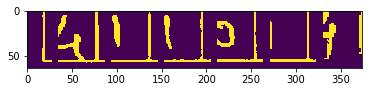

11116824


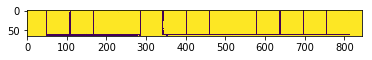

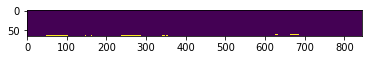

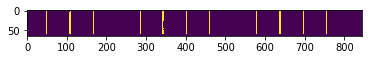

8898811989391111


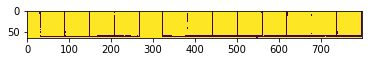

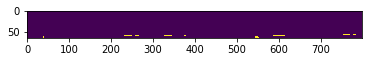

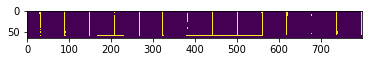

8998


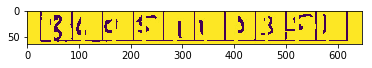

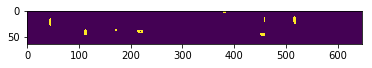

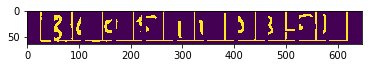

1081189922


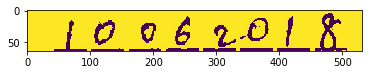

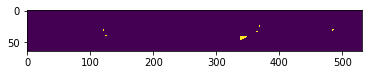

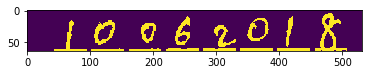

81414625141116


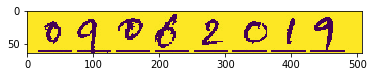

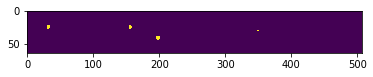

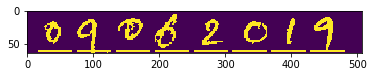

1461662514116


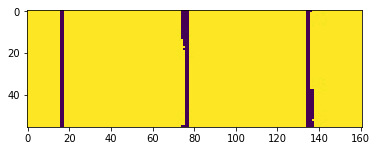

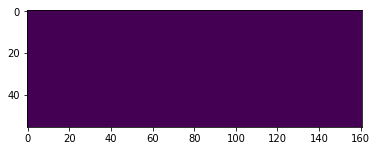

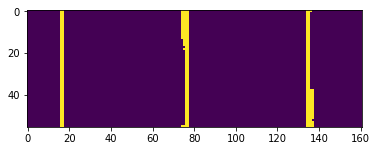

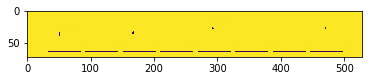

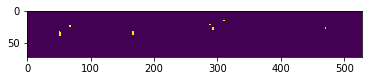

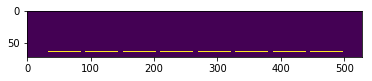

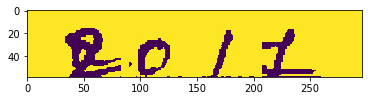

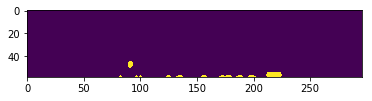

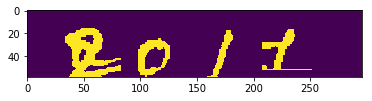

414816


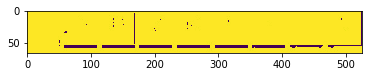

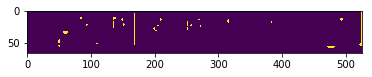

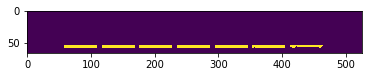

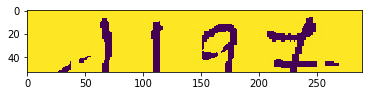

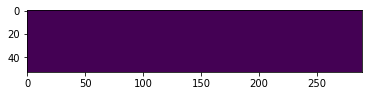

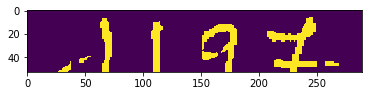

9868


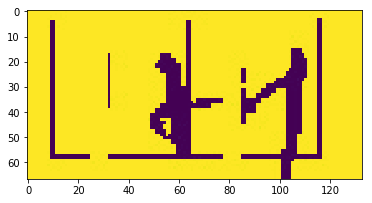

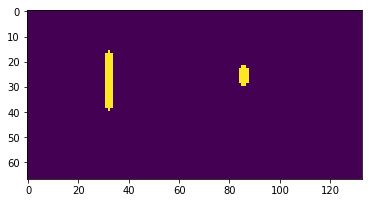

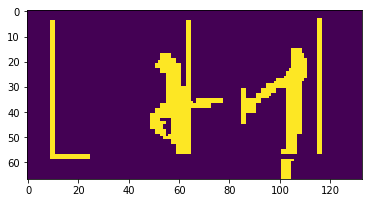

1324


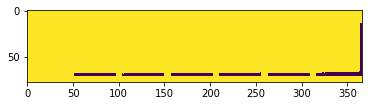

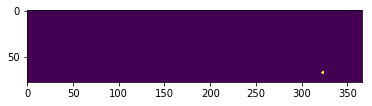

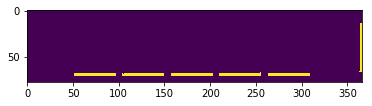

11


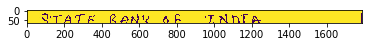

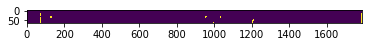

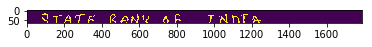

21901951701311111519131350


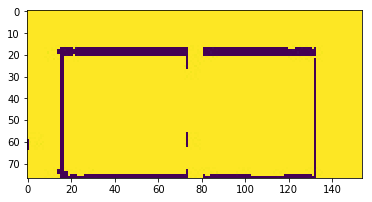

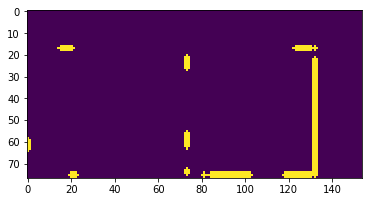

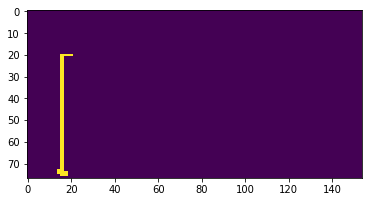

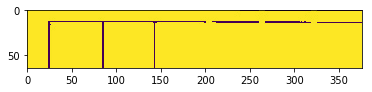

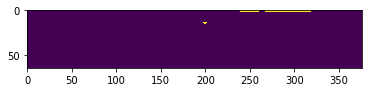

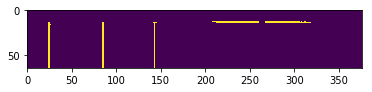

88


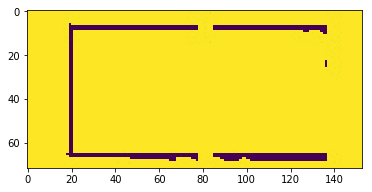

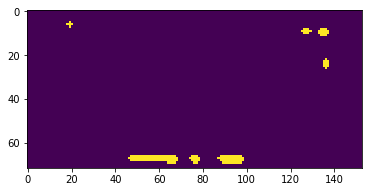

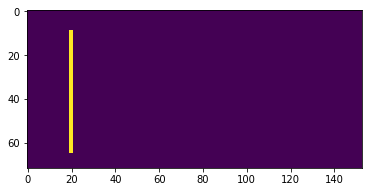

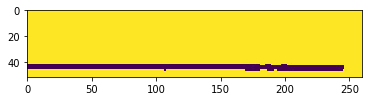

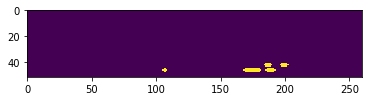

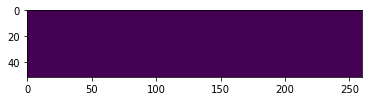

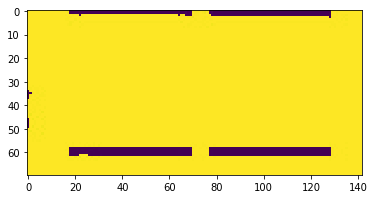

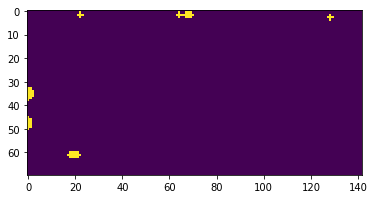

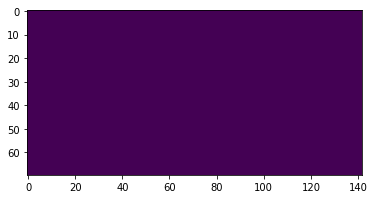

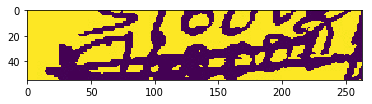

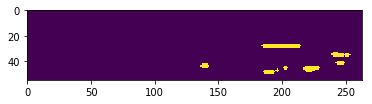

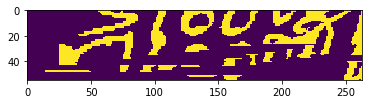

16


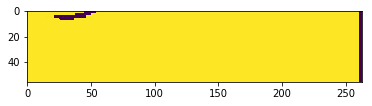

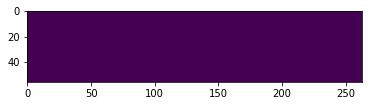

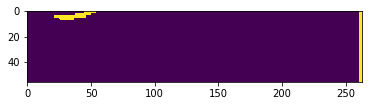

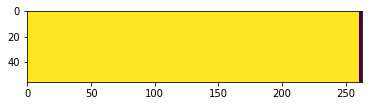

KeyboardInterrupt: 

In [640]:
for image_path in glob.glob(os.path.join('/home/Sandeep/','*/*/*/*.jpg')):
    fname=image_path.split('/')[4].split('.')[0]
    #print(fname)
    bname=image_path.split('/')[5].split('.')[0]
    #print(bname)
    if  bname=='Numeric':
        print(numeric_extraction(image_path, dico, model_char))

In [164]:
def ones_padding(x):
    y=np.ones([32,32])
    y[2:30,2:30]=x
    return(y)

In [274]:
def character_extraction(character_file, dico, model_char):
    im = cv2.imread(character_file,0)
    if im is not None:
        im1=im.copy()
        ref = cv2.threshold(im1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        mask = np.zeros_like(ref)
        w = ref.shape[1]
        shp = round(w * 0.15)

        if shp % 2 == 0:
            
            shp = shp + 1

        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        er = cv2.erode(ref, kr, 1)
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        dl = cv2.dilate(er, kr, 1)
        OriImg2 = im.copy()
        img = dl
        OrimgCopy = dl
        added= cv2.add(cv2.bitwise_not(ref), dl)
        #Image.fromarray(added)

        (_, cnts, _) = cv2.findContours(cv2.bitwise_not(added).copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        cnts1 = [c for c in cnts if cv2.contourArea(c) < round(w*0.1)]    
        for c in cnts1:
            cv2.drawContours(mask, [c], -1, 255, 2)

        img_output = cv2.bitwise_not(cv2.add(added, mask))
        #img_output = np.apply_along_axis(check, 0, img_output)

#         plt.imshow(cv2.bitwise_not(cv2.add(added, mask)))
#         plt.show()

        ####### Try grid removal logic here ######
#         if num[2] == 'Y':
# #             print("it has grids")
#             out_image_char = grid_removal(img_output.copy())
#         else:
# #             print("it does not have grids")
#             out_image_char = img_output
            
# #         print("YEEEEE")
#         plt.imshow(out_image_char)
#         plt.show()
        
        img,ctrs,hier = cv2.findContours(img_output.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        areas = [cv2.contourArea(ctr) for ctr in ctrs]
        mean = np.mean(areas)
        x = 0
        i = []
        cv2.imwrite('/home/New folder/image.jpg',img)
        for area in areas:
            if area < (0.50 * mean):
                i.extend([x])
                x=x+1
            else:
                x=x+1
        rects = [cv2.boundingRect(ctr) for ctr in ctrs]
#         print("rects", rects)
        rect2 = np.array(rects, 'int')
#         print("rect2", rect2.shape)
        col = 0
        try:
            rect2 = rect2[np.argsort(rect2[:,col])]
        except IndexError:
            rect2 = rects
        li = []
        s=""
#         plt.imshow(rect2)
#         plt.show()
        O_copy = OriImg2.copy()
        d={}
        cnt = 0
        cv2.imwrite('/home/New folder/image1.jpg',O_copy)
        for j,rect in enumerate(rect2):
            newImg = cv2.rectangle(O_copy, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
            newImg2 = cv2.bitwise_not(newImg) 
            plt.imshow(newImg);plt.show()
            leng = int(rect[3] * 1.05)
            pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
            pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
            roi = OriImg2[pt1:pt1+leng, pt2:pt2+leng]
            plt.imshow(roi)
            plt.show()
            a_str=''
            if roi.shape[0] >= 24 and roi.shape[1] >= 24:
                roi = cv2.resize(roi, (28, 28), cv2.INTER_AREA)
#                 plt.imshow(roi)
#                 plt.show()
                ret1, im_th1 = cv2.threshold(roi, 190, 255, cv2.THRESH_BINARY)
                img = im_th1.astype('float32')
                img = resize(img, (28,28), order=1, preserve_range=True)
                img = img/255
                img = resize(ones_padding(img), (28,28), order=1, preserve_range=True)
                img = img.reshape((1,28,28,1))

                a_str = model_char.predict_classes(img)
#                 print(a_str[0])
                a_str = string.ascii_uppercase[a_str[0]]
                print(a_str)
                d[cnt] = rect[0]
                cnt=cnt+1
#             print('d', d)
            s += str(a_str)
        x = list(d.values())
        if (len(x)>=3):
            y=[x[i+1]-x[i] for i in range(len(x)-1)]
            s1 = s[0:(np.argmax(y)+1)]+' '+s[(np.argmax(y)+1):]    
        else:
            s1 = s
        return s1

In [661]:
def alphanumeric_extraction(character_file, dico, model_alphanum):
    im = cv2.imread(character_file,0)
    if im is not None:
        im1=im.copy()
        plt.imshow(im1)
        plt.show()
        ref = cv2.threshold(im1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        mask = np.zeros_like(ref)
#         plt.imshow(mask)
#         plt.show()
        w = ref.shape[1]
        shp = round(w * 0.15)
        if shp % 2 == 0:
            shp = shp + 1
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        er = cv2.erode(ref, kr, 1)
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        dl = cv2.dilate(er, kr, 1)
        OriImg2 = im.copy()
        img = dl
        OrimgCopy = dl
        added= cv2.add(cv2.bitwise_not(ref), dl)
#         plt.imshow(added)
#         plt.show()
        (_, cnts, _) = cv2.findContours(cv2.bitwise_not(added).copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts1 = [c for c in cnts if cv2.contourArea(c) < round(w*0.05)]    
        for c in cnts1:
            cv2.drawContours(mask, [c], -1, 255, 2)
        plt.imshow(mask)
        plt.show()
        img_output = cv2.bitwise_not(cv2.add(added,mask))
        plt.imshow(img_output)
        plt.show()
        img,ctrs,hier = cv2.findContours(img_output.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         areas = [cv2.contourArea(ctr) for ctr in ctrs]
#         mean = np.mean(areas)
#         x = 0
#         i = []
#         cv2.imwrite('/home/New folder/image.jpg',img)
#         for area in areas:
#             if area < (0.50 * mean):
#                 i.extend([x])
#                 x=x+1
#             else:
#                 x=x+1
        rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    #         print("rects", rects)
        rect2 = np.array(rects, 'int')
    #         print("rect2", rect2.shape)
        col = 0
        try:
            rect2 = rect2[np.argsort(rect2[:,col])]
        except IndexError:
            rect2 = rects
        li = []
        s=""
        O_copy = OriImg2.copy()
        d={}
        cnt = 0
        #cv2.imwrite('/home/New folder/image1.jpg',O_copy)
        for j,rect in enumerate(rect2):
            leng = int(rect[3] * 1.05)
            pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
            pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
            #print(leng,pt1,pt2)
            roi = OriImg2[pt1:pt1+leng, pt2:pt2+leng]
        for j,rect in enumerate(rect2):
            #newImg = cv2.rectangle(O_copy, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
#             newImg2 = cv2.bitwise_not(newImg1) 
            leng = int(rect[3] * 1.05)
            pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
            pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
            roi = OriImg2[pt1:pt1+leng, pt2:pt2+leng]

#             print('ROI')
#             plt.imshow(roi)
#             plt.show()
            a_str=''
            if roi.shape[0] >= 28 and roi.shape[1] >= 28:
                
#                 roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                roi = cv2.resize(roi,(28,28))
                roi = np.array(roi)
                roi = roi.astype('float32')
                roi /= 255
                        #print (test_image.shape)
                roi = np.expand_dims(roi, axis=0)
                img = np.expand_dims(roi, axis=0)
                
#                 roi = cv2.resize(roi, (28, 28), cv2.INTER_AREA)

# #                 print('ROI-After Resizing')
# #                 plt.imshow(roi)
# #                 plt.show()
# #                     ret1, im_th1 = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY_INV)
#                 img = im_th1.astype('float32')
#                 img = 255-img
#                 img = img/255
#                 img = img.reshape((1,1,28,28))

                a_str = model_alphanum.predict_classes(img)
                a_str = str(decode_class(a_str))
#                 print(a_str[0])
                #a_str = string.ascii_uppercase[a_str[0]]
            s += str(a_str)
        #print(s, decode_class(s))
        return s

In [177]:
def decode_class(s):
    if s in [i for i in range(10)]:
        return(str(s[0]))
    elif s==10:
        return('A')
    elif s==11:
        return('@')
    elif s==12:
        return('B')
    elif s==13:
        return('C')
    elif s==14:
        return('D')
    elif s==15:
        return('E')
    elif s==16:
        return('F')
    elif s==17:
        return('G')
    elif s==18:
        return('H')
    elif s==19:
        return('I')
    elif s==20:
        return('J')
    elif s==21:
        return('K')
    elif s==22:
        return('L')
    elif s==23:
        return('M')
    elif s==24:
        return('N')
    elif s==25:
        return('O')
    elif s==26:
        return('P')
    elif s==27:
        return('Q')
    elif s==28:
        return('R')
    elif s==29:
        return('Rs.')
    elif s==30:
        return('S')
    elif s==31:
        return('T')
    elif s==32:
        return('U')
    elif s==33:
        return('V')
    elif s==34:
        return('W')
    elif s==35:
        return('X')
    elif s==36:
        return('Y')
    elif s==37:
        return('Z')

In [170]:
json_file = open('/KALpydev/icr_pickle_files/CNN_Model/model_alpha9.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_alphanum = model_from_json(loaded_model_json)
model_alphanum.load_weights("/KALpydev/icr_pickle_files/CNN_Model/model_alpha9.h5")

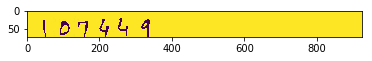

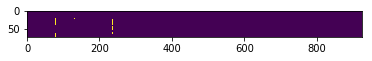

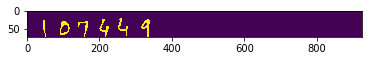

'1O7449'

In [662]:
alphanumeric_extraction('/home/Sandeep/Without_Grid/87609947_WithoutGrid/Alpha Numeric/Chasis Number.jpg', dico, model_alphanum)

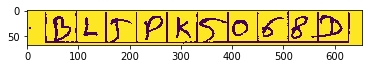

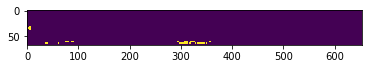

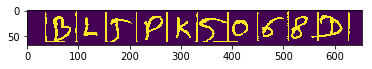

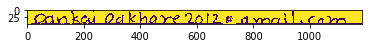

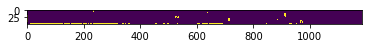

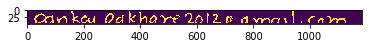

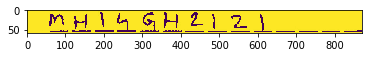

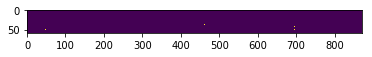

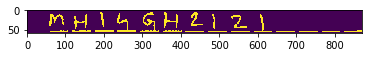

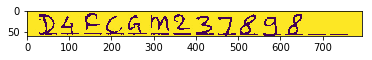

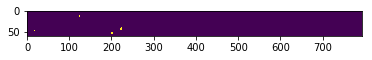

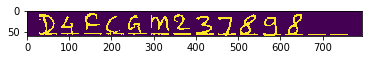

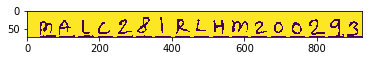

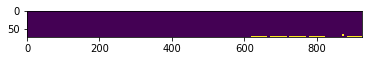

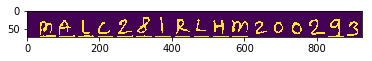

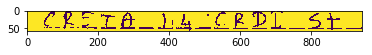

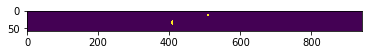

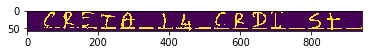

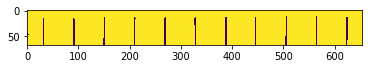

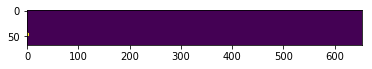

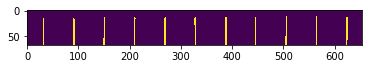

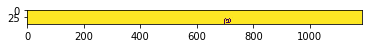

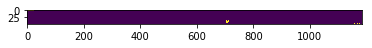

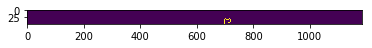

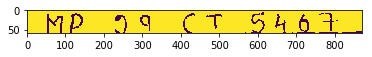

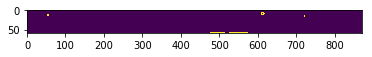

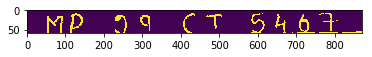

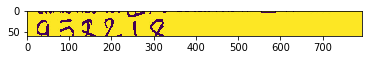

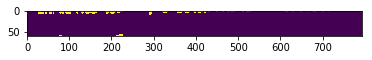

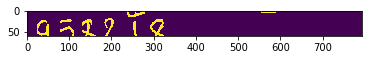

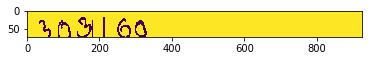

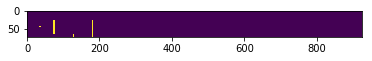

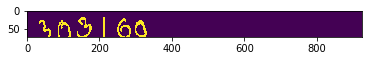

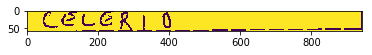

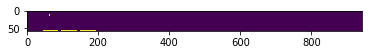

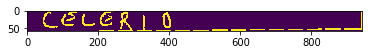

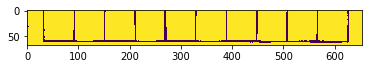

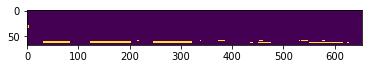

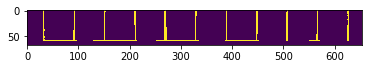

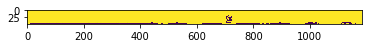

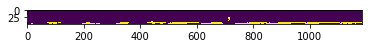

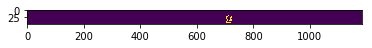

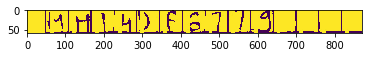

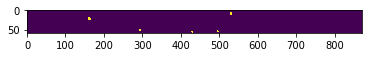

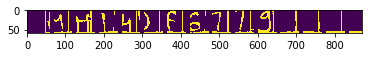

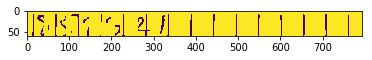

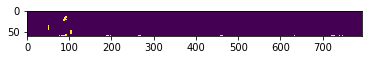

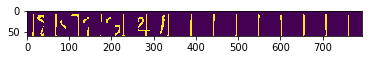

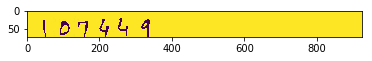

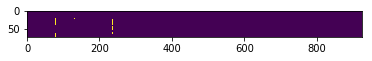

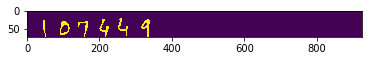

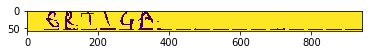

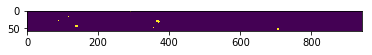

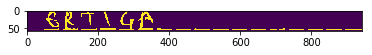

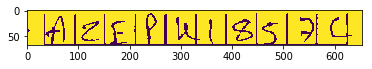

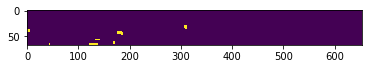

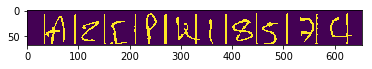

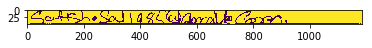

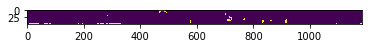

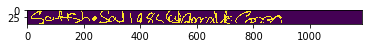

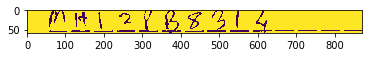

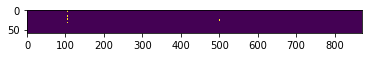

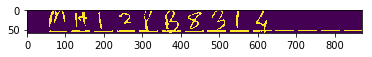

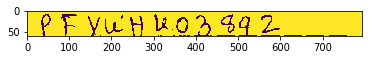

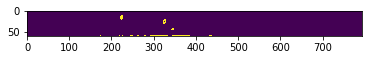

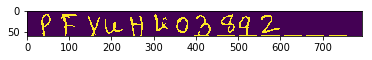

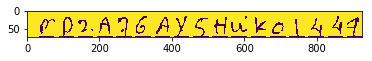

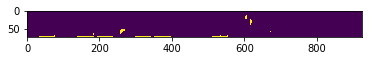

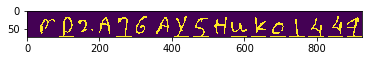

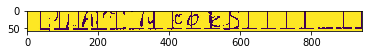

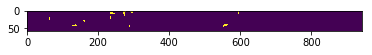

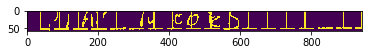

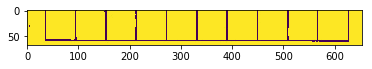

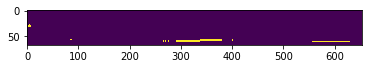

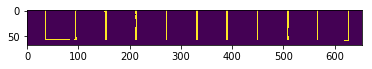

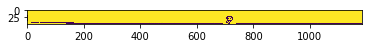

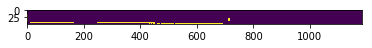

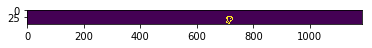

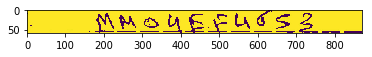

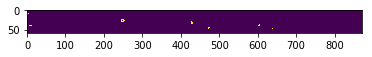

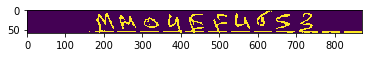

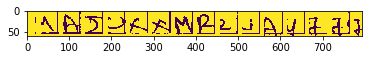

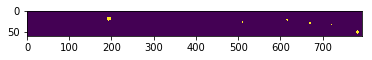

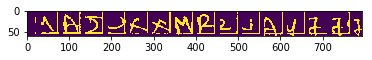

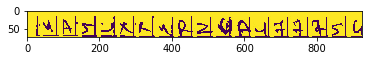

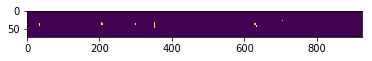

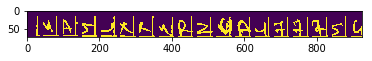

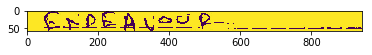

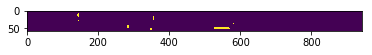

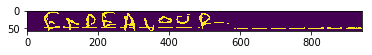

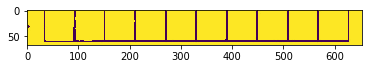

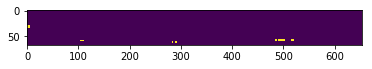

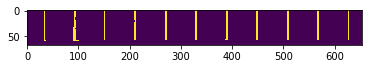

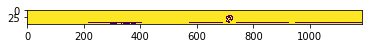

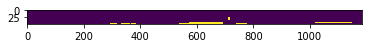

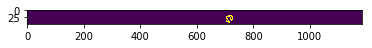

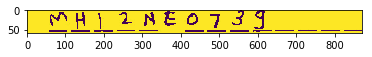

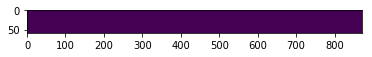

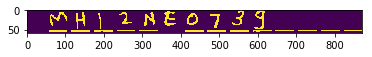

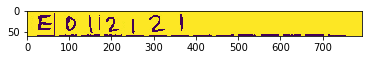

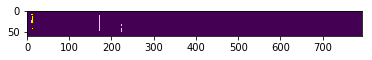

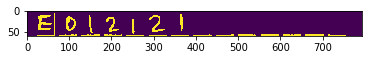

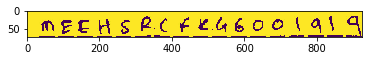

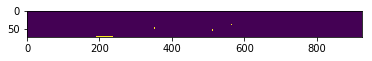

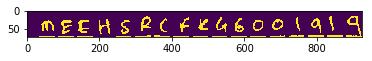

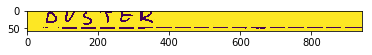

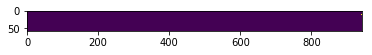

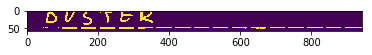

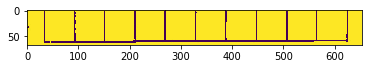

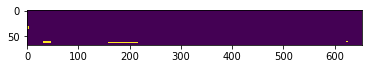

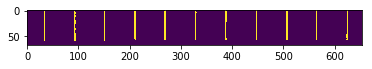

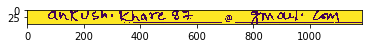

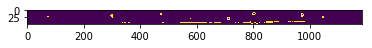

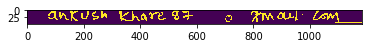

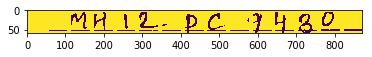

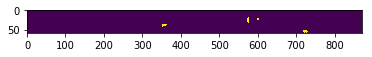

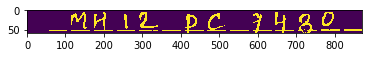

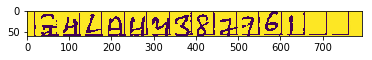

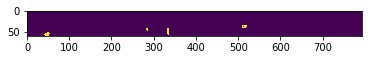

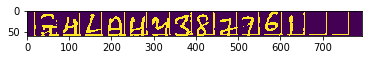

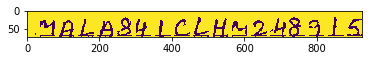

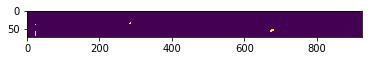

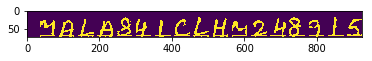

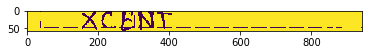

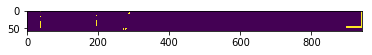

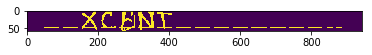

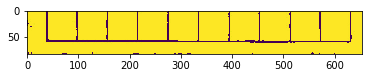

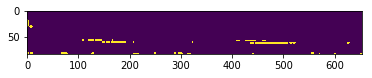

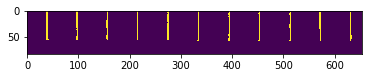

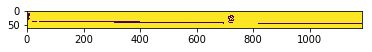

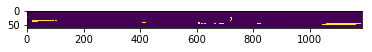

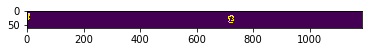

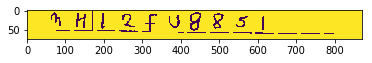

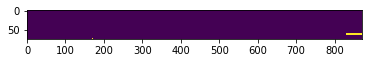

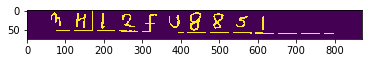

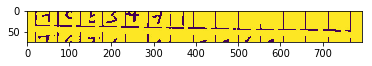

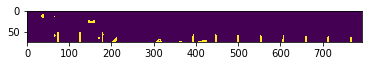

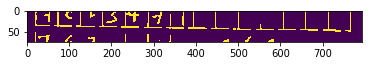

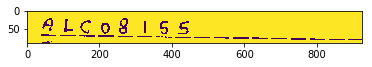

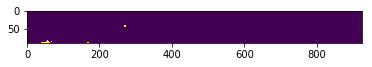

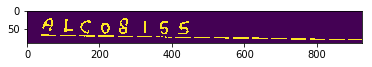

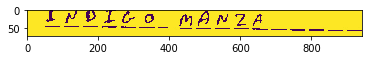

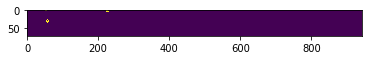

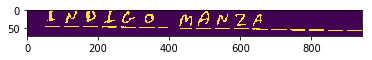

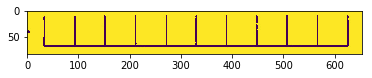

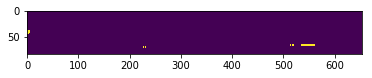

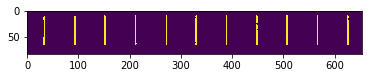

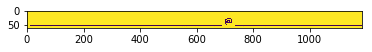

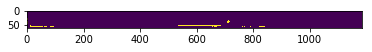

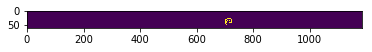

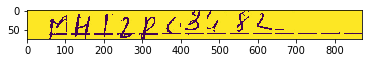

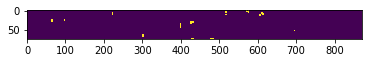

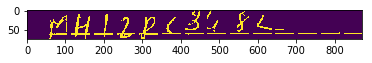

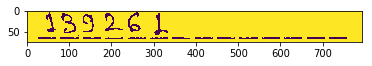

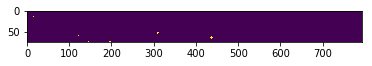

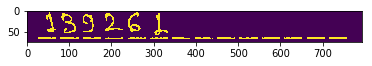

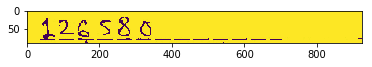

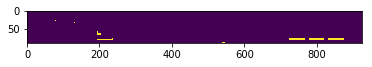

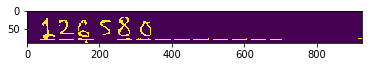

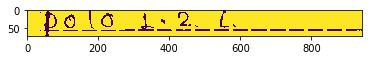

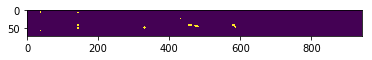

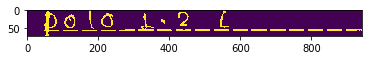

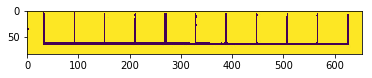

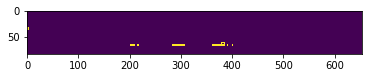

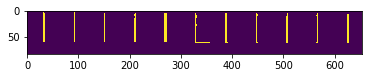

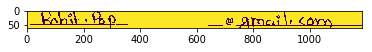

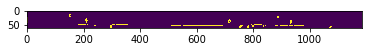

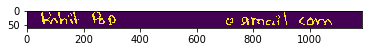

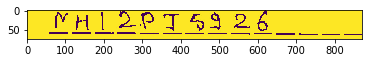

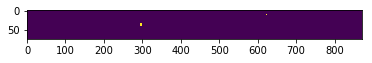

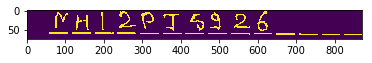

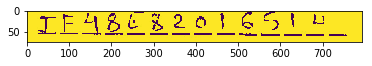

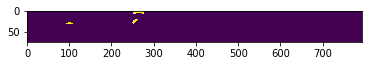

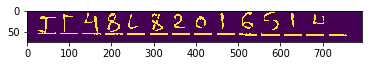

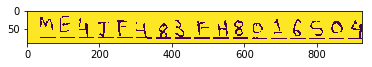

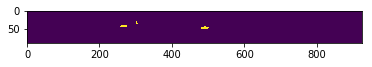

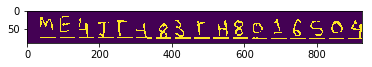

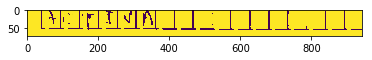

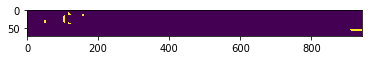

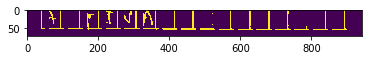

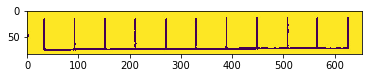

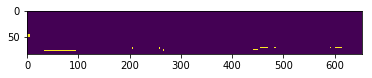

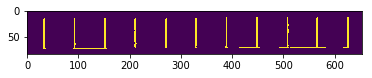

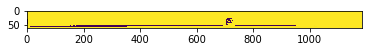

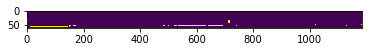

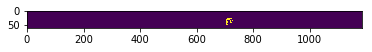

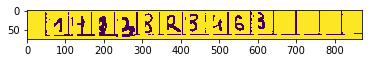

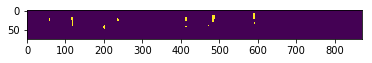

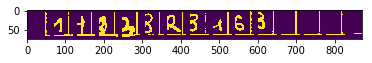

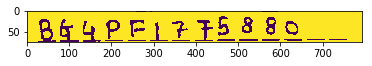

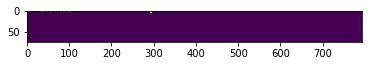

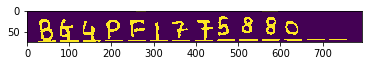

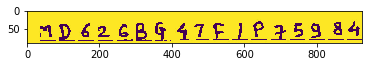

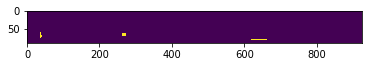

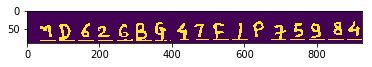

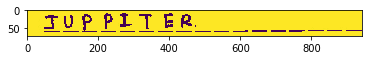

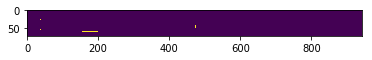

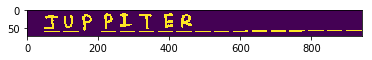

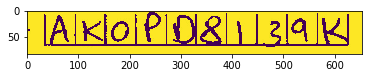

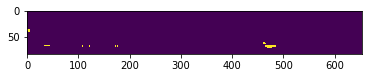

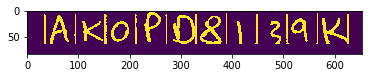

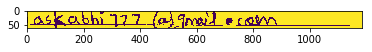

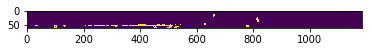

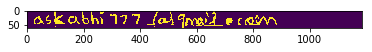

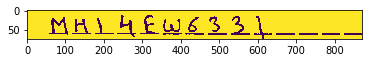

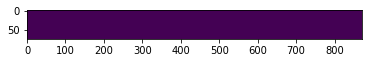

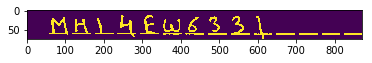

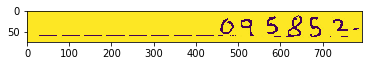

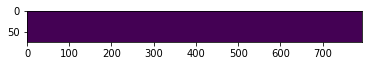

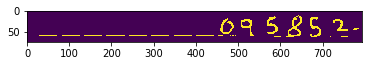

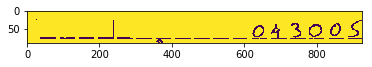

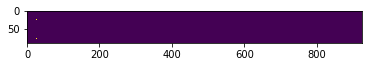

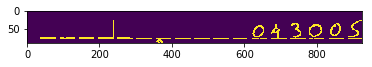

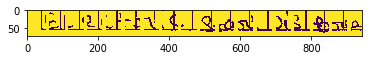

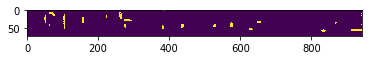

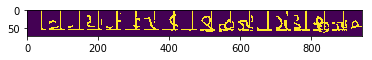

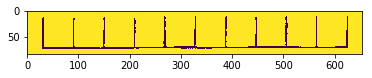

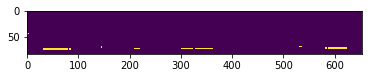

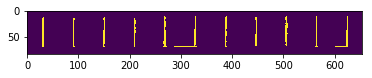

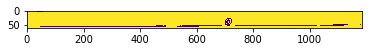

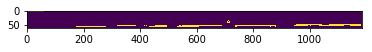

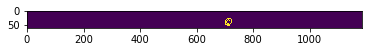

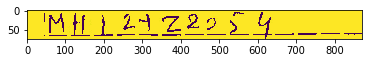

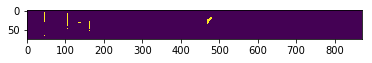

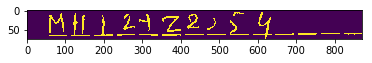

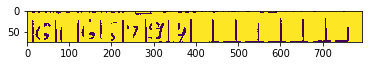

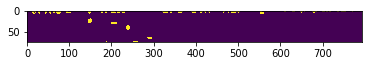

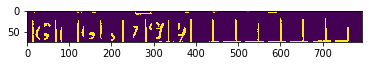

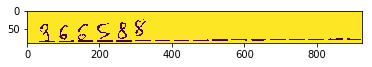

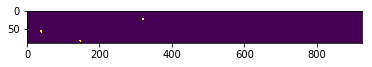

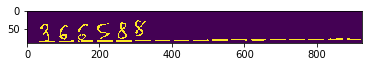

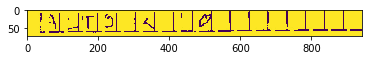

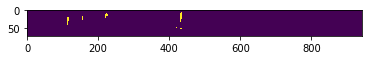

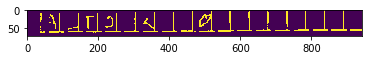

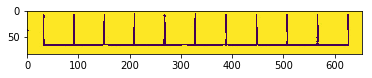

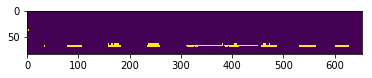

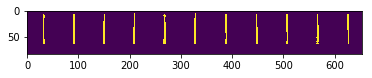

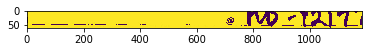

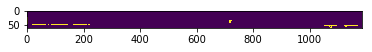

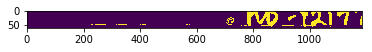

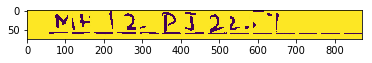

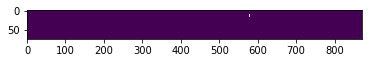

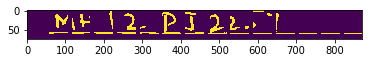

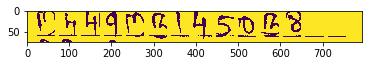

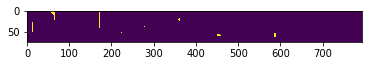

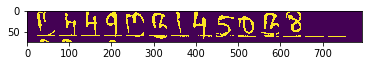

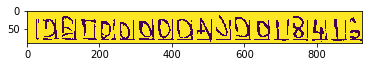

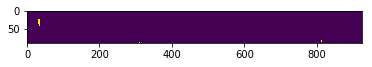

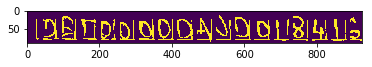

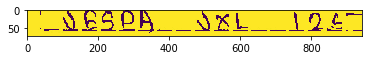

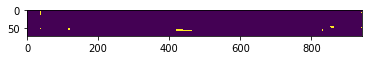

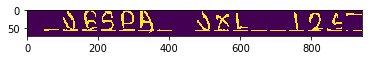

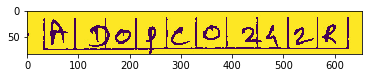

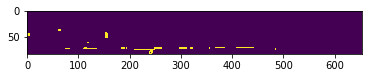

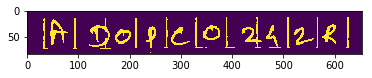

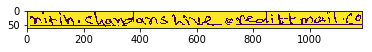

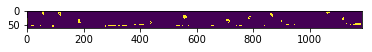

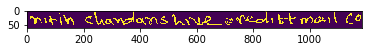

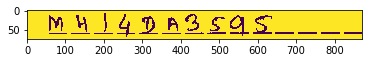

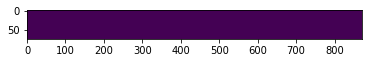

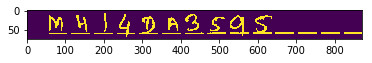

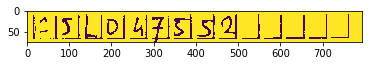

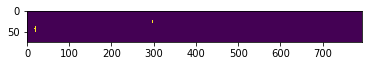

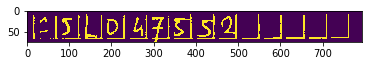

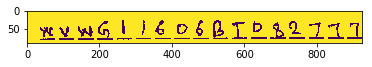

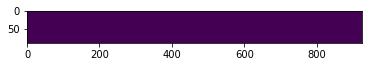

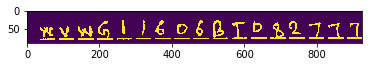

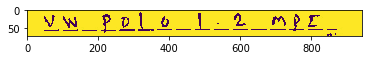

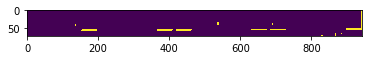

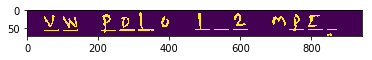

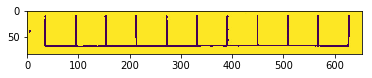

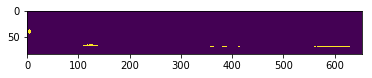

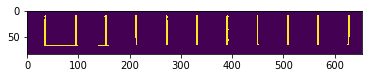

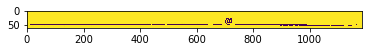

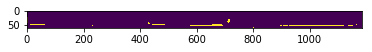

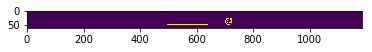

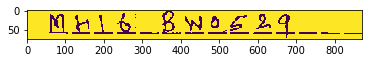

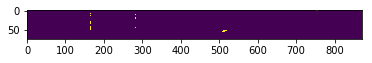

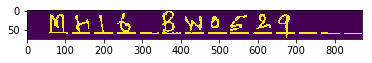

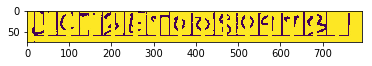

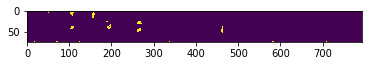

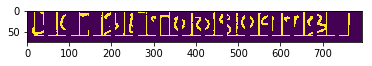

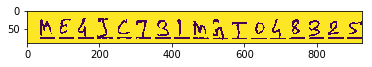

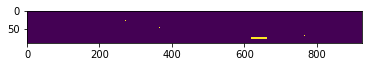

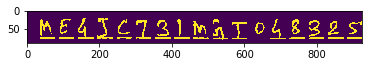

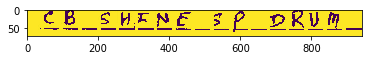

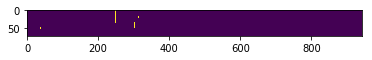

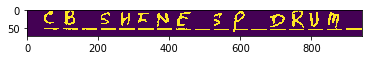

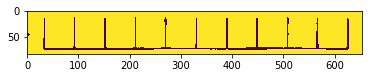

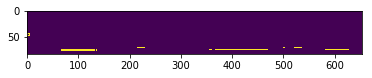

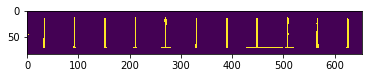

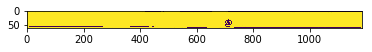

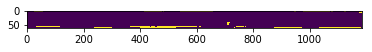

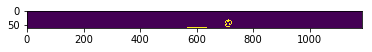

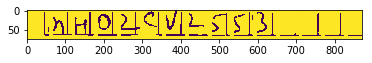

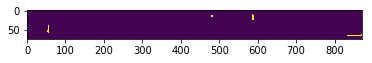

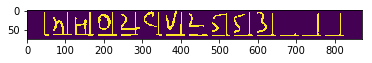

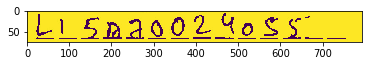

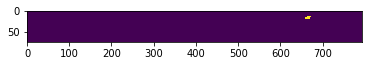

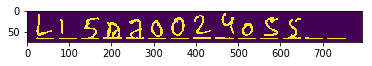

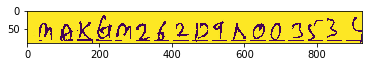

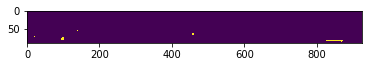

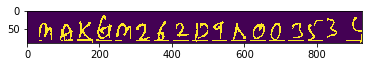

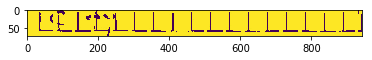

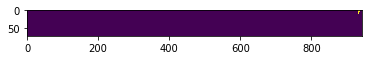

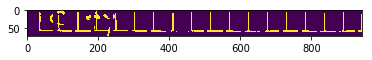

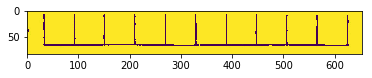

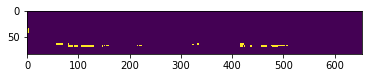

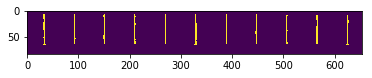

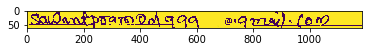

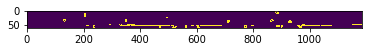

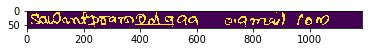

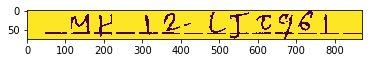

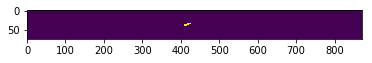

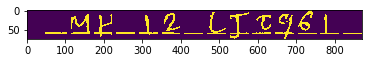

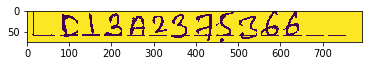

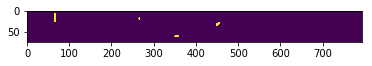

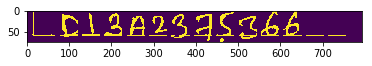

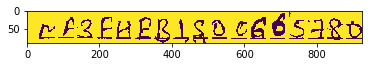

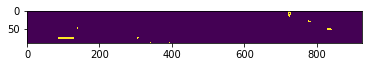

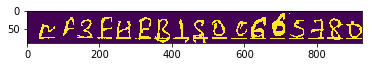

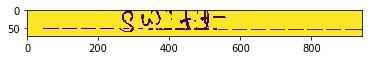

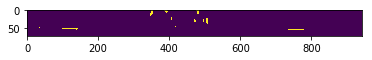

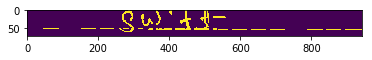

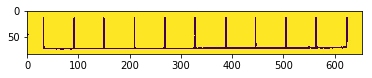

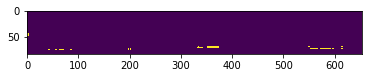

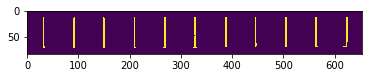

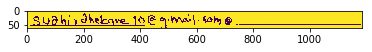

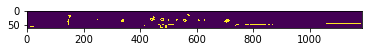

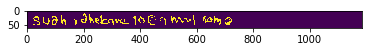

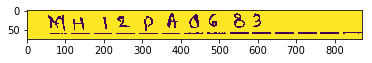

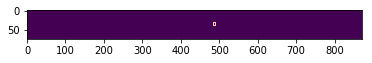

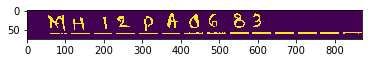

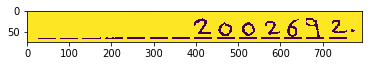

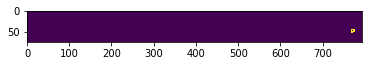

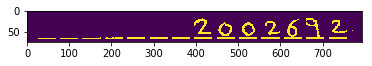

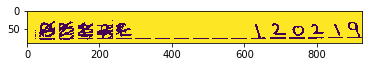

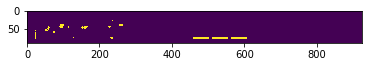

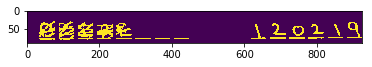

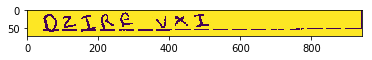

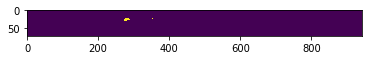

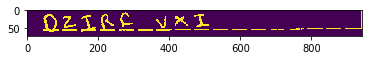

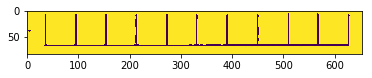

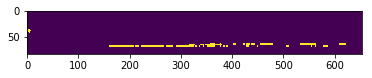

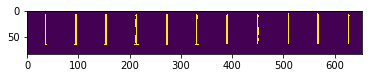

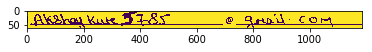

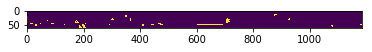

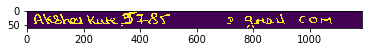

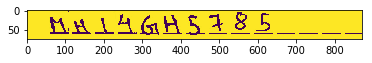

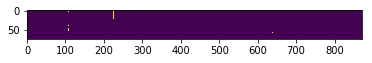

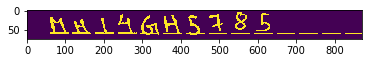

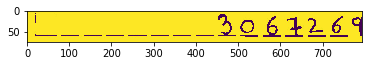

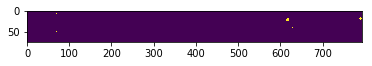

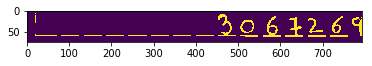

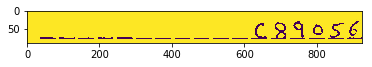

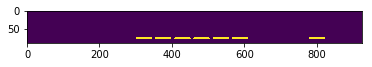

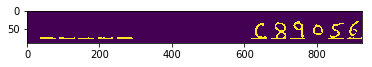

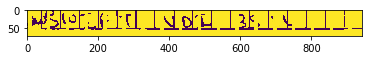

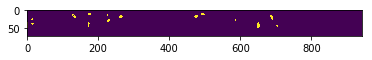

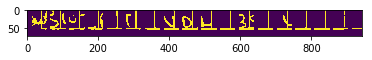

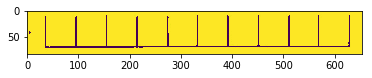

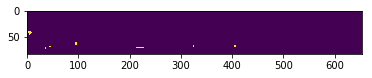

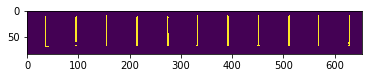

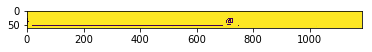

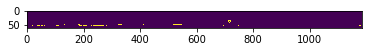

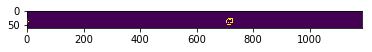

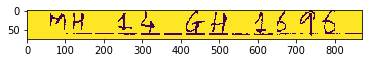

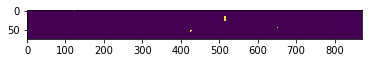

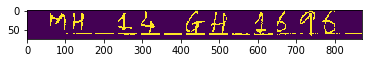

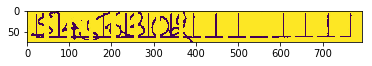

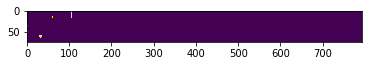

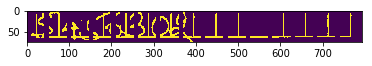

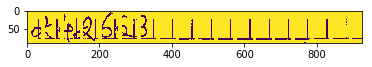

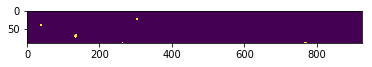

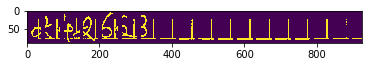

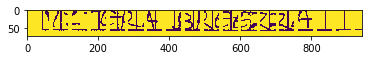

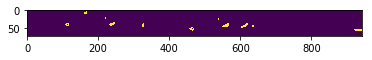

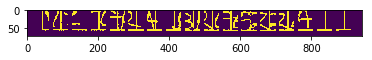

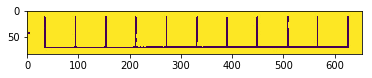

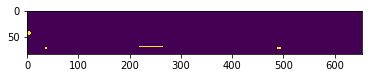

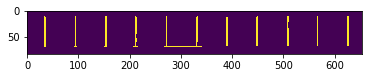

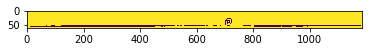

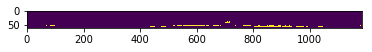

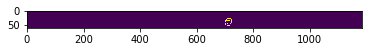

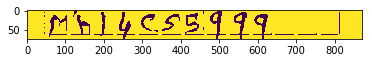

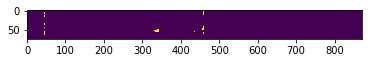

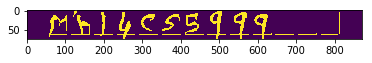

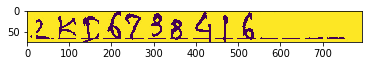

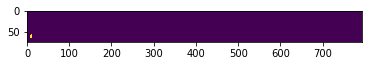

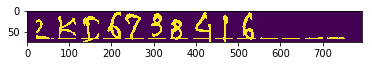

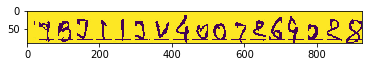

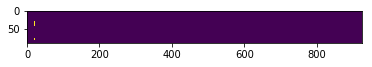

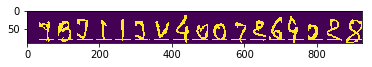

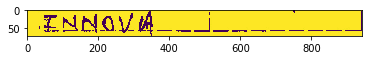

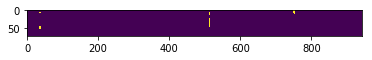

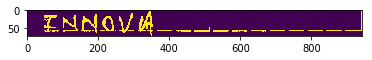

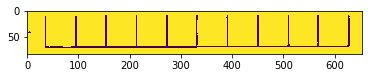

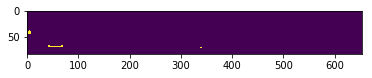

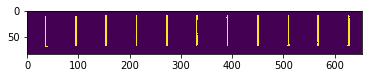

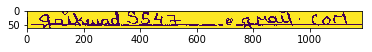

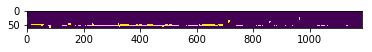

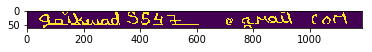

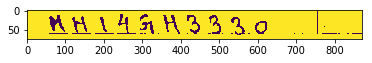

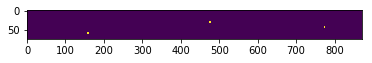

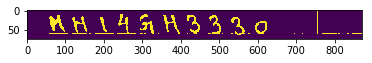

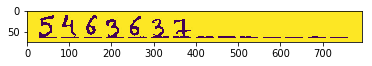

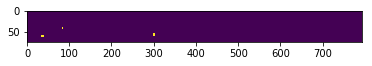

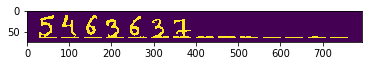

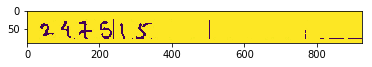

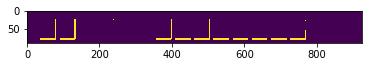

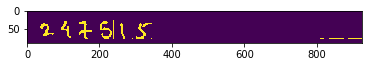

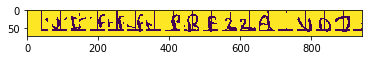

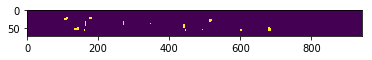

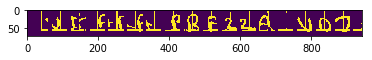

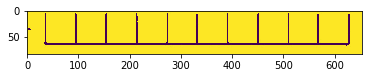

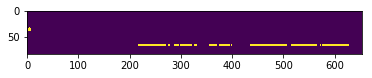

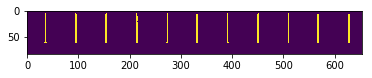

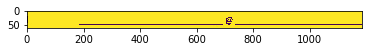

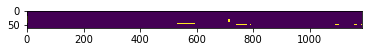

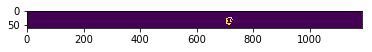

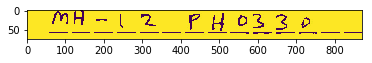

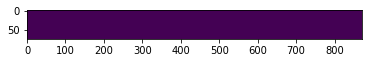

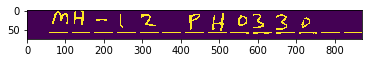

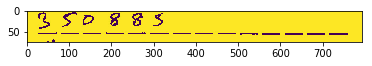

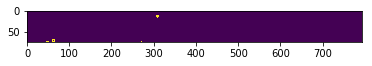

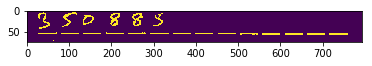

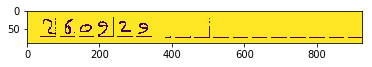

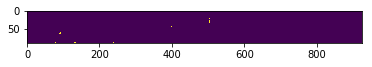

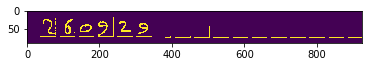

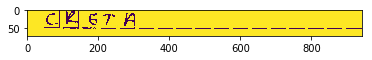

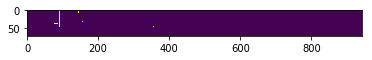

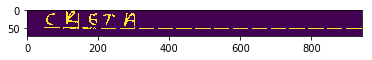

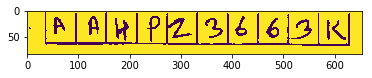

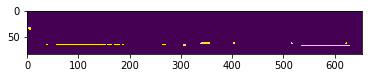

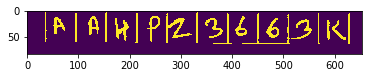

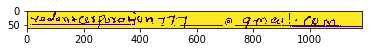

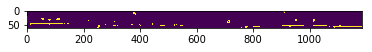

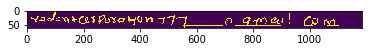

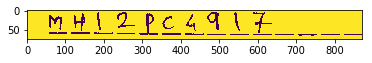

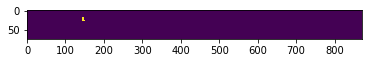

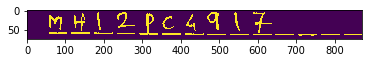

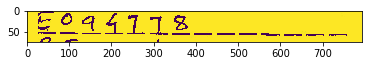

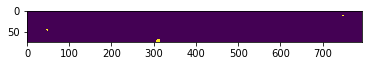

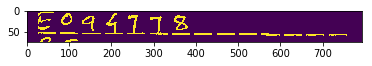

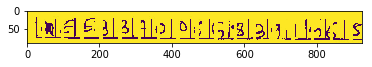

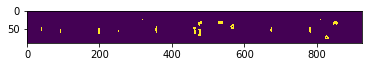

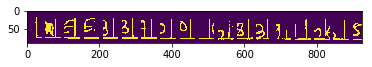

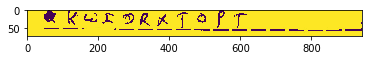

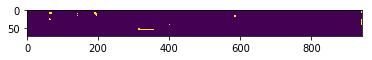

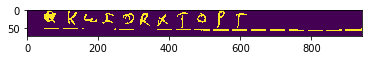

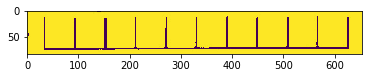

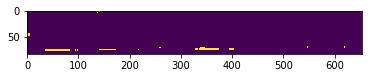

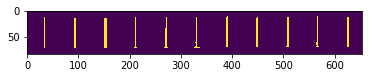

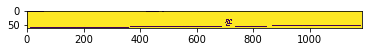

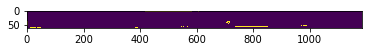

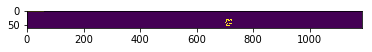

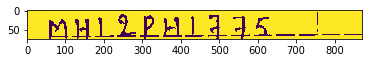

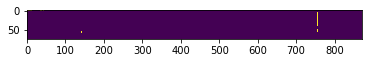

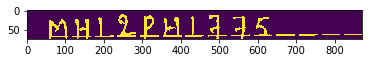

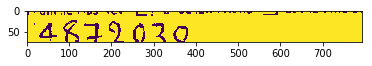

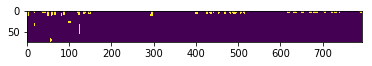

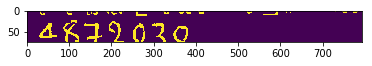

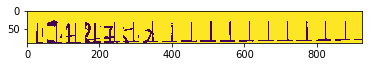

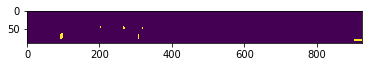

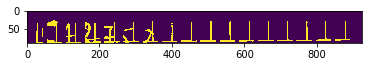

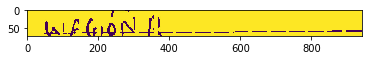

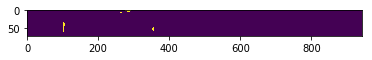

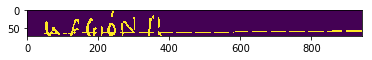

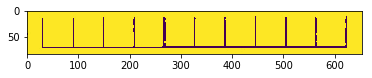

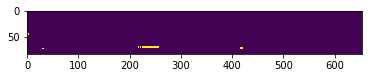

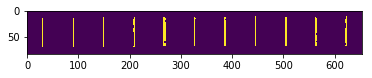

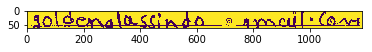

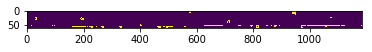

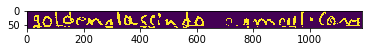

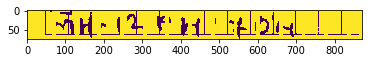

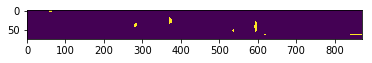

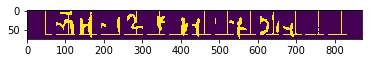

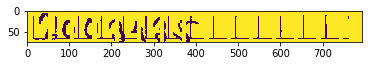

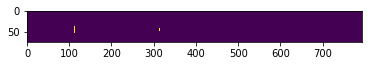

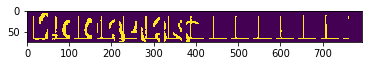

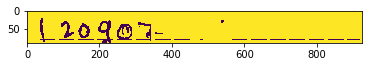

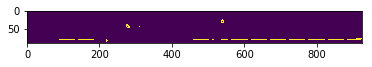

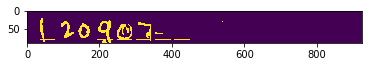

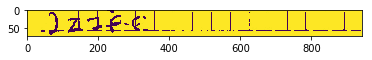

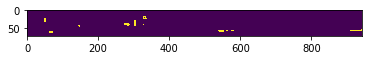

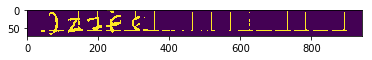

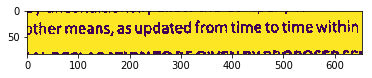

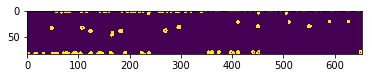

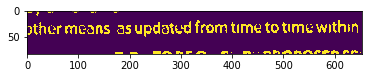

In [655]:
for image_path in glob.glob(os.path.join('/home/Sandeep/','*/*/*/*.jpg')):
    fname=image_path.split('/')[4].split('.')[0]
    #print(fname)
    bname=image_path.split('/')[5].split('.')[0]
    #print(bname)
    if  bname=='Alpha Numeric':
        try:
            print(alphanumeric_extraction(image_path, dico, model_char))
        except:
            pass

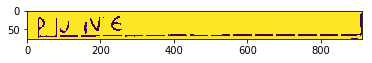

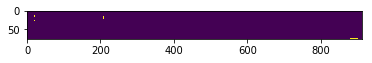

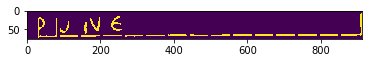

'201462'

In [656]:
numeric_extraction('/home/Sandeep/something1.jpg',dico,model_numm)

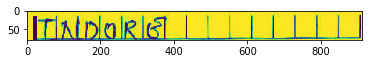

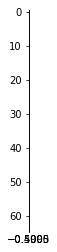

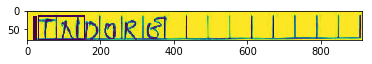

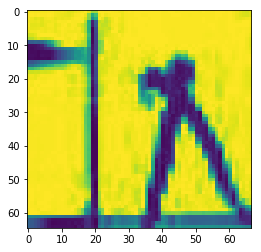

Q


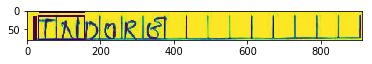

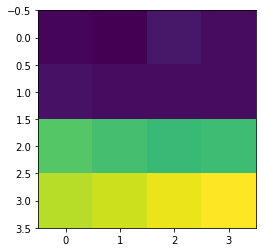

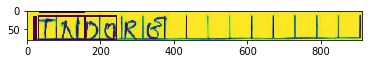

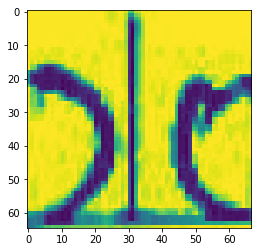

X


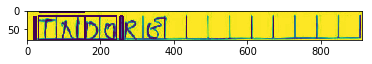

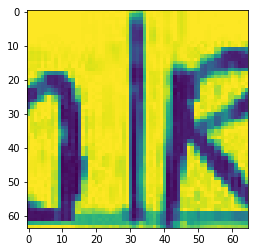

U


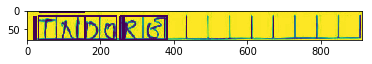

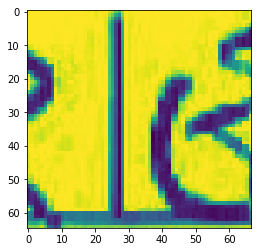

W


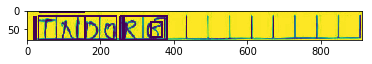

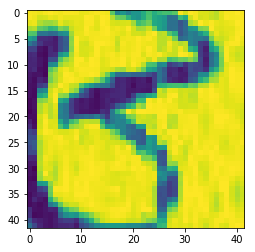

B


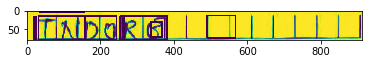

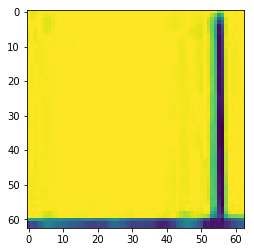

L


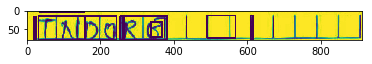

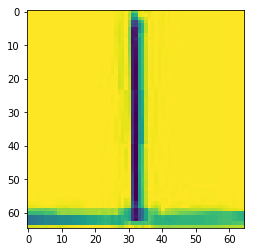

I


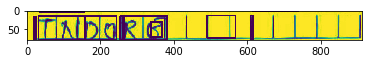

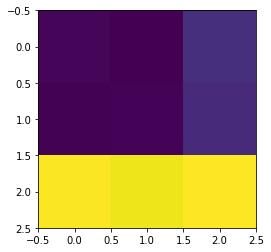

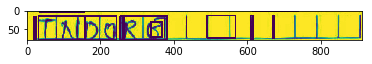

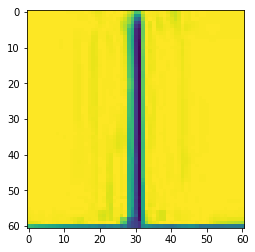

I


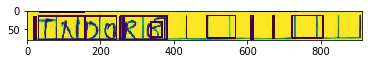

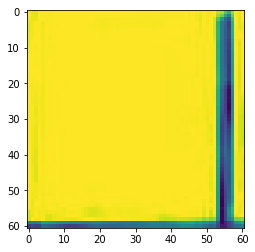

J


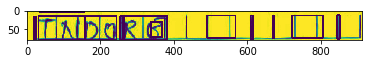

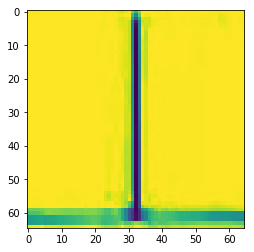

I


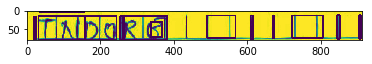

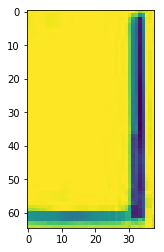

J


'QXUWB LIIJIJ'

In [326]:
character_extraction('/home/Sandeep/something1.jpg', dico, model_char)

In [250]:
with open("/KALpydev/icr_pickle_files/dictionary.p","rb") as f: 
        V, dico = pickle.load(f, encoding='latin1')

In [145]:
 model_numm = load_model("/KALpydev/icr_pickle_files/CNN_Model/Numeric/CNN_Model_v2.h5")

In [156]:
model_char = load_model("/KALpydev/icr_pickle_files/CNN_Model/Character/CNN_Model_v2.h5")

# Something

ORIGINAL


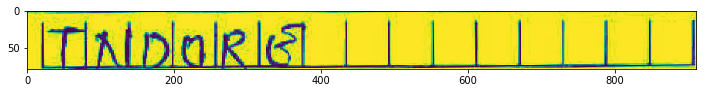

DILATION


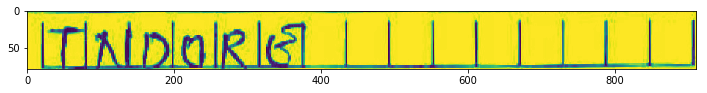

THRESHOLDED


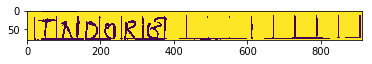

In [318]:
for image_path in glob.glob(os.path.join('/KALpydev/new_Cropped/87395726/Character','City.jpg')):

    
    img = cv2.imread(image_path,0)


    print("ORIGINAL")
    plt.figure(figsize=(12,12));plt.imshow(img);plt.show()
    kernel = np.ones((3,1), np.uint8)
    overlay = cv2.dilate(img, kernel, iterations = 1)
    kernel1 = np.ones((3,1),np.uint8)
    overlay = cv2.erode(overlay,kernel1,iterations = 1)
    print("DILATION")
    plt.figure(figsize=(12,12));plt.imshow(overlay);plt.show()
    overlay = cv2.threshold(overlay,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    print("THRESHOLDED")
    plt.imshow(overlay);plt.show()
    cv2.imwrite("/home/Arjun/files/something.jpg", overlay)

In [ ]:
for image_path in glob.glob(os.path.join('/home/Arjun/files/form/Cropped/Sample/*','*.jpg')):
    print(image_path.split('/')[7].split('.')[0])

In [657]:
fname=image_path.split('/')[8].split('.')[0]
print(fname)
if fname in list(df['FieldName']):
    grid_width=int(df.loc[(df.FieldName == fname) , ['GridWidth']]['GridWidth'])
    grid_height=int(df.loc[(df.FieldName == fname) , ['GridHeight']]['GridHeight'])
    no_gridlines=int(df.loc[(df.FieldName == fname) , ['Noofgridlines']]['Noofgridlines'])
    for i in range(overlay.shape[0]):
        for j in range(overlay.shape[1]):
            cnt=0
            if (overlay[i][j]==0):
                if((overlay.shape[1]-j)>(0.95*overlay.shape[1])):
                    fst_blck_pxl=(i,j)
                    print(fst_blck_pxl)
                    cnt=1
                    break
        if(cnt==1):
            break

IndexError: list index out of range